In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the ATO data set 
income = pd.read_csv("Data Files/IncomeandRent2016Analysis.csv")

In [3]:
#reading Demographics data set
Genderdemo = pd.read_csv("Data Files/Genderdemo.csv")
Agedemo = pd.read_csv("Data Files/AGEdemo.csv")
Religiondemo = pd.read_csv("Data Files/Religiondemo.csv")
Maritaldemo = pd.read_csv("Data Files/Maritaldemo.csv")
Income = pd.read_csv("Data Files/Incomecensus.csv")
Rent = pd.read_csv("Data Files/Rentcensus.csv")


In [4]:
#reading the Post Code's Remoteness Status 
premote = pd.read_csv("Data Files/postcoderemoteness.csv")

# Demographics Analysis

## Data Preparation 

In [5]:
Rent = Rent.rename(columns={"Not stated":"Not Stated Rent"})
Rent = Rent.rename(columns={"Not applicable":"Not Applicable Rent"})

In [6]:
Income = Income.rename(columns={"Not stated":"Not Stated Income"})
Income = Income.rename(columns={"Not applicable":"Not Applicable Income"})

In [7]:
demo_df = pd.merge(Genderdemo, Agedemo, on='Postcode')

In [8]:
demo_df = pd.merge(demo_df, Religiondemo, on='Postcode')

In [9]:
demo_df = pd.merge(demo_df, Maritaldemo, on='Postcode')

In [10]:
demo_df = pd.merge(demo_df, Income, on='Postcode')

In [11]:
demo_df = pd.merge(demo_df, Rent, on='Postcode')

In [12]:
demo_df = demo_df[demo_df.Population != 0]

In [13]:
demo_df.columns

Index(['Postcode', 'Male', 'Female', 'Population', '0-9 years', '10-19 years',
       '20-29 years', '30-39 years', '40-49 years', '50-59 years',
       '60-69 years', '70-79 years', '80-89 years', '90-99 years',
       '100 years and over', 'Buddhism', 'Christianity', 'Hinduism', 'Islam',
       'Judaism', 'Other Religions',
       'Secular Beliefs and Other Spiritual Beliefs and No Religious Affiliation',
       'Inadequately described', 'Not stated', 'Total', 'Never married',
       'Widowed', 'Divorced', 'Separated', 'Married', 'Not applicable',
       'Negative income', 'Nil income', '$1-$149 ($1-$7,799)',
       '$150-$299 ($7,800-$15,599)', '$300-$399 ($15,600-$20,799)',
       '$400-$499 ($20,800-$25,999)', '$500-$649 ($26,000-$33,799)',
       '$650-$799 ($33,800-$41,599)', '$800-$999 ($41,600-$51,999)',
       '$1,000-$1,249 ($52,000-$64,999)', '$1,250-$1,499 ($65,000-$77,999)',
       '$1,500-$1,749 ($78,000-$90,999)', '$1,750-$1,999 ($91,000-$103,999)',
       '$2,000-$2,99

In [14]:
demo_df = pd.DataFrame (demo_df, columns =['Postcode', 'Male', 'Female', '0-9 years', '10-19 years',
       '20-29 years', '30-39 years', '40-49 years', '50-59 years',
       '60-69 years', '70-79 years', '80-89 years', '90-99 years',
       '100 years and over', 'Buddhism', 'Christianity', 'Hinduism', 'Islam',
       'Judaism', 'Other Religions',
       'Secular Beliefs and Other Spiritual Beliefs and No Religious Affiliation',
       'Inadequately described', 'Not stated', 'Never married', 'Widowed',
       'Divorced', 'Separated', 'Married', 'Not applicable', 'Negative income',
       'Nil income', '$1-$149 ($1-$7,799)', '$150-$299 ($7,800-$15,599)',
       '$300-$399 ($15,600-$20,799)', '$400-$499 ($20,800-$25,999)',
       '$500-$649 ($26,000-$33,799)', '$650-$799 ($33,800-$41,599)',
       '$800-$999 ($41,600-$51,999)', '$1,000-$1,249 ($52,000-$64,999)',
       '$1,250-$1,499 ($65,000-$77,999)', '$1,500-$1,749 ($78,000-$90,999)',
       '$1,750-$1,999 ($91,000-$103,999)', '$2,000-$2,999 ($104,000-$155,999)',
       '$3,000 or more ($156,000 or more)', 'Not Stated Income',
       'Not Applicable Income', 'Nil payments', '$1-$74', '$75-$99',
       '$100-$124', '$125-$149', '$150-$174', '$175-$199', '$200-$224',
       '$225-$249', '$250-$274', '$275-$299', '$300-$324', '$325-$349',
       '$350-$374', '$375-$399', '$400-$424', '$425-$449', '$450-$549',
       '$550-$649', '$650-$749', '$750-$849', '$850-$949', '$950 and over',
       'Not Stated Rent', 'Not Applicable Rent', 'Population'] )

In [15]:
demo_df.head()

Postcode   Male  Female  0-9 years  10-19 years  20-29 years  30-39 years  \
0       800   3629    2835        424          230         1939         1691   
1       810  16776   16530       4840         3746         5181         6091   
2       812   9442    9429       2753         2541         2504         2911   
3       815    191     104          0           29          203           38   
4       820  10205    9249       2104         1803         3723         3812   

   40-49 years  50-59 years  60-69 years  ...  $425-$449  $450-$549  \
0          819          752          457  ...       32.0      317.0   
1         4882         3798         2861  ...      114.0      825.0   
2         2696         2664         1862  ...       42.0      525.0   
3           10            4            7  ...        0.0        0.0   
4         2845         2442         1718  ...       92.0      737.0   

   $550-$649  $650-$749  $750-$849  $850-$949  $950 and over  Not Stated Rent  \
0      320.0      162.0       93.0       73.0           93.0            162.0   
1      434.0      272.0      121.0       48.0           48.0            168.0   
2      275.0       94.0       12.0       11.0           15.0             88.0   
3        0.0        0.0        0.0        0.0            0.0              0.0   
4      490.0      341.0      192.0       83.0          148.0            265.0   

   Not Applicable Rent  Population  
0               1818.0        6467  
1               8327.0       33302  
2               5120.0       18875  
3                  0.0         286  
4               5336.0       19449  

[5 rows x 72 columns]

In [16]:
demo_df.to_csv('demo3.csv')

#### Postcode Remoteness Data Set

In [17]:
premote.head()

POSTCODES  Major Cities of Australia   Inner Regional Australia   \
0       4000                        8674                          0   
1       4005                        9924                          0   
2       4006                        8815                          0   
3       4007                        6881                          0   
4       4008                         133                          0   

   Outer Regional Australia   Remote Australia   Very Remote Australia   \
0                          0                  0                       0   
1                          0                  0                       0   
2                          0                  0                       0   
3                          0                  0                       0   
4                          0                  0                       0   

   Migratory - Offshore - Shipping   Total  
0                                 0   8674  
1                                 0   9924  
2                                 0   8815  
3                                 0   6881  
4                                 0    133

We can see that the data set contains postcodes and the respective population in the major city or regional area. Any value greate than 0 signifies the status of that postcode. For instance, postcode 4000 is a Major City of Australia, and a post code with a non zero value for Inner Regional Australia would be an Inner Regional Postcode. 

We will now write a code to create a column consisting the remote status of that postcode. Any value greater than 0 for Major cities of Australia will count as the postcode being major city; any value of 0 will count as postcode being regional. In the following code a value of 1 in the new column "Remote" signifies major city and value of 0 marks "Regional".

In [18]:
conditions = [
    (premote['Major Cities of Australia '] > 0),
    (premote['Major Cities of Australia '] == 0)
    ]

# create a list of the values we want to assign for each condition
values = ['1', '0'] #1 is a major city, 0 is a remote city

# create a new column and use np.select to assign values to it using our lists as arguments
premote['Remote'] = np.select(conditions, values)

In [19]:
premote.head()

POSTCODES  Major Cities of Australia   Inner Regional Australia   \
0       4000                        8674                          0   
1       4005                        9924                          0   
2       4006                        8815                          0   
3       4007                        6881                          0   
4       4008                         133                          0   

   Outer Regional Australia   Remote Australia   Very Remote Australia   \
0                          0                  0                       0   
1                          0                  0                       0   
2                          0                  0                       0   
3                          0                  0                       0   
4                          0                  0                       0   

   Migratory - Offshore - Shipping   Total Remote  
0                                 0   8674      1  
1                                 0   9924      1  
2                                 0   8815      1  
3                                 0   6881      1  
4                                 0    133      1

Since we only need the post code and remote status of the postcodes, we will create a new data frame with just the Postcode and Remote column. We will also rename POSTCODES to Postcode in the new Data Frame for consistency so that we can merge it with other data sets later on. 

In [20]:
premote_df = pd.DataFrame(premote, columns = ['POSTCODES', 'Remote'])

In [21]:
premote_df = premote_df.rename(columns={"POSTCODES":"Postcode"})

In [22]:
demo_df = pd.merge(demo_df, premote_df, on='Postcode')

In [23]:
demo_df.head()

Postcode   Male  Female  0-9 years  10-19 years  20-29 years  30-39 years  \
0       800   3629    2835        424          230         1939         1691   
1       810  16776   16530       4840         3746         5181         6091   
2       812   9442    9429       2753         2541         2504         2911   
3       815    191     104          0           29          203           38   
4       820  10205    9249       2104         1803         3723         3812   

   40-49 years  50-59 years  60-69 years  ...  $450-$549  $550-$649  \
0          819          752          457  ...      317.0      320.0   
1         4882         3798         2861  ...      825.0      434.0   
2         2696         2664         1862  ...      525.0      275.0   
3           10            4            7  ...        0.0        0.0   
4         2845         2442         1718  ...      737.0      490.0   

   $650-$749  $750-$849  $850-$949  $950 and over  Not Stated Rent  \
0      162.0       93.0       73.0           93.0            162.0   
1      272.0      121.0       48.0           48.0            168.0   
2       94.0       12.0       11.0           15.0             88.0   
3        0.0        0.0        0.0            0.0              0.0   
4      341.0      192.0       83.0          148.0            265.0   

   Not Applicable Rent  Population  Remote  
0               1818.0        6467       0  
1               8327.0       33302       0  
2               5120.0       18875       0  
3                  0.0         286       0  
4               5336.0       19449       0  

[5 rows x 73 columns]

## Univariate Analysis

We will now inspect demographics dataset to better understand the data set and see if the number of variable can or should be reduced.

In [24]:
demo_df.head()

Postcode   Male  Female  0-9 years  10-19 years  20-29 years  30-39 years  \
0       800   3629    2835        424          230         1939         1691   
1       810  16776   16530       4840         3746         5181         6091   
2       812   9442    9429       2753         2541         2504         2911   
3       815    191     104          0           29          203           38   
4       820  10205    9249       2104         1803         3723         3812   

   40-49 years  50-59 years  60-69 years  ...  $450-$549  $550-$649  \
0          819          752          457  ...      317.0      320.0   
1         4882         3798         2861  ...      825.0      434.0   
2         2696         2664         1862  ...      525.0      275.0   
3           10            4            7  ...        0.0        0.0   
4         2845         2442         1718  ...      737.0      490.0   

   $650-$749  $750-$849  $850-$949  $950 and over  Not Stated Rent  \
0      162.0       93.0       73.0           93.0            162.0   
1      272.0      121.0       48.0           48.0            168.0   
2       94.0       12.0       11.0           15.0             88.0   
3        0.0        0.0        0.0            0.0              0.0   
4      341.0      192.0       83.0          148.0            265.0   

   Not Applicable Rent  Population  Remote  
0               1818.0        6467       0  
1               8327.0       33302       0  
2               5120.0       18875       0  
3                  0.0         286       0  
4               5336.0       19449       0  

[5 rows x 73 columns]

We can see that there are too many variables and we can not really gather much just by looking at the table above. Therefore we will check the name of columns. 

We can see that we mainly have the age, gender, religion, marital status, income and rent subvariables. To analyse these varaibles, we will first have to convert the count data into proportion. However, before we do that, we will see if the data can be simplified by merging data sets. 

#### Age

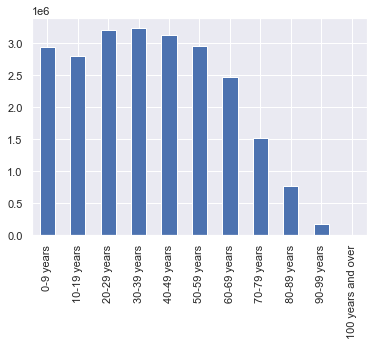

In [25]:
demo_df[['0-9 years','10-19 years', '20-29 years', '30-39 years', '40-49 years', '50-59 years', '60-69 years', '70-79 years', '80-89 years', '90-99 years', '100 years and over']].sum().plot.bar()
plt.show()

In [26]:
demo_df['Kids and Young Adults']= demo_df['0-9 years'] + demo_df['10-19 years'] + demo_df['20-29 years']
demo_df['Adults']=  + demo_df['30-39 years'] + demo_df['40-49 years'] + demo_df['50-59 years']
demo_df['Seniors']= demo_df['60-69 years'] + demo_df['70-79 years'] + demo_df['80-89 years'] + demo_df['90-99 years'] + demo_df['100 years and over']


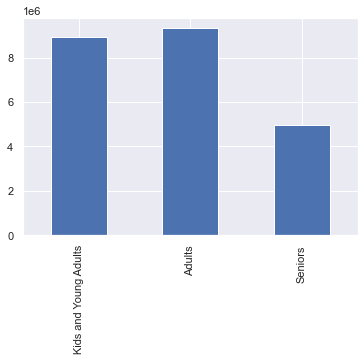

In [27]:
demo_df[['Kids and Young Adults','Adults', 'Seniors']].sum().plot.bar()
plt.show()

We can now see that the variable merge makes sense as we have fewer number of variables for simplicty as well as a more balance number of population 

#### Gender

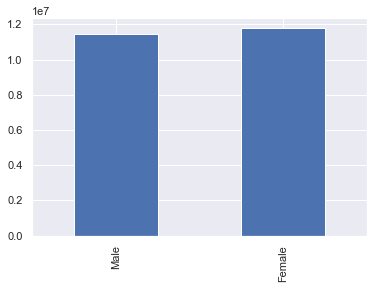

In [28]:
demo_df[['Male', 'Female']].sum().plot.bar()
plt.show()

#### Religion

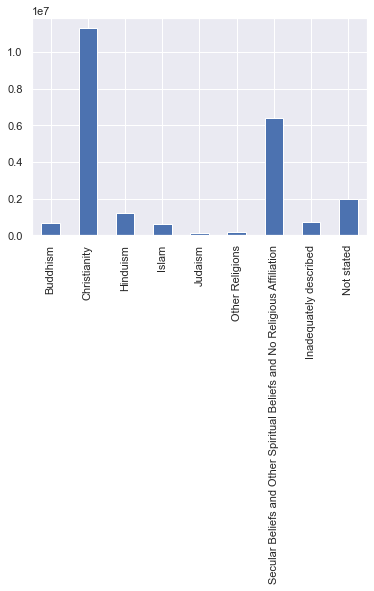

In [29]:
demo_df[['Buddhism', 'Christianity', 'Hinduism', 'Islam', 'Judaism','Other Religions','Secular Beliefs and Other Spiritual Beliefs and No Religious Affiliation','Inadequately described', 'Not stated']].sum().plot.bar()
plt.show()

From the above barplot, we can see that the Australia has more christian followers. We can also see that there is very low population following judaism and hence it can be merged with other religion. We can also merge Inadequately described and not stated as both point to unsurity of population's religious belief. 

Before we begin merging we would rename Secular Beliefs and Other Spiritual Beliefs and No Religious Affiliation to No religious Affiliation for simplicity

In [30]:
#changing column name

demo_df = demo_df.rename(columns={"Secular Beliefs and Other Spiritual Beliefs and No Religious Affiliation":"No Religious Affiliation"})


In [31]:
#Religious Affiliation 
demo_df['Not stated/described'] = demo_df['Inadequately described'] + demo_df['Not stated']

In [32]:
demo_df['Other Religions'] = demo_df['Other Religions'] + demo_df['Judaism']

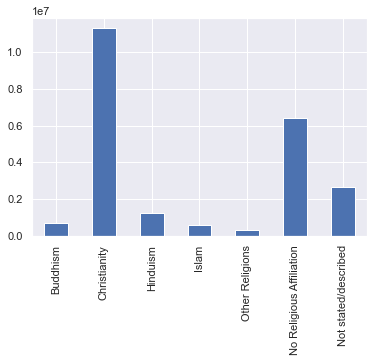

In [33]:
demo_df[['Buddhism', 'Christianity', 'Hinduism', 'Islam','Other Religions','No Religious Affiliation','Not stated/described']].sum().plot.bar()
plt.show()

#### Marital Status

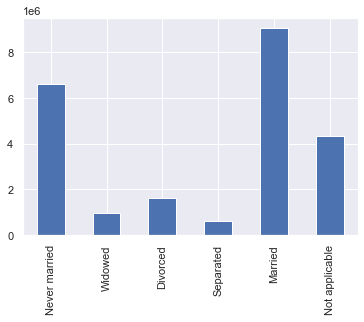

In [34]:
demo_df[['Never married', 'Widowed','Divorced', 'Separated', 'Married', 'Not applicable']].sum().plot.bar()
plt.show()

We can see that most ofd the population is married. We can merge the 3 variables with low population count i.e. Widowed, Divorced, separated with Never married and name the new variable unmarried for simplicity.

In [35]:

#Marital Status
demo_df['Unmarried']= demo_df['Never married'] + demo_df['Widowed'] + demo_df['Divorced'] + demo_df['Separated']


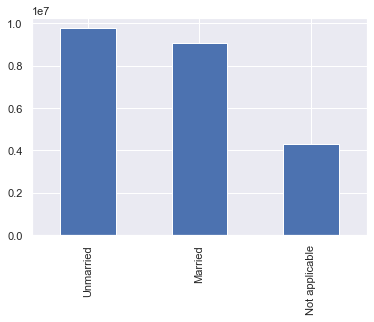

In [36]:
demo_df[['Unmarried', 'Married', 'Not applicable']].sum().plot.bar()
plt.show()

#### Income 

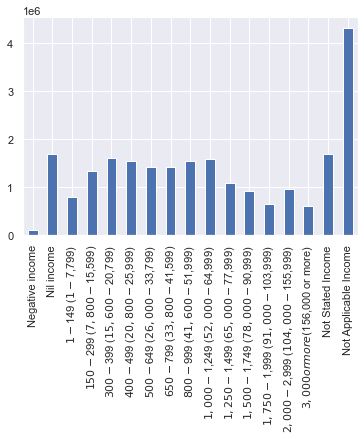

In [37]:
demo_df[['Negative income',
       'Nil income', '$1-$149 ($1-$7,799)', '$150-$299 ($7,800-$15,599)',
       '$300-$399 ($15,600-$20,799)', '$400-$499 ($20,800-$25,999)',
       '$500-$649 ($26,000-$33,799)', '$650-$799 ($33,800-$41,599)',
       '$800-$999 ($41,600-$51,999)', '$1,000-$1,249 ($52,000-$64,999)',
       '$1,250-$1,499 ($65,000-$77,999)', '$1,500-$1,749 ($78,000-$90,999)',
       '$1,750-$1,999 ($91,000-$103,999)', '$2,000-$2,999 ($104,000-$155,999)',
       '$3,000 or more ($156,000 or more)', 'Not Stated Income',
       'Not Applicable Income']].sum().plot.bar()
plt.show()

We can see that the Not Applicable Income has the highest population count and hence could significantly impact our data. This can ultimately impact our analysis. Hence we will merge income into few brackets to balance the count.

In [38]:
demo_df['Not Stated/Nil Income']= demo_df['Nil income'] + demo_df['Not Stated Income'] 
demo_df['Not Applicable Income']= demo_df['Not Applicable Income'] 
demo_df['Low Income']= demo_df['$1-$149 ($1-$7,799)'] + demo_df ['$150-$299 ($7,800-$15,599)'] + demo_df['$300-$399 ($15,600-$20,799)'] + demo_df ['$400-$499 ($20,800-$25,999)'] + demo_df['$500-$649 ($26,000-$33,799)']
demo_df['Mid Income']= demo_df[ '$650-$799 ($33,800-$41,599)'] + demo_df['$800-$999 ($41,600-$51,999)'] + demo_df['$1,000-$1,249 ($52,000-$64,999)'] + demo_df ['$1,250-$1,499 ($65,000-$77,999)']+ demo_df['$1,500-$1,749 ($78,000-$90,999)']
demo_df['High Income']= demo_df['$1,750-$1,999 ($91,000-$103,999)'] + demo_df['$2,000-$2,999 ($104,000-$155,999)'] + demo_df['$3,000 or more ($156,000 or more)'] 

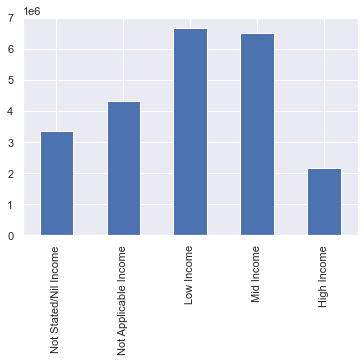

In [39]:
demo_df[['Not Stated/Nil Income', 'Not Applicable Income', 'Low Income', 'Mid Income',
       'High Income']].sum().plot.bar()
plt.show()

#### Rent Payments

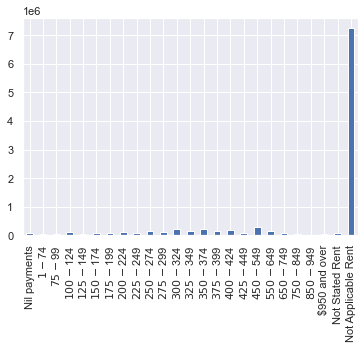

In [40]:
demo_df[['Nil payments', '$1-$74', '$75-$99',
       '$100-$124', '$125-$149', '$150-$174', '$175-$199', '$200-$224',
       '$225-$249', '$250-$274', '$275-$299', '$300-$324', '$325-$349',
       '$350-$374', '$375-$399', '$400-$424', '$425-$449', '$450-$549',
       '$550-$649', '$650-$749', '$750-$849', '$850-$949', '$950 and over',
       'Not Stated Rent', 'Not Applicable Rent']].sum().plot.bar()
plt.show()

We can see that the Not Applicable Rent has the highest population count and hence could significantly impact our data. This can ultimately impact our analysis. Hence we will merge income into few brackets to balance the count.

In [41]:
demo_df['Not Stated/Nil Payments']= demo_df['Nil payments'] + demo_df['Not Stated Rent'] 
demo_df['Not Applicable Rent']= demo_df['Not Applicable Rent'] 
demo_df['Low Rent']= demo_df['$1-$74'] + demo_df ['$75-$99'] + demo_df['$100-$124'] + demo_df ['$125-$149'] + demo_df['$150-$174'] + demo_df['$175-$199']
demo_df['Mid Rent']= demo_df[ '$200-$224'] + demo_df['$225-$249'] + demo_df['$250-$274'] + demo_df ['$275-$299']+ demo_df['$300-$324'] + demo_df['$325-$349']
demo_df['High Rent']= demo_df['$350-$374'] + demo_df['$375-$399'] + demo_df['$400-$424'] + demo_df[ '$425-$449'] + demo_df['$450-$549'] + demo_df['$550-$649']
demo_df['Very High Rent'] =  demo_df['$650-$749'] + demo_df['$750-$849'] + demo_df['$850-$949'] + demo_df[ '$950 and over']

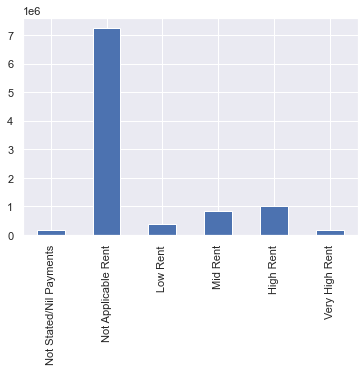

In [42]:
demo_df[['Not Stated/Nil Payments', 'Not Applicable Rent',
       'Low Rent', 'Mid Rent', 'High Rent', 'Very High Rent']].sum().plot.bar()
plt.show()

We can see that the Not Applicable Rent Count is still high, however, we cannot justify dropping or merging this variable and hence we will proceed to next step of analysis

In [43]:
demo_df.columns

Index(['Postcode', 'Male', 'Female', '0-9 years', '10-19 years', '20-29 years',
       '30-39 years', '40-49 years', '50-59 years', '60-69 years',
       '70-79 years', '80-89 years', '90-99 years', '100 years and over',
       'Buddhism', 'Christianity', 'Hinduism', 'Islam', 'Judaism',
       'Other Religions', 'No Religious Affiliation', 'Inadequately described',
       'Not stated', 'Never married', 'Widowed', 'Divorced', 'Separated',
       'Married', 'Not applicable', 'Negative income', 'Nil income',
       '$1-$149 ($1-$7,799)', '$150-$299 ($7,800-$15,599)',
       '$300-$399 ($15,600-$20,799)', '$400-$499 ($20,800-$25,999)',
       '$500-$649 ($26,000-$33,799)', '$650-$799 ($33,800-$41,599)',
       '$800-$999 ($41,600-$51,999)', '$1,000-$1,249 ($52,000-$64,999)',
       '$1,250-$1,499 ($65,000-$77,999)', '$1,500-$1,749 ($78,000-$90,999)',
       '$1,750-$1,999 ($91,000-$103,999)', '$2,000-$2,999 ($104,000-$155,999)',
       '$3,000 or more ($156,000 or more)', 'Not Stated Incom

In [44]:
# Reordering the columns

demo_df = demo_df [['Postcode','Kids and Young Adults',
       'Adults', 'Seniors', 'Male', 'Female', 'Buddhism', 'Christianity', 'Hinduism',
       'Islam', 'Other Religions', 'No Religious Affiliation','Unmarried', 'Married',
       'Not applicable',  'Not stated/described', 
       'Not Stated/Nil Income', 'Not Applicable Income', 'Low Income',
       'Mid Income', 'High Income', 'Not Stated/Nil Payments',
       'Not Applicable Rent', 'Low Rent', 'Mid Rent', 'High Rent',
       'Very High Rent','Population', 'Remote']]

In [45]:
demo_df.head()

Postcode  Kids and Young Adults  Adults  Seniors   Male  Female  Buddhism  \
0       800                   2593    3262      620   3629    2835       274   
1       810                  13767   14771     4770  16776   16530      1142   
2       812                   7798    8271     2800   9442    9429       692   
3       815                    232      52        7    191     104        10   
4       820                   7630    9099     2719  10205    9249       519   

   Christianity  Hinduism  Islam  ...  Mid Income  High Income  \
0          2226       295     94  ...        2307         1414   
1         15094      1386    839  ...       10449         4703   
2          9404       247    318  ...        6052         2371   
3            48        30     20  ...          15            9   
4          8636       426    260  ...        6423         4087   

   Not Stated/Nil Payments  Not Applicable Rent  Low Rent  Mid Rent  \
0                    240.0               1818.0      45.0     264.0   
1                    268.0               8327.0     594.0    1272.0   
2                    130.0               5120.0     402.0     248.0   
3                      0.0                  0.0       0.0       0.0   
4                    424.0               5336.0     328.0     591.0   

   High Rent  Very High Rent  Population  Remote  
0      871.0           421.0        6467       0  
1     2308.0           489.0       33302       0  
2     1192.0           132.0       18875       0  
3        0.0             0.0         286       0  
4     1936.0           764.0       19449       0  

[5 rows x 29 columns]

In [46]:
demo_df.columns

Index(['Postcode', 'Kids and Young Adults', 'Adults', 'Seniors', 'Male',
       'Female', 'Buddhism', 'Christianity', 'Hinduism', 'Islam',
       'Other Religions', 'No Religious Affiliation', 'Unmarried', 'Married',
       'Not applicable', 'Not stated/described', 'Not Stated/Nil Income',
       'Not Applicable Income', 'Low Income', 'Mid Income', 'High Income',
       'Not Stated/Nil Payments', 'Not Applicable Rent', 'Low Rent',
       'Mid Rent', 'High Rent', 'Very High Rent', 'Population', 'Remote'],
      dtype='object')

In [47]:
demo_df['Kids&YAdults/1K'] = (demo_df['Kids and Young Adults']/demo_df['Population'])*1000
demo_df['Adults/1K'] = (demo_df['Adults']/demo_df['Population'])*1000
demo_df['Seniors/1K'] = (demo_df['Seniors']/demo_df['Population'])*1000
demo_df['Males/1K'] = (demo_df['Male']/demo_df['Population'])*1000
demo_df['Female/1K'] = (demo_df['Female']/demo_df['Population'])*1000
demo_df['Buddhism/1K'] = (demo_df['Buddhism']/demo_df['Population'])*1000
demo_df['Christianity/1K'] = (demo_df['Christianity']/demo_df['Population'])*1000
demo_df['Hinduism/1K'] = (demo_df['Hinduism']/demo_df['Population'])*1000
demo_df['Islam/1K'] = (demo_df['Islam']/demo_df['Population'])*1000
demo_df['OtherReligions/1K'] = (demo_df['Other Religions']/demo_df['Population'])*1000
demo_df['NoReligiousAffil/1K'] = (demo_df['No Religious Affiliation']/demo_df['Population'])*1000
demo_df['NotStated/Described/1K'] = (demo_df['Not stated/described']/demo_df['Population'])*1000
demo_df['Unmarried/1K'] = (demo_df['Unmarried']/demo_df['Population'])*1000
demo_df['Married/1K'] = (demo_df['Married']/demo_df['Population'])*1000
demo_df['NotAppMar/1K'] = (demo_df['Not applicable']/demo_df['Population'])*1000
demo_df['NotNilIncome/1K'] = (demo_df['Not Stated/Nil Income']/demo_df['Population'])*1000
demo_df['NotAppIncome/1K'] = (demo_df['Not Applicable Income']/demo_df['Population'])*1000
demo_df['LowIncome/1K'] = (demo_df['Low Income']/demo_df['Population'])*1000
demo_df['MidIncome/1K'] = (demo_df['Mid Income']/demo_df['Population'])*1000
demo_df['HighIncome/1K'] = (demo_df['High Income']/demo_df['Population'])*1000
demo_df['NotNilRent/1K'] = (demo_df['Not Stated/Nil Payments']/demo_df['Population'])*1000
demo_df['NotAppRent/1K'] = (demo_df['Not Applicable Rent']/demo_df['Population'])*1000
demo_df['LowRent/1K'] = (demo_df['Low Rent']/demo_df['Population'])*1000
demo_df['MidRent/1K'] = (demo_df['Mid Rent']/demo_df['Population'])*1000
demo_df['HighRent/1K'] = (demo_df['High Rent']/demo_df['Population'])*1000
demo_df['VeryHighRent/1K'] = (demo_df['Very High Rent']/demo_df['Population'])*1000

In [48]:
demo_df.columns

Index(['Postcode', 'Kids and Young Adults', 'Adults', 'Seniors', 'Male',
       'Female', 'Buddhism', 'Christianity', 'Hinduism', 'Islam',
       'Other Religions', 'No Religious Affiliation', 'Unmarried', 'Married',
       'Not applicable', 'Not stated/described', 'Not Stated/Nil Income',
       'Not Applicable Income', 'Low Income', 'Mid Income', 'High Income',
       'Not Stated/Nil Payments', 'Not Applicable Rent', 'Low Rent',
       'Mid Rent', 'High Rent', 'Very High Rent', 'Population', 'Remote',
       'Kids&YAdults/1K', 'Adults/1K', 'Seniors/1K', 'Males/1K', 'Female/1K',
       'Buddhism/1K', 'Christianity/1K', 'Hinduism/1K', 'Islam/1K',
       'OtherReligions/1K', 'NoReligiousAffil/1K', 'NotStated/Described/1K',
       'Unmarried/1K', 'Married/1K', 'NotAppMar/1K', 'NotNilIncome/1K',
       'NotAppIncome/1K', 'LowIncome/1K', 'MidIncome/1K', 'HighIncome/1K',
       'NotNilRent/1K', 'NotAppRent/1K', 'LowRent/1K', 'MidRent/1K',
       'HighRent/1K', 'VeryHighRent/1K'],
      dtyp

In [49]:
demo_df2 = pd.DataFrame(demo_df, columns = ['Postcode','Kids&YAdults/1K', 'Adults/1K', 'Seniors/1K', 'Males/1K', 'Female/1K',
       'Buddhism/1K', 'Christianity/1K', 'Hinduism/1K', 'Islam/1K',
       'OtherReligions/1K', 'NoReligiousAffil/1K', 'NotStated/Described/1K',
       'Unmarried/1K', 'Married/1K', 'NotAppMar/1K', 'NotNilIncome/1K', 'NotAppIncome/1K',
       'LowIncome/1K', 'MidIncome/1K', 'HighIncome/1K', 'NotNilRent/1K',
       'NotAppRent/1K', 'LowRent/1K', 'MidRent/1K', 'HighRent/1K',
       'VeryHighRent/1K', 'Remote'
       ] )

In [50]:
demo_prop = pd.DataFrame(demo_df, columns = ['Postcode','Kids&YAdults/1K', 'Adults/1K', 'Seniors/1K', 'Males/1K', 'Female/1K',
       'Buddhism/1K', 'Christianity/1K', 'Hinduism/1K', 'Islam/1K',
       'OtherReligions/1K', 'NoReligiousAffil/1K', 'NotStated/Described/1K',
       'Unmarried/1K', 'Married/1K','NotAppMar/1K', 'NotNilIncome/1K', 'NotAppIncome/1K',
       'LowIncome/1K', 'MidIncome/1K', 'HighIncome/1K', 'NotNilRent/1K',
       'NotAppRent/1K', 'LowRent/1K', 'MidRent/1K', 'HighRent/1K',
       'VeryHighRent/1K' ] )

In [51]:
demo_prop.describe()

Postcode  Kids&YAdults/1K    Adults/1K   Seniors/1K     Males/1K  \
count  2641.000000      2641.000000  2641.000000  2641.000000  2641.000000   
mean   4160.130254       353.051935   398.269974   246.848754   510.704949   
std    1523.460924        90.713029    62.803110    95.877389    58.934492   
min     800.000000         0.000000     0.000000     0.000000   288.753799   
25%    2878.000000       307.835821   371.710526   191.089154   487.971517   
50%    3927.000000       353.634048   397.642371   241.134752   498.882473   
75%    5273.000000       388.732394   423.824451   301.707780   517.655898   
max    7470.000000      1000.000000  1000.000000  1100.000000  2000.000000   

         Female/1K  Buddhism/1K  Christianity/1K  Hinduism/1K     Islam/1K  \
count  2641.000000  2641.000000      2641.000000  2641.000000  2641.000000   
mean    490.774266    24.164042       472.363575    74.182164    10.931217   
std      53.525532    37.564813       209.325177   174.387521    33.341680   
min       0.000000     0.000000         0.000000     0.000000     0.000000   
25%     482.961222     3.898635       421.582203     0.000000     0.000000   
50%     501.355014     9.621290       522.824815     2.855455     1.411632   
75%     512.218842    24.613353       603.053435    18.242404     7.249879   
max    1000.000000   437.500000      1083.333333   764.705882   558.936202   

       ...  NotAppIncome/1K  LowIncome/1K  MidIncome/1K  HighIncome/1K  \
count  ...      2641.000000   2641.000000   2641.000000    2641.000000   
mean   ...       177.660995    308.128063    268.824690      79.773797   
std    ...        51.240237     92.468220     65.225403      55.631557   
min    ...         0.000000      0.000000      0.000000       0.000000   
25%    ...       156.318681    255.539910    243.917558      41.897860   
50%    ...       181.087551    308.197855    274.208681      64.690027   
75%    ...       204.717181    363.544474    300.044650     103.438557   
max    ...      1000.000000   1200.000000   1000.000000     384.083045   

       NotNilRent/1K  NotAppRent/1K   LowRent/1K   MidRent/1K  HighRent/1K  \
count    2641.000000    2641.000000  2641.000000  2641.000000  2641.000000   
mean       14.939419     383.611931    23.145694    27.265979    22.941071   
std        20.889430     171.981200    27.482372    23.680686    32.069818   
min         0.000000       0.000000     0.000000     0.000000     0.000000   
25%         5.077983     305.867347     4.886717     8.532423     0.000000   
50%         8.179051     354.028721    15.489657    22.222222     8.611242   
75%        16.686532     427.272727    33.009857    41.325536    36.541558   
max       375.000000    2819.607843   283.505155   191.627907   223.086124   

       VeryHighRent/1K  
count      2641.000000  
mean          4.140343  
std          12.404234  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           1.834664  
max         130.713947  

[8 rows x 27 columns]

#### Gender

<AxesSubplot:xlabel='Female/1K'>

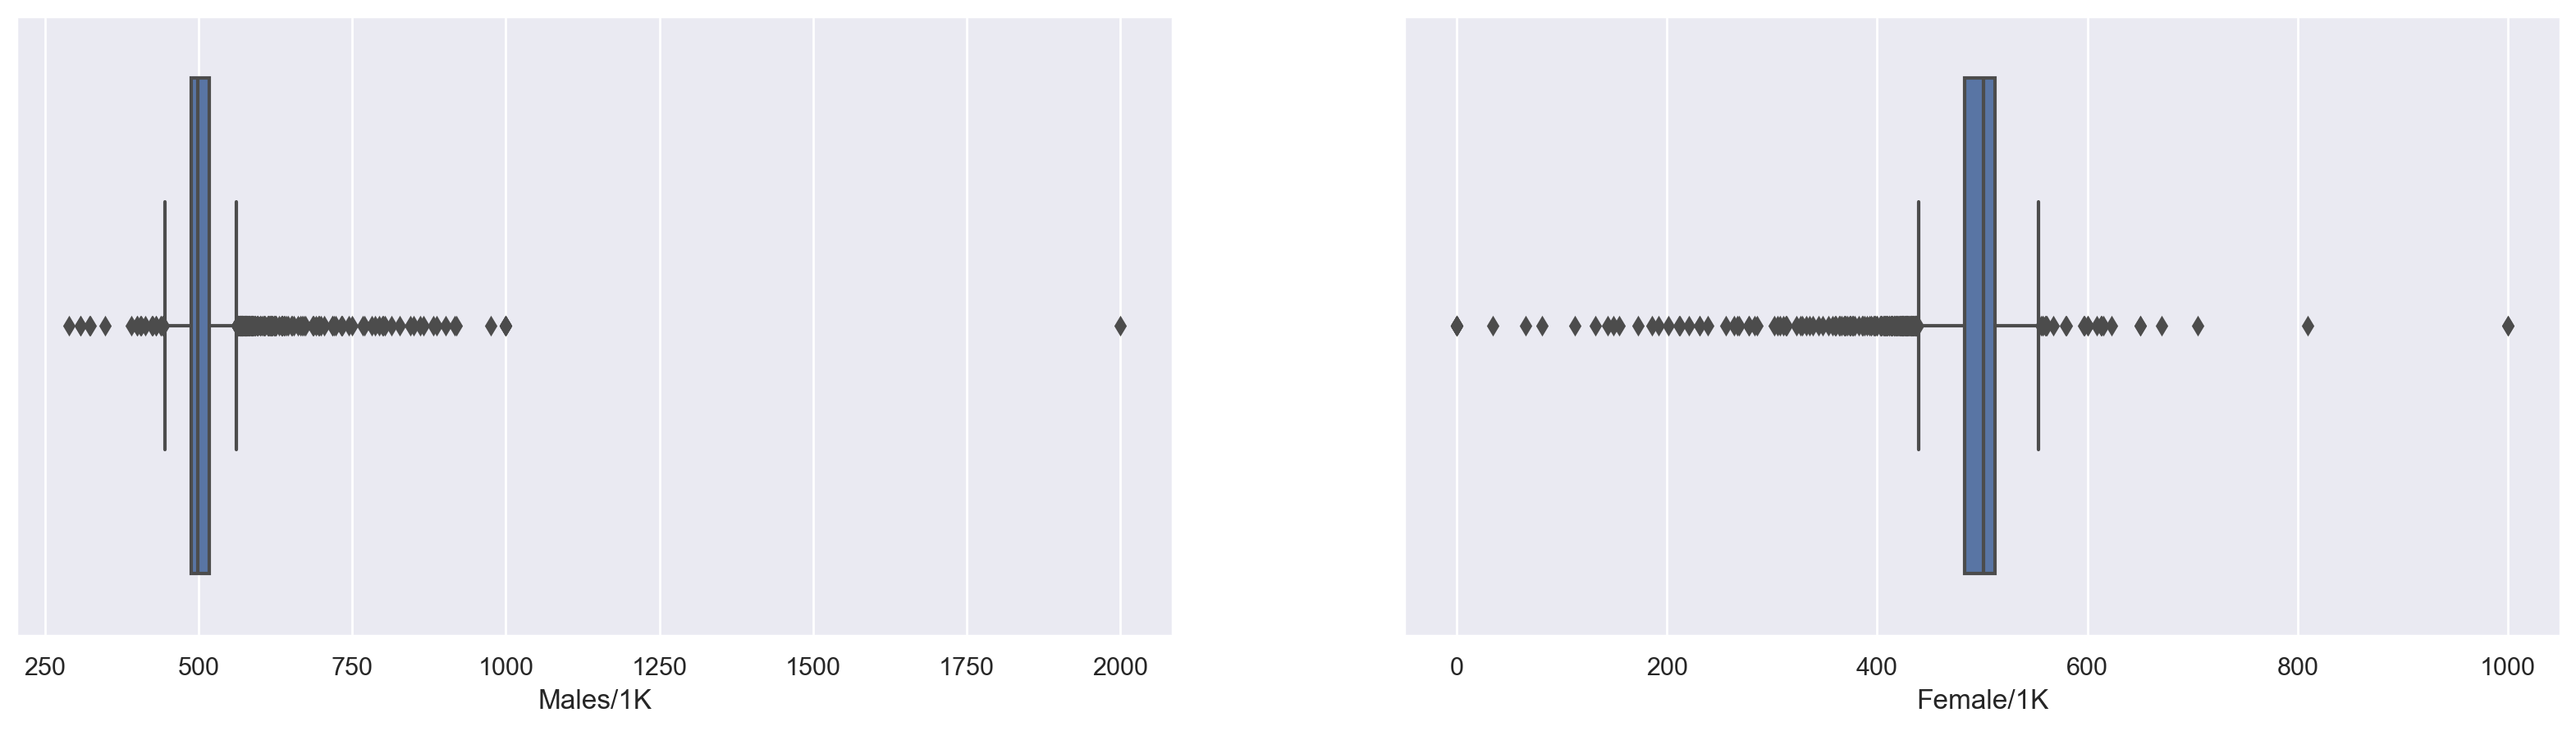

In [52]:
plt.figure(figsize=(20,5), dpi=200)

plt.subplot(1,2,1)
sns.boxplot(x = 'Males/1K', data = demo_prop)

plt.subplot(1,2,2)
sns.boxplot(x = 'Female/1K', data = demo_prop)

<AxesSubplot:xlabel='Female/1K', ylabel='Count'>

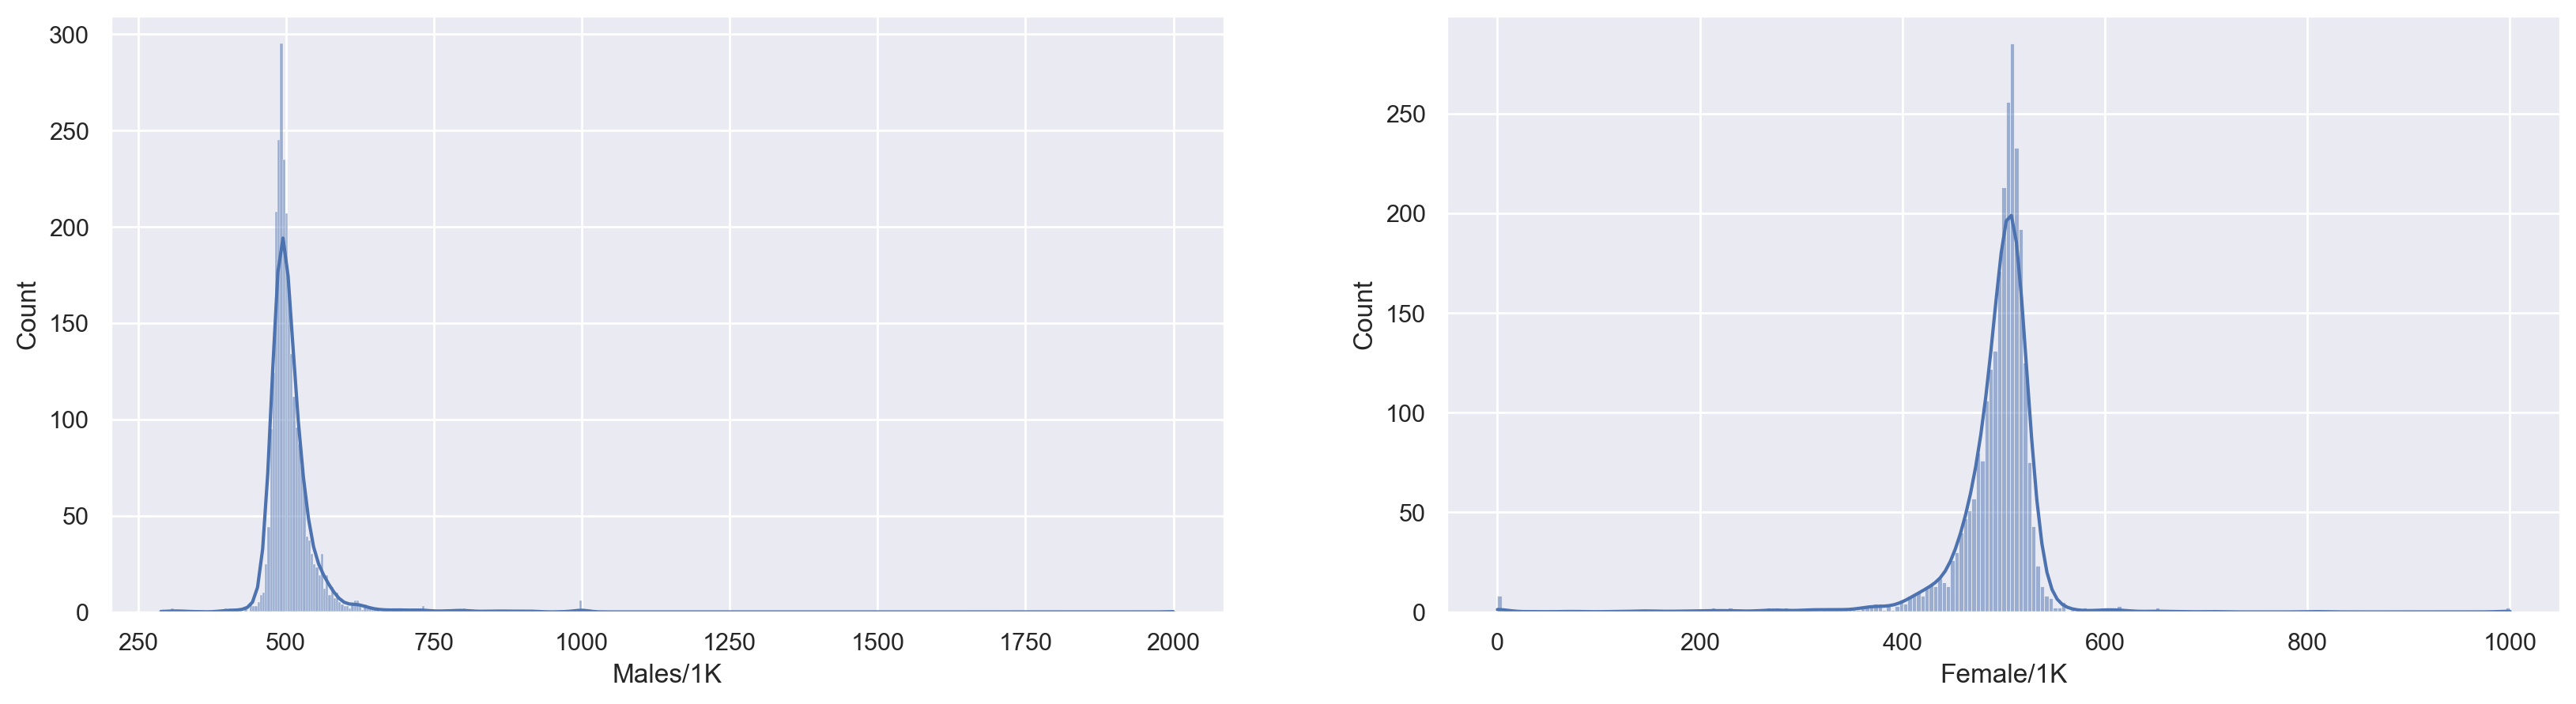

In [53]:
plt.figure(figsize=(20,5), dpi=200)

plt.subplot(1,2,1)
sns.histplot(x = 'Males/1K', data = demo_prop, kde= True)

plt.subplot(1,2,2)
sns.histplot(x = 'Female/1K', data = demo_prop, kde = True)

We will now use histogram to check normality and boxplots to check for outliers.

#### Age

<AxesSubplot:xlabel='Seniors/1K'>

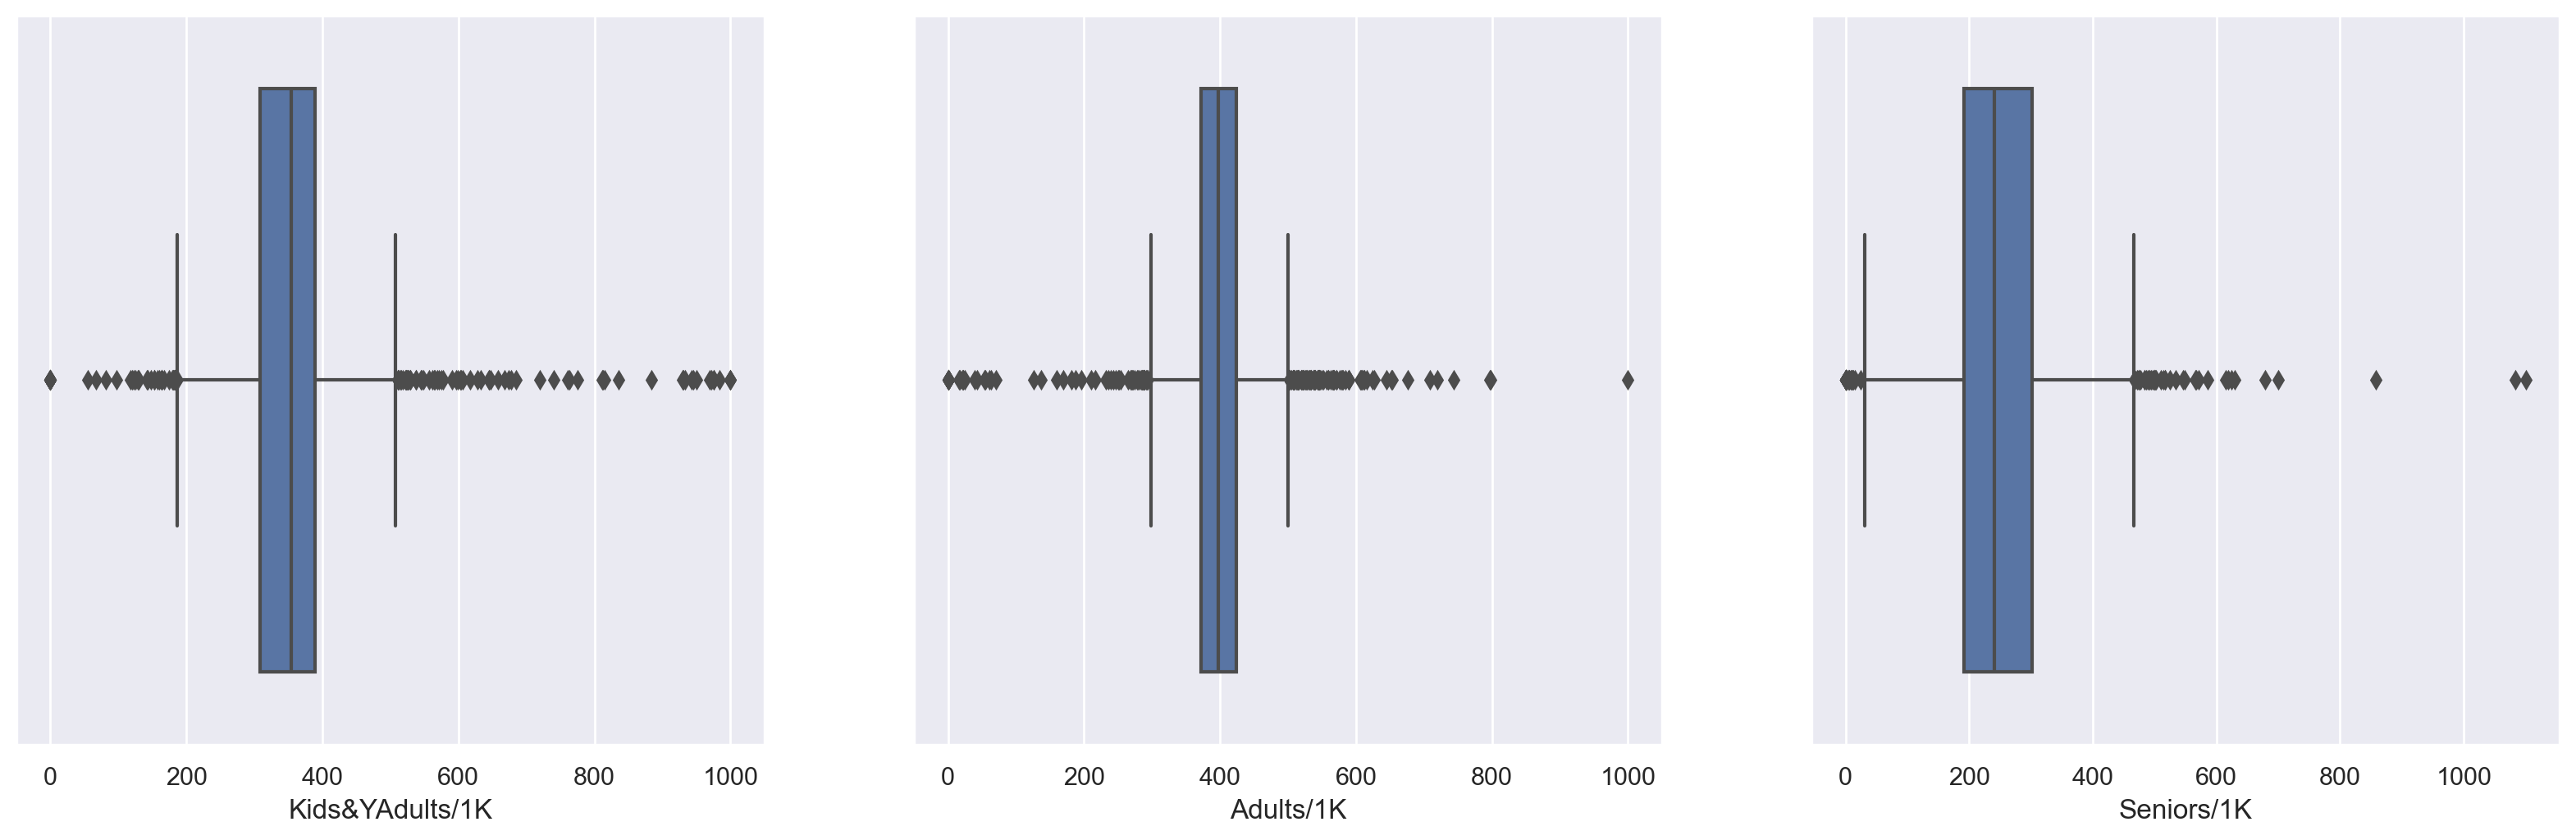

In [54]:
# checking for outliers using box-plots

plt.figure(figsize=(20,20), dpi=200)

plt.subplot(3,3,1)
sns.boxplot(x = 'Kids&YAdults/1K', data = demo_prop)

plt.subplot(3,3,2)
sns.boxplot(x = 'Adults/1K', data = demo_prop)

plt.subplot(3,3,3)
sns.boxplot(x = 'Seniors/1K', data = demo_prop)


<AxesSubplot:xlabel='Seniors/1K', ylabel='Count'>

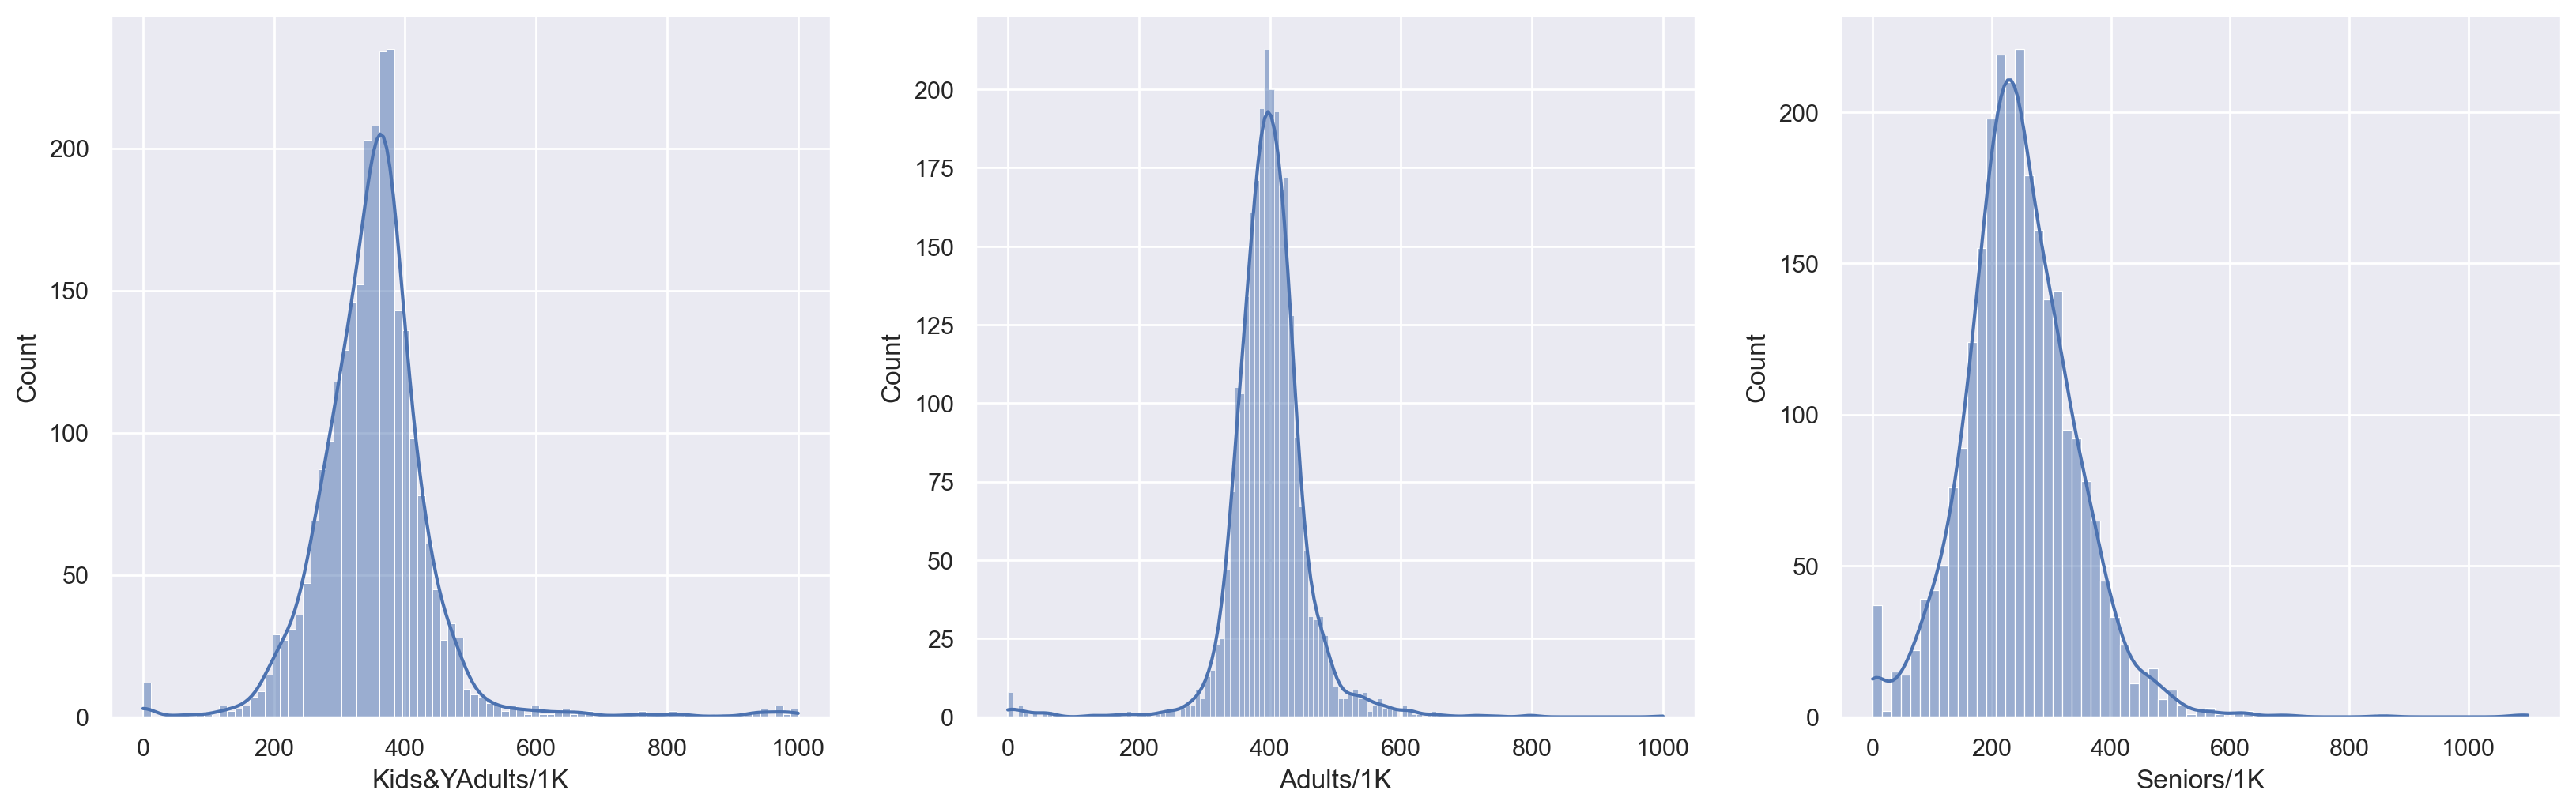

In [55]:
# checking for normality using histograms

plt.figure(figsize=(20,20), dpi=200)

plt.subplot(3,3,1)
sns.histplot(data=demo_prop, x="Kids&YAdults/1K", kde=True)

plt.subplot(3,3,2)
sns.histplot(data=demo_prop, x="Adults/1K", kde=True)

plt.subplot(3,3,3)
sns.histplot(data=demo_prop, x="Seniors/1K", kde=True)



#### Religion

<AxesSubplot:xlabel='NotStated/Described/1K'>

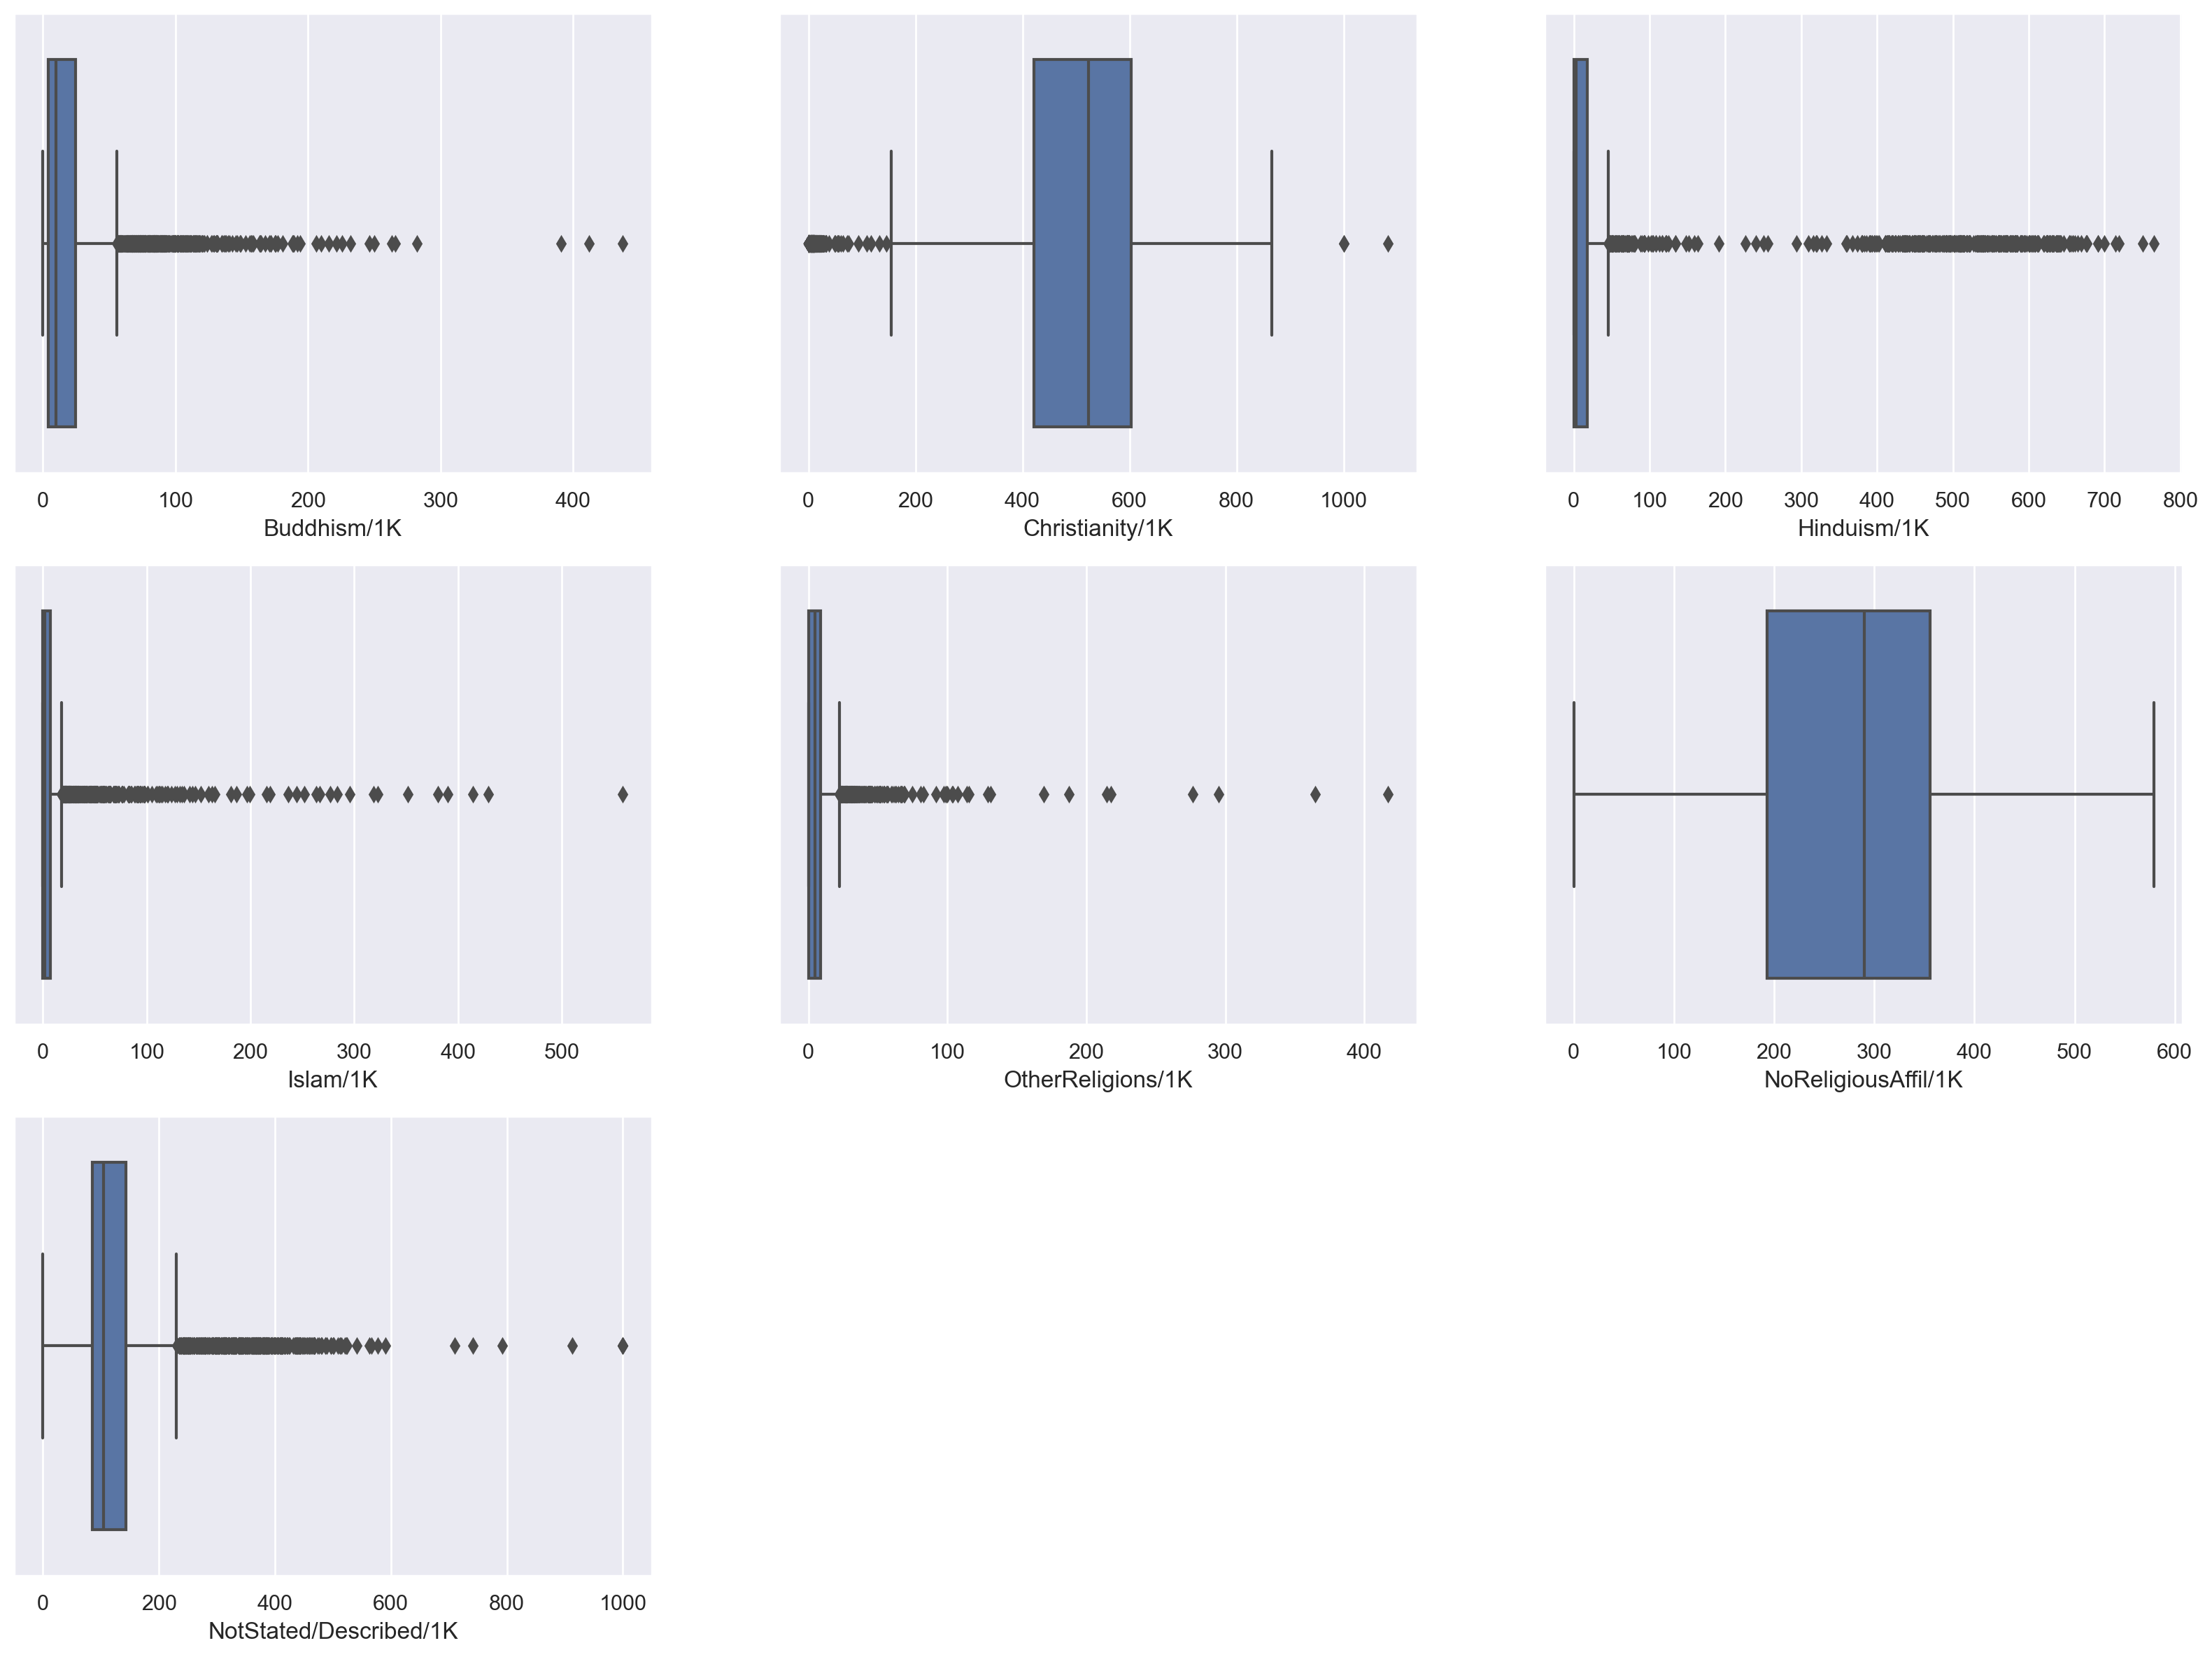

In [56]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'Buddhism/1K', data = demo_prop)

plt.subplot(4,3,2)
sns.boxplot(x = 'Christianity/1K', data = demo_prop)

plt.subplot(4,3,3)
sns.boxplot(x = 'Hinduism/1K', data = demo_prop)

plt.subplot(4,3,4)
sns.boxplot(x = 'Islam/1K', data = demo_prop)

plt.subplot(4,3,5)
sns.boxplot(x = 'OtherReligions/1K', data = demo_prop)

plt.subplot(4,3,6)
sns.boxplot(x = 'NoReligiousAffil/1K', data = demo_prop)

plt.subplot(4,3,7)
sns.boxplot(x = 'NotStated/Described/1K', data = demo_prop)

<AxesSubplot:xlabel='NotStated/Described/1K', ylabel='Count'>

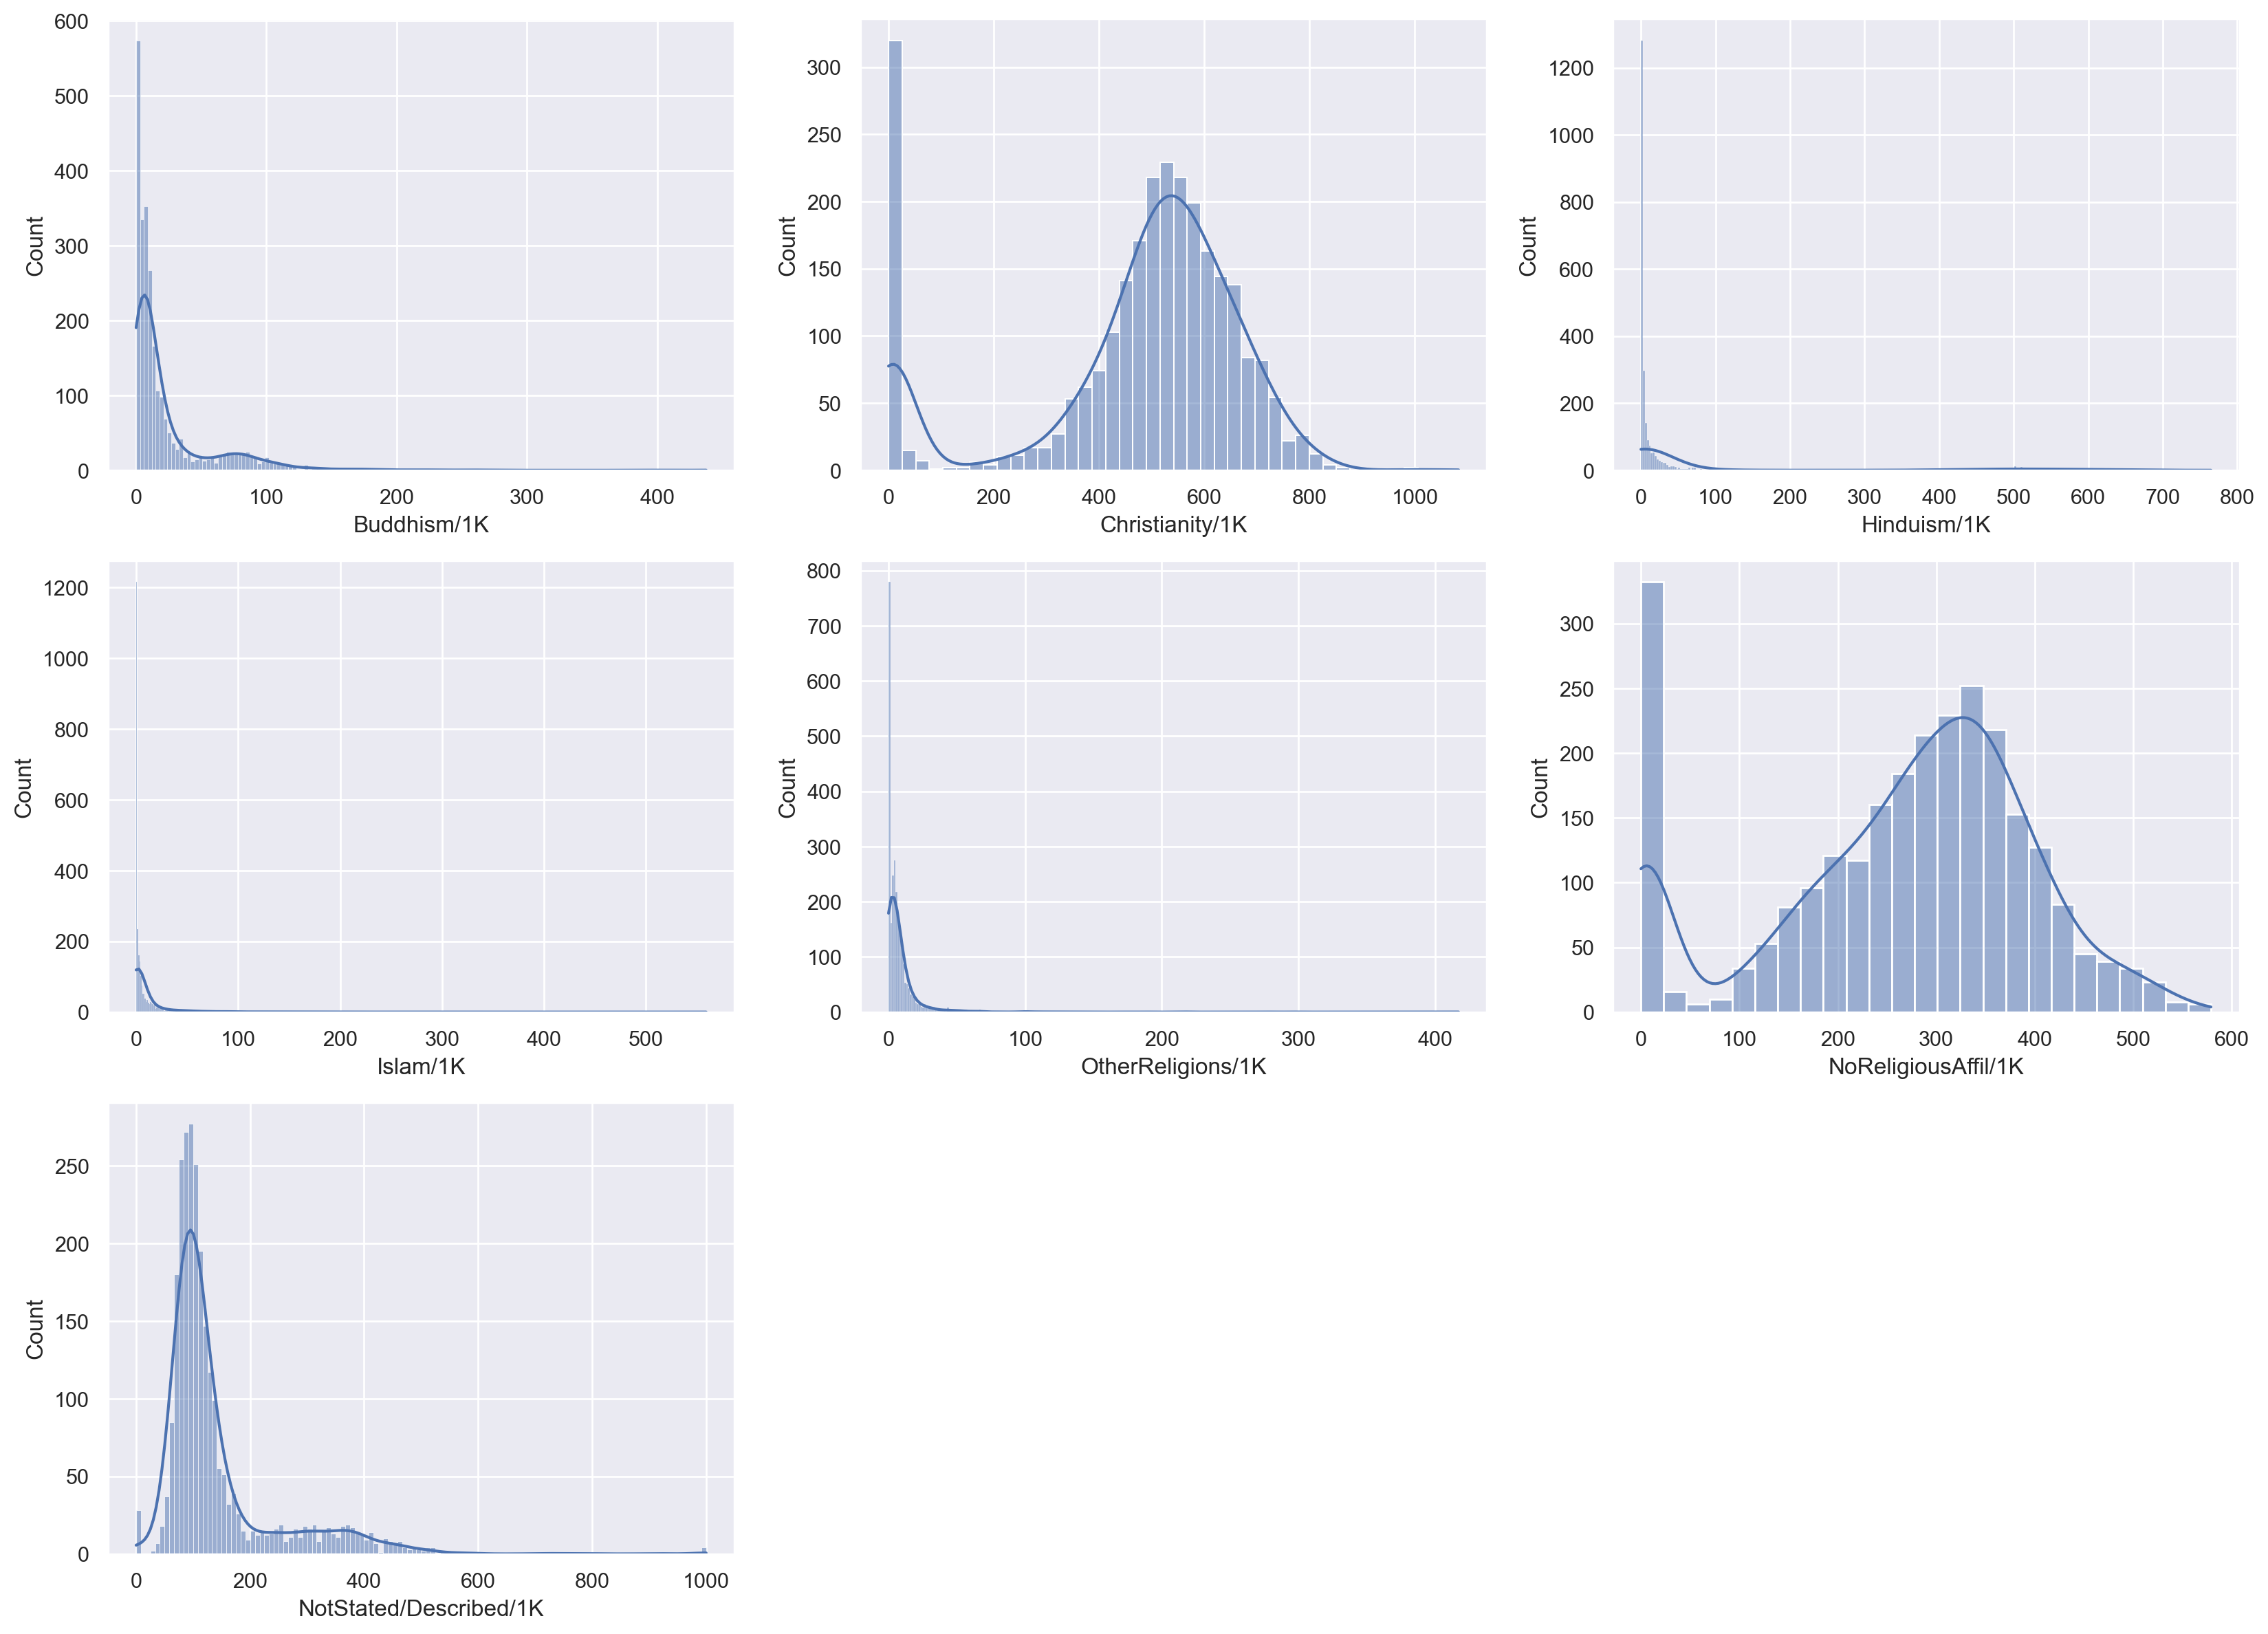

In [57]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.histplot(x = 'Buddhism/1K', data = demo_prop, kde = True)

plt.subplot(4,3,2)
sns.histplot(x = 'Christianity/1K', data = demo_prop, kde = True)

plt.subplot(4,3,3)
sns.histplot(x = 'Hinduism/1K', data = demo_prop, kde = True)

plt.subplot(4,3,4)
sns.histplot(x = 'Islam/1K', data = demo_prop, kde = True)

plt.subplot(4,3,5)
sns.histplot(x = 'OtherReligions/1K', data = demo_prop, kde = True)

plt.subplot(4,3,6)
sns.histplot(x = 'NoReligiousAffil/1K', data = demo_prop, kde = True)

plt.subplot(4,3,7)
sns.histplot(x = 'NotStated/Described/1K', data = demo_prop, kde = True)

#### Marital Status

<AxesSubplot:xlabel='NotAppMar/1K'>

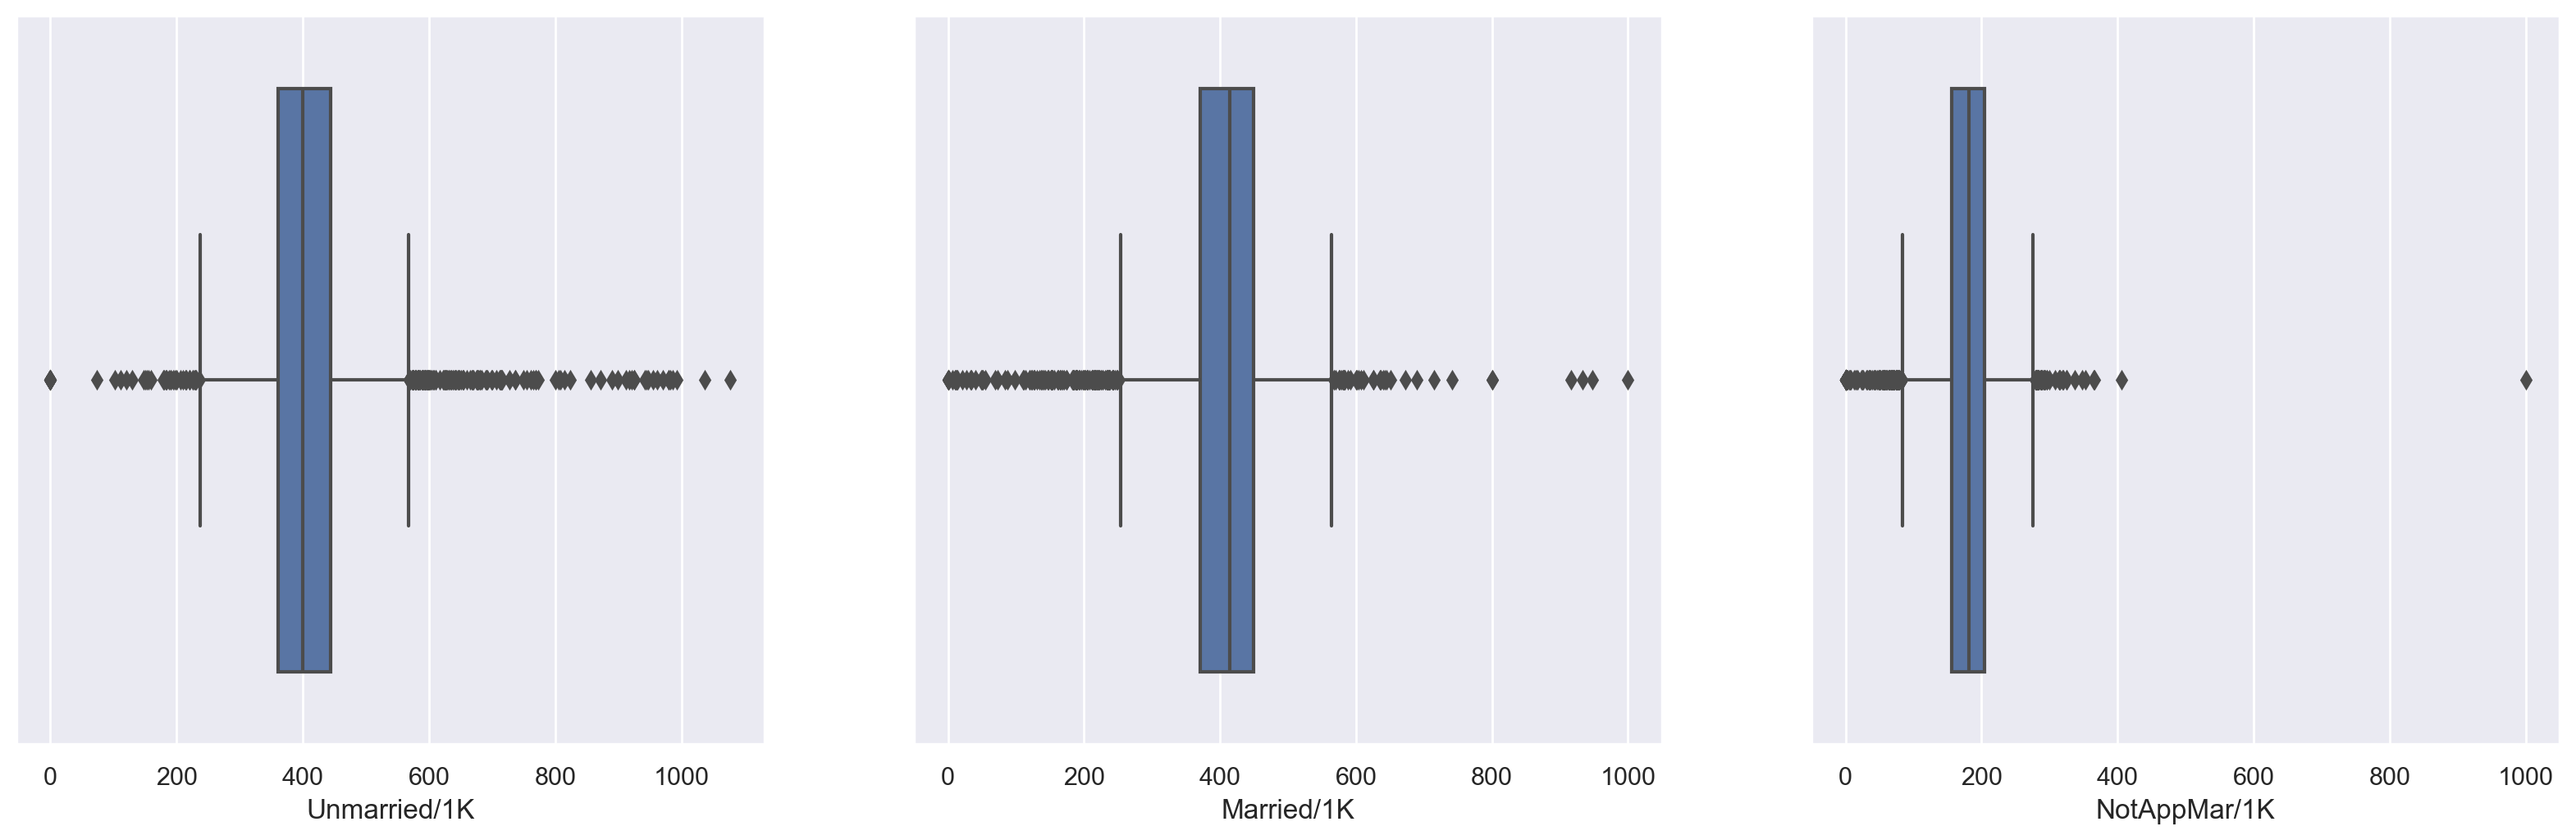

In [58]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(3,3,1)
sns.boxplot(x = 'Unmarried/1K', data = demo_prop)

plt.subplot(3,3,2)
sns.boxplot(x = 'Married/1K', data = demo_prop)

plt.subplot(3,3,3)
sns.boxplot(x = 'NotAppMar/1K', data = demo_prop)



<AxesSubplot:xlabel='NotAppMar/1K', ylabel='Count'>

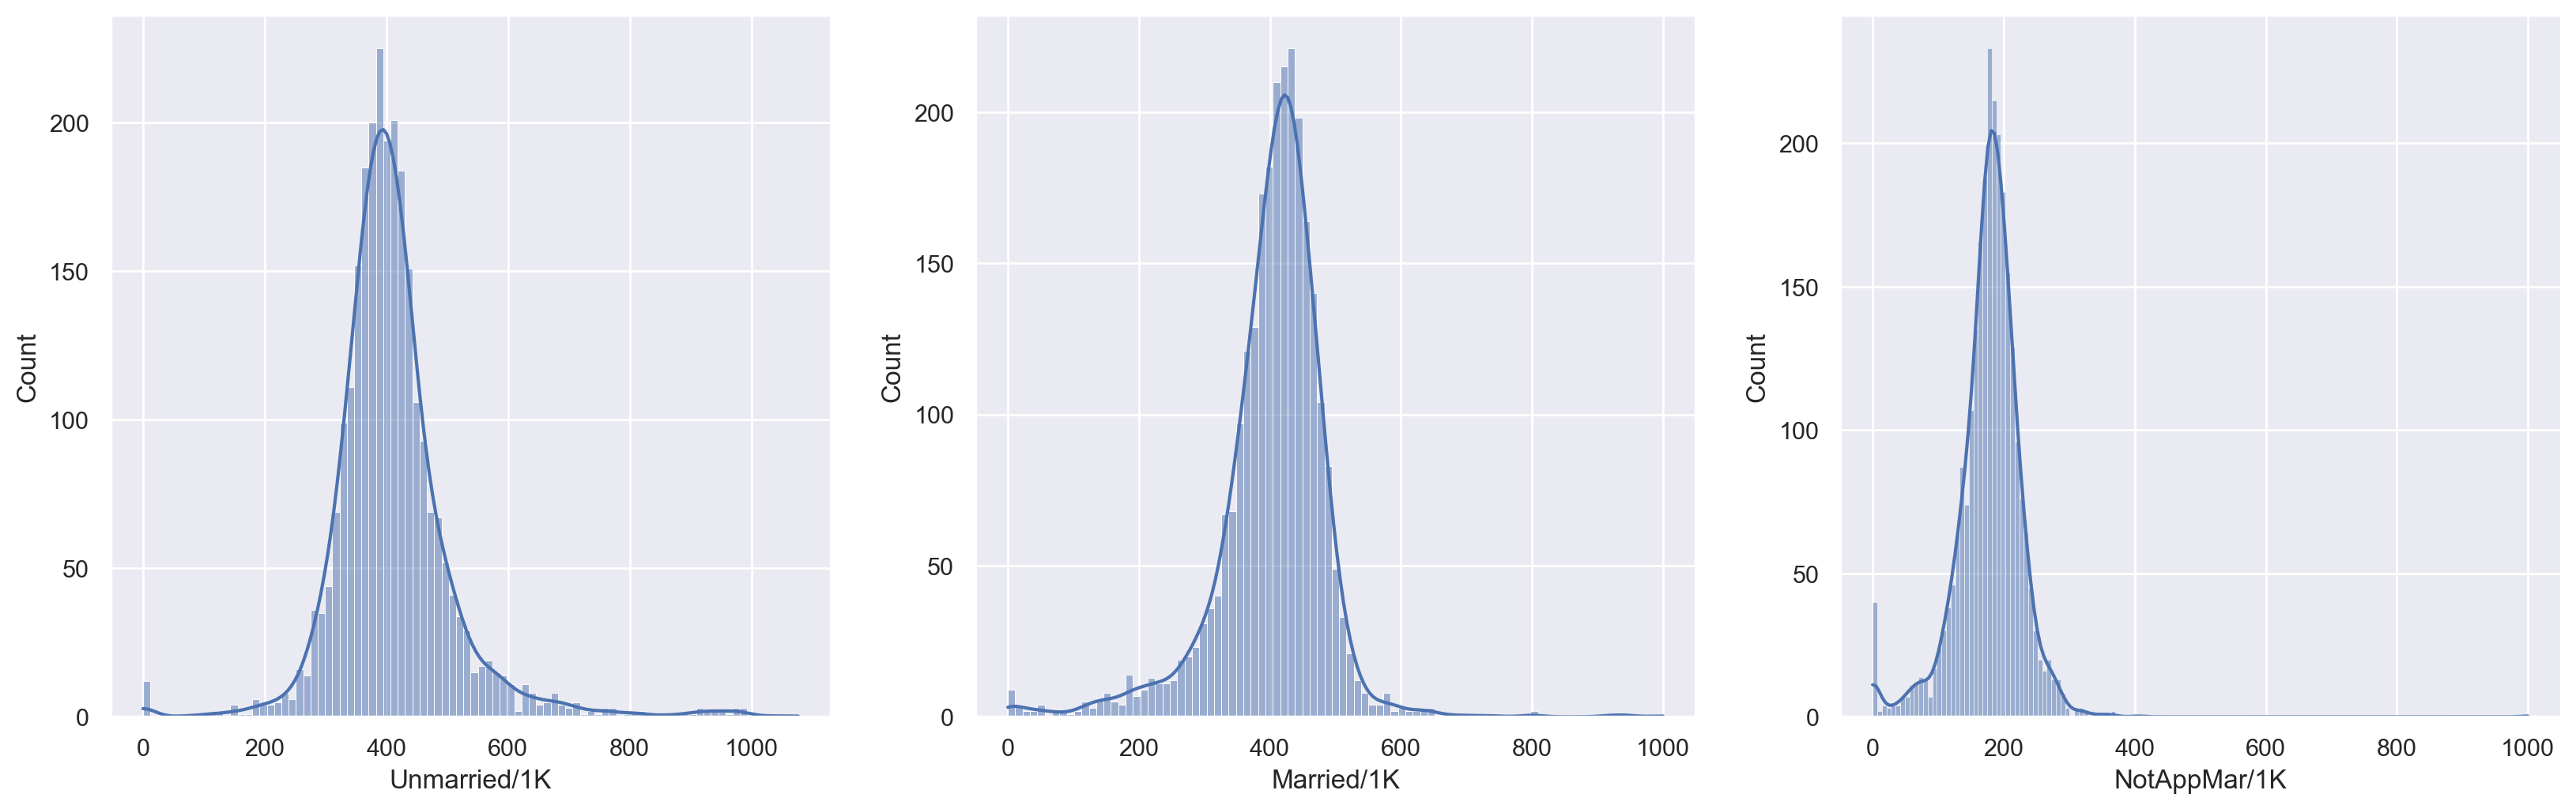

In [59]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(3,3,1)
sns.histplot(x = 'Unmarried/1K', data = demo_prop, kde= True)

plt.subplot(3,3,2)
sns.histplot(x = 'Married/1K', data = demo_prop, kde= True)

plt.subplot(3,3,3)
sns.histplot(x = 'NotAppMar/1K', data = demo_prop, kde= True)



#### Income

<AxesSubplot:xlabel='HighIncome/1K'>

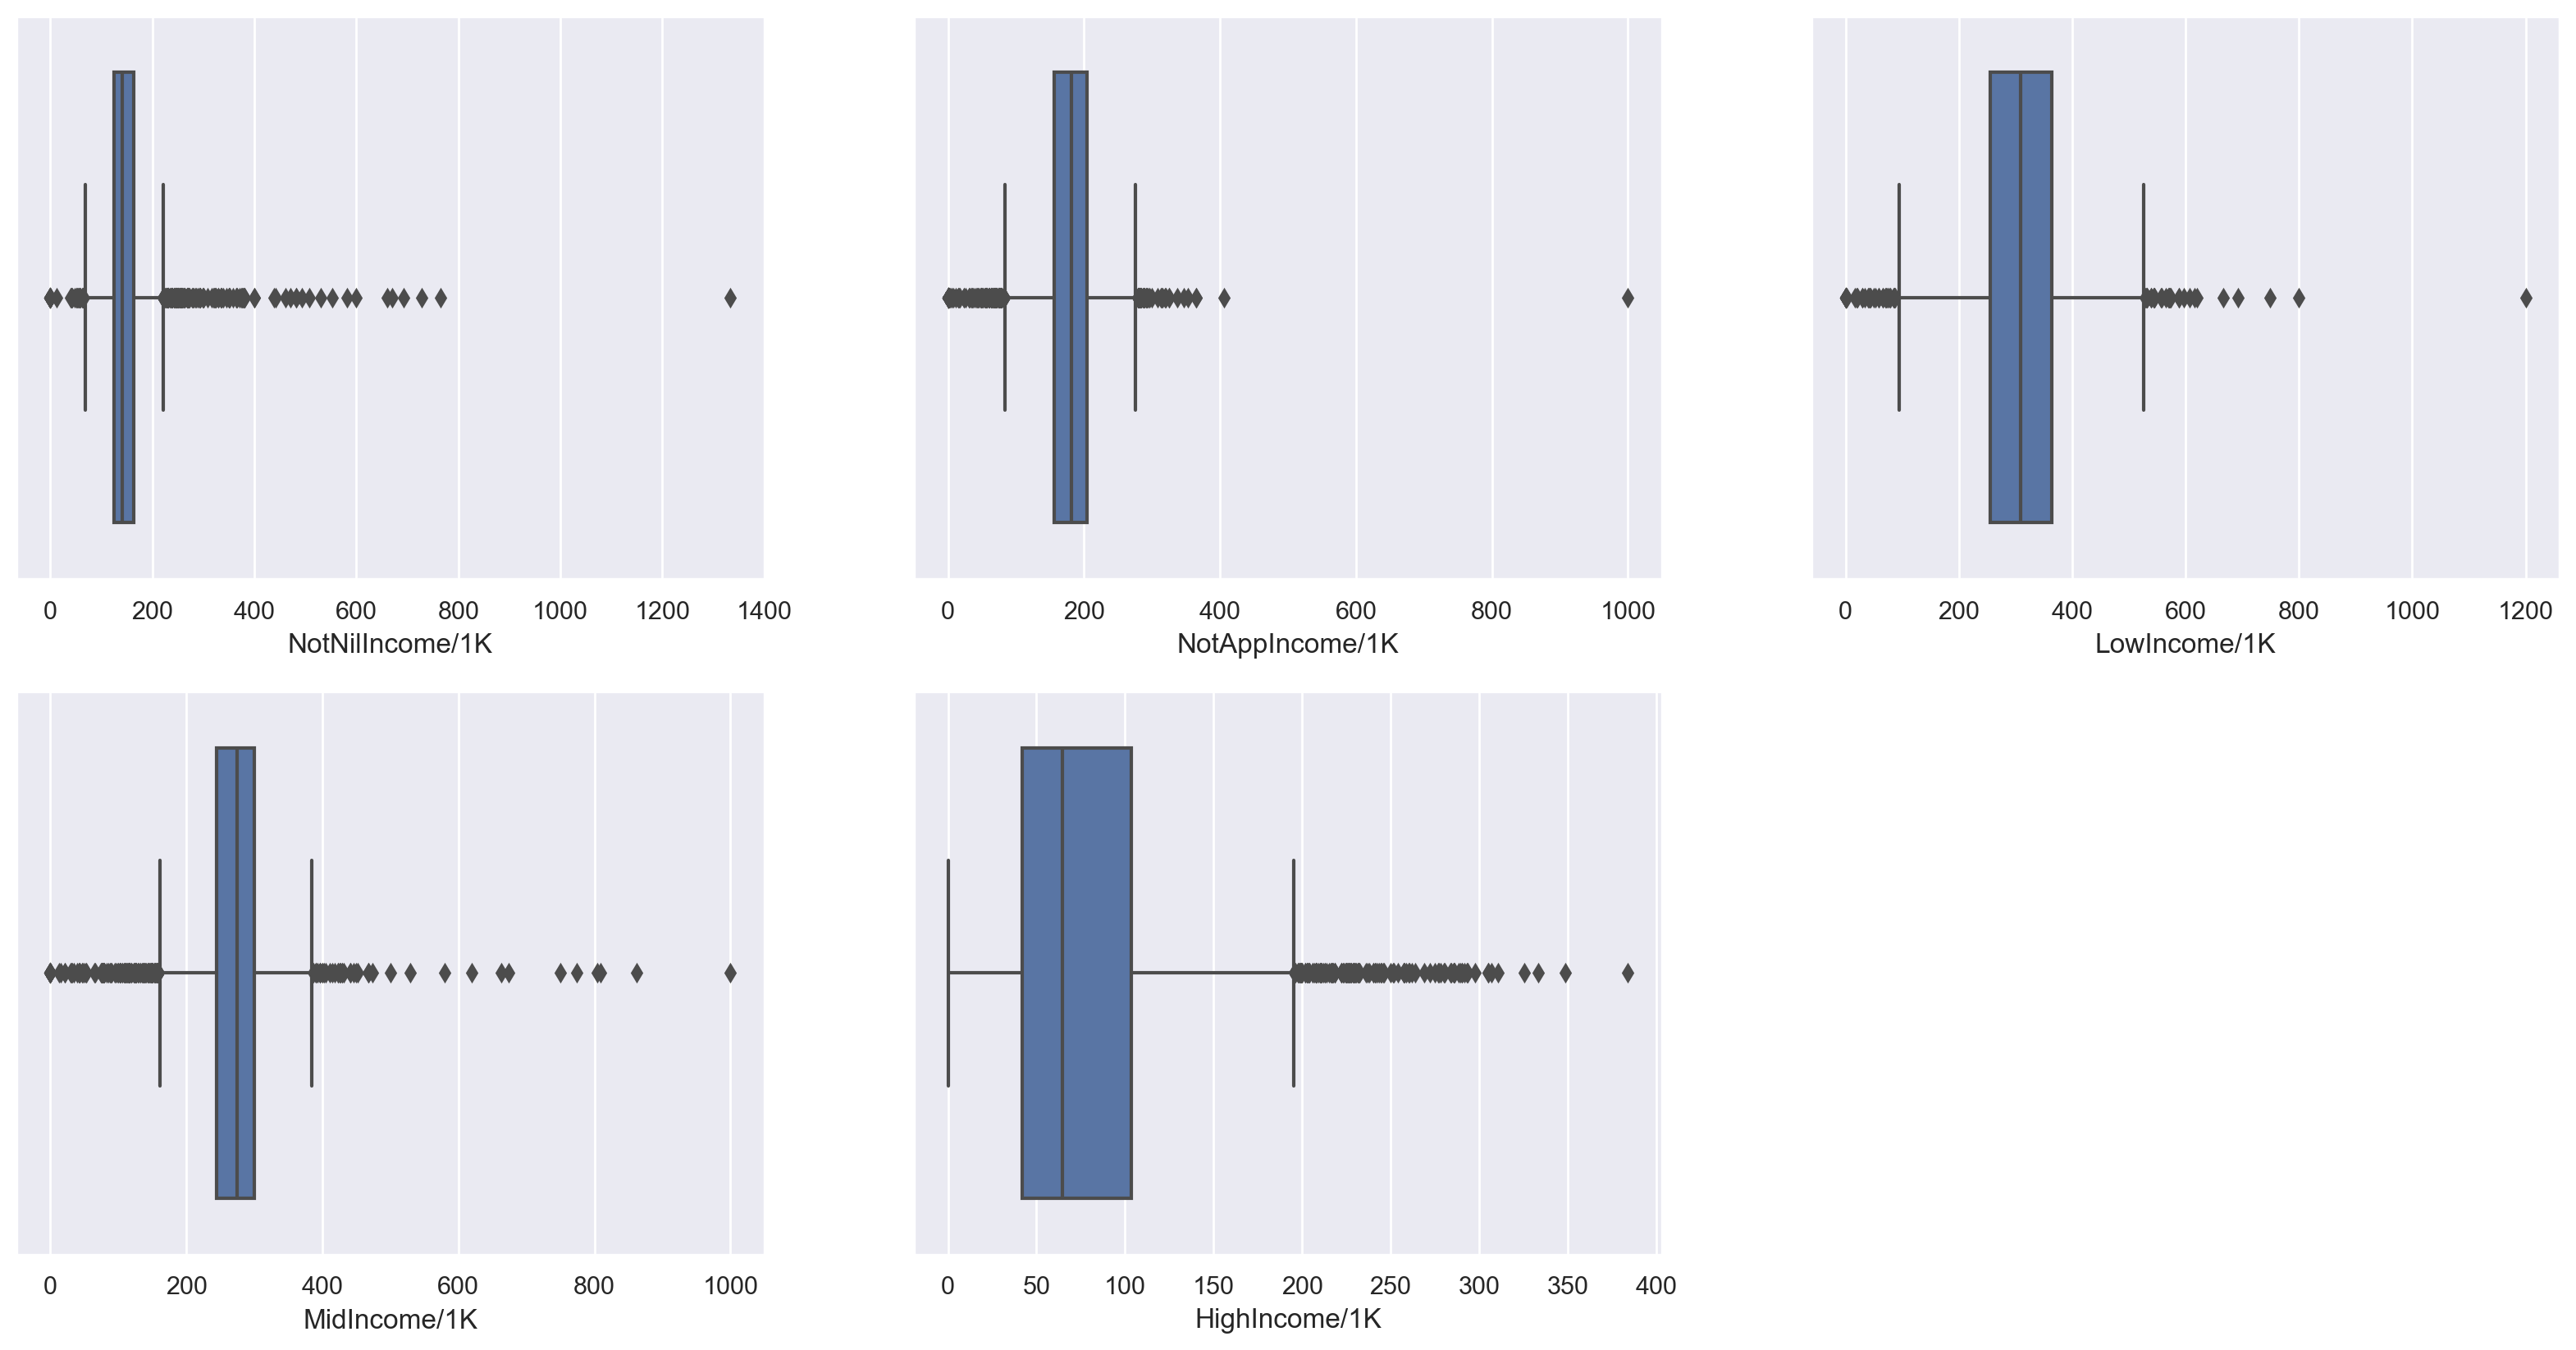

In [60]:
plt.figure(figsize=(20,10), dpi=200)

plt.subplot(2,3,1)
sns.boxplot(x = 'NotNilIncome/1K', data = demo_prop)

plt.subplot(2,3,2)
sns.boxplot(x = 'NotAppIncome/1K', data = demo_prop)

plt.subplot(2,3,3)
sns.boxplot(x = 'LowIncome/1K', data = demo_prop)

plt.subplot(2,3,4)
sns.boxplot(x = 'MidIncome/1K', data = demo_prop)

plt.subplot(2,3,5)
sns.boxplot(x = 'HighIncome/1K', data = demo_prop)



<AxesSubplot:xlabel='HighIncome/1K', ylabel='Count'>

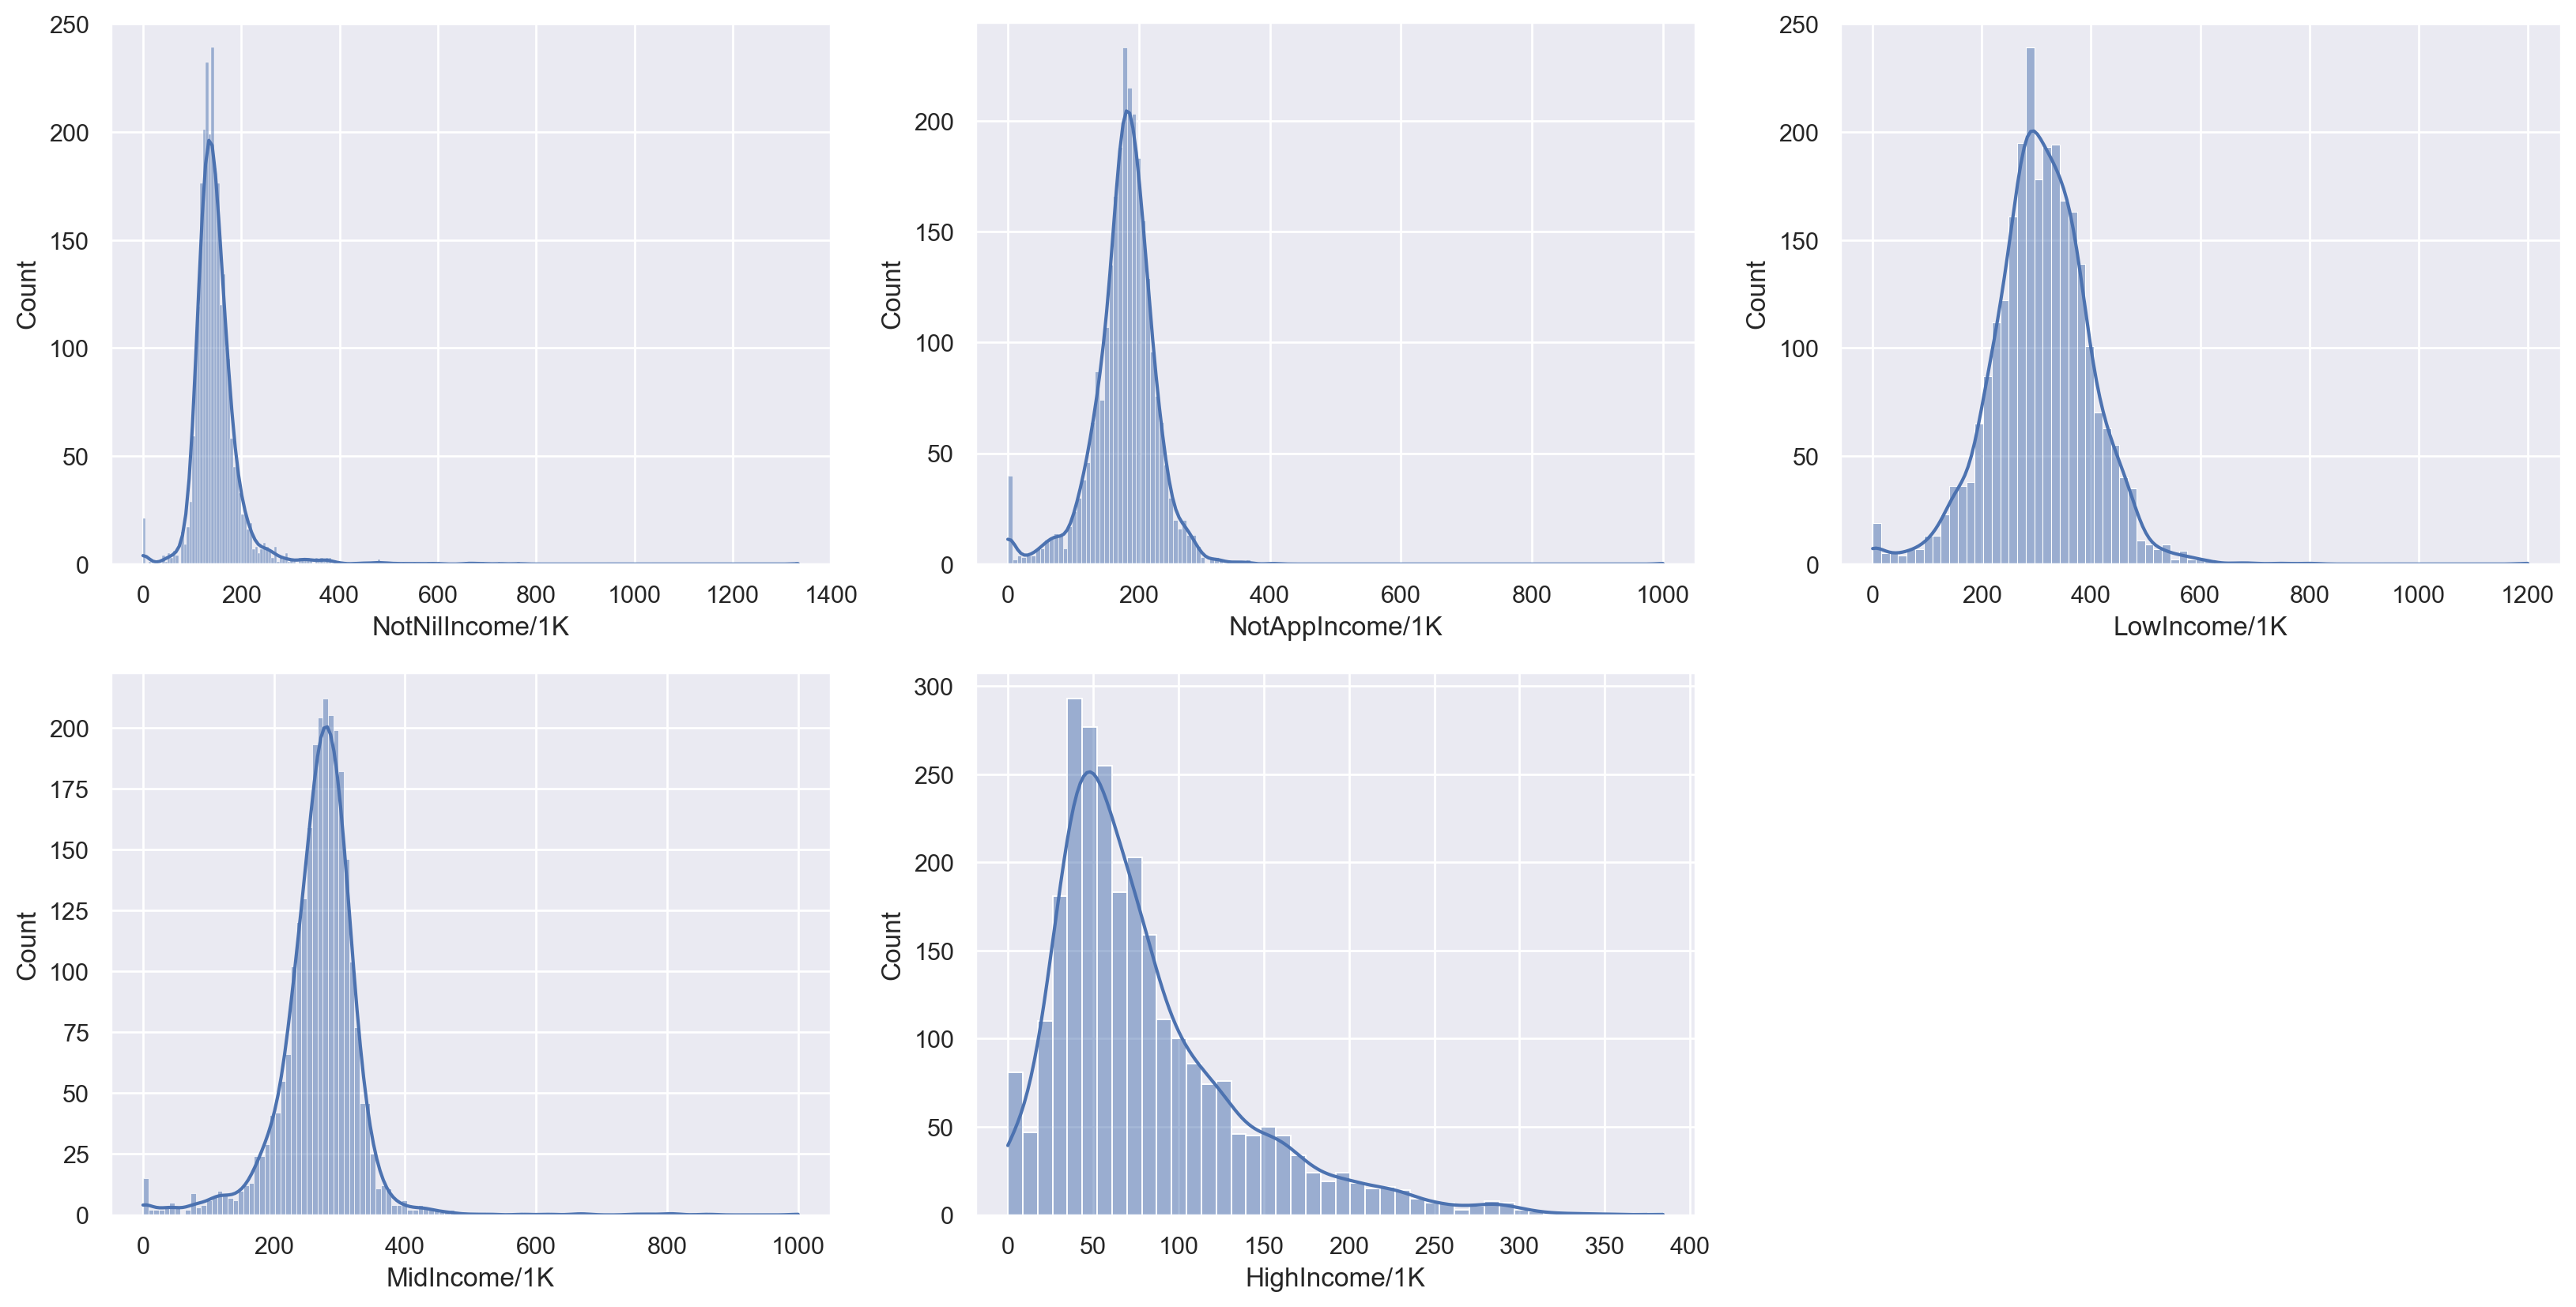

In [61]:
plt.figure(figsize=(20,10), dpi=200)

plt.subplot(2,3,1)
sns.histplot(x = 'NotNilIncome/1K', data = demo_prop, kde= True)

plt.subplot(2,3,2)
sns.histplot(x = 'NotAppIncome/1K', data = demo_prop, kde= True)

plt.subplot(2,3,3)
sns.histplot(x = 'LowIncome/1K', data = demo_prop, kde = True)

plt.subplot(2,3,4)
sns.histplot(x = 'MidIncome/1K', data = demo_prop, kde = True)

plt.subplot(2,3,5)
sns.histplot(x = 'HighIncome/1K', data = demo_prop, kde = True)



#### Rent

<AxesSubplot:xlabel='VeryHighRent/1K'>

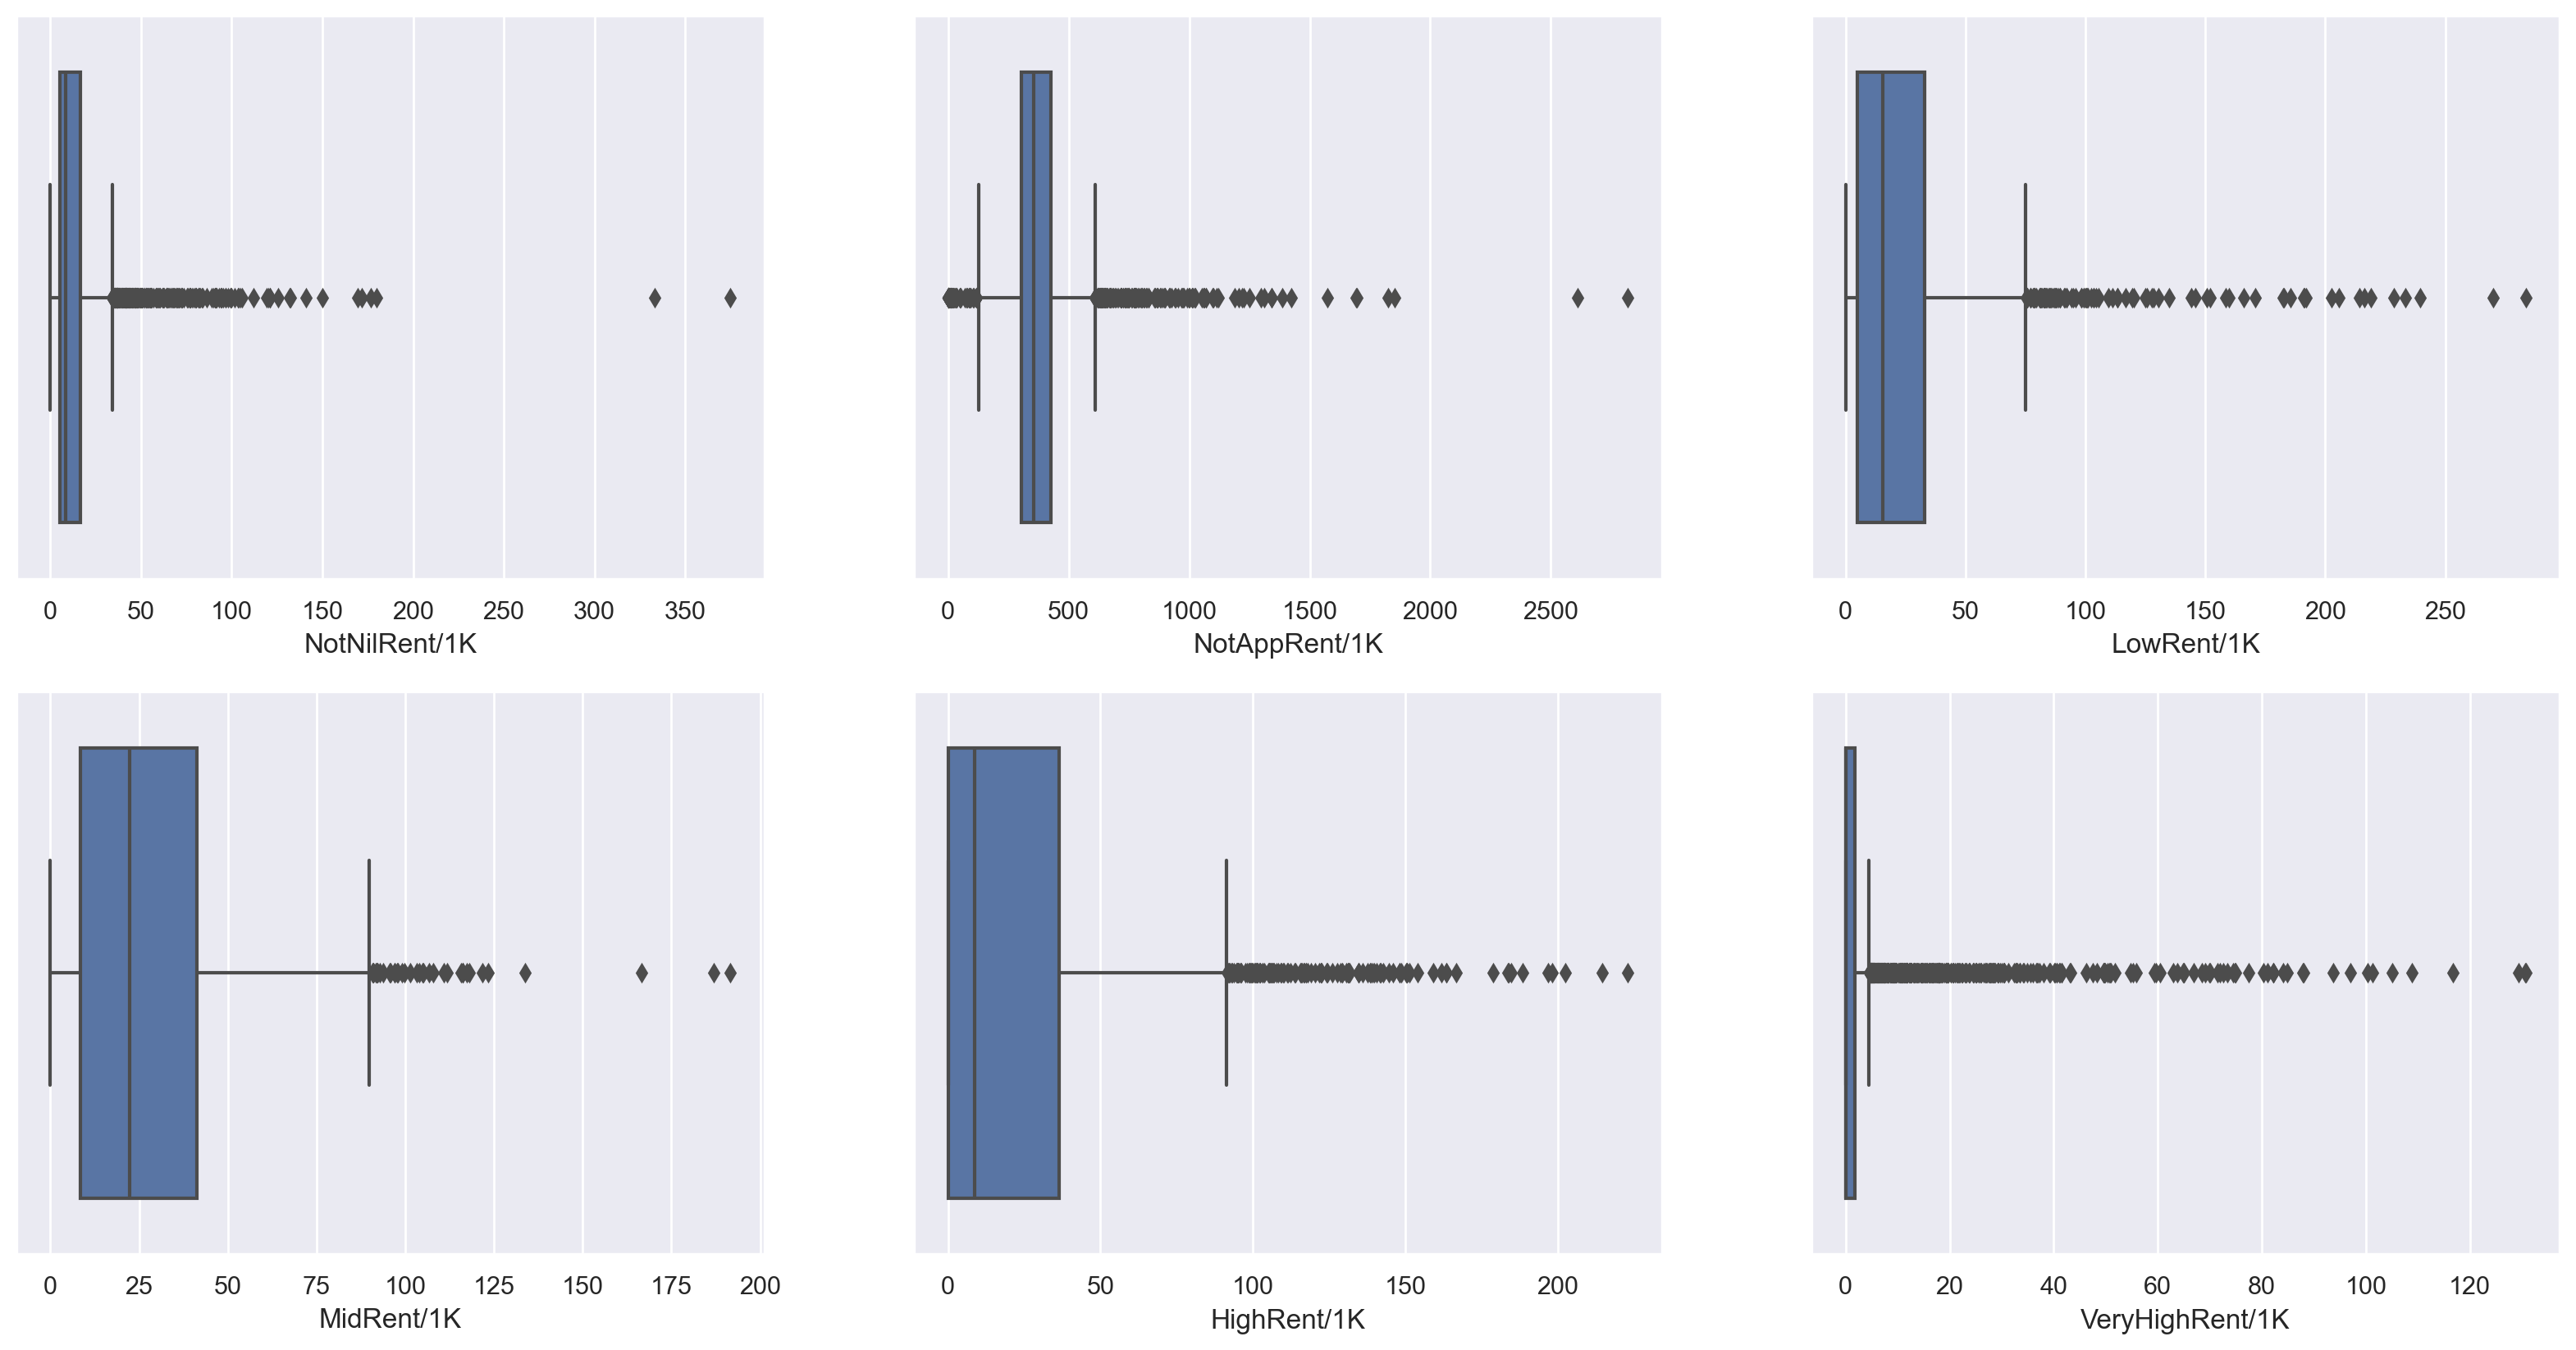

In [62]:
plt.figure(figsize=(20,10), dpi=200)

plt.subplot(2,3,1)
sns.boxplot(x = 'NotNilRent/1K', data = demo_prop)

plt.subplot(2,3,2)
sns.boxplot(x = 'NotAppRent/1K', data = demo_prop)

plt.subplot(2,3,3)
sns.boxplot(x = 'LowRent/1K', data = demo_prop)

plt.subplot(2,3,4)
sns.boxplot(x = 'MidRent/1K', data = demo_prop)

plt.subplot(2,3,5)
sns.boxplot(x = 'HighRent/1K', data = demo_prop)

plt.subplot(2,3,6)
sns.boxplot(x = 'VeryHighRent/1K', data = demo_prop)


<AxesSubplot:xlabel='VeryHighRent/1K', ylabel='Count'>

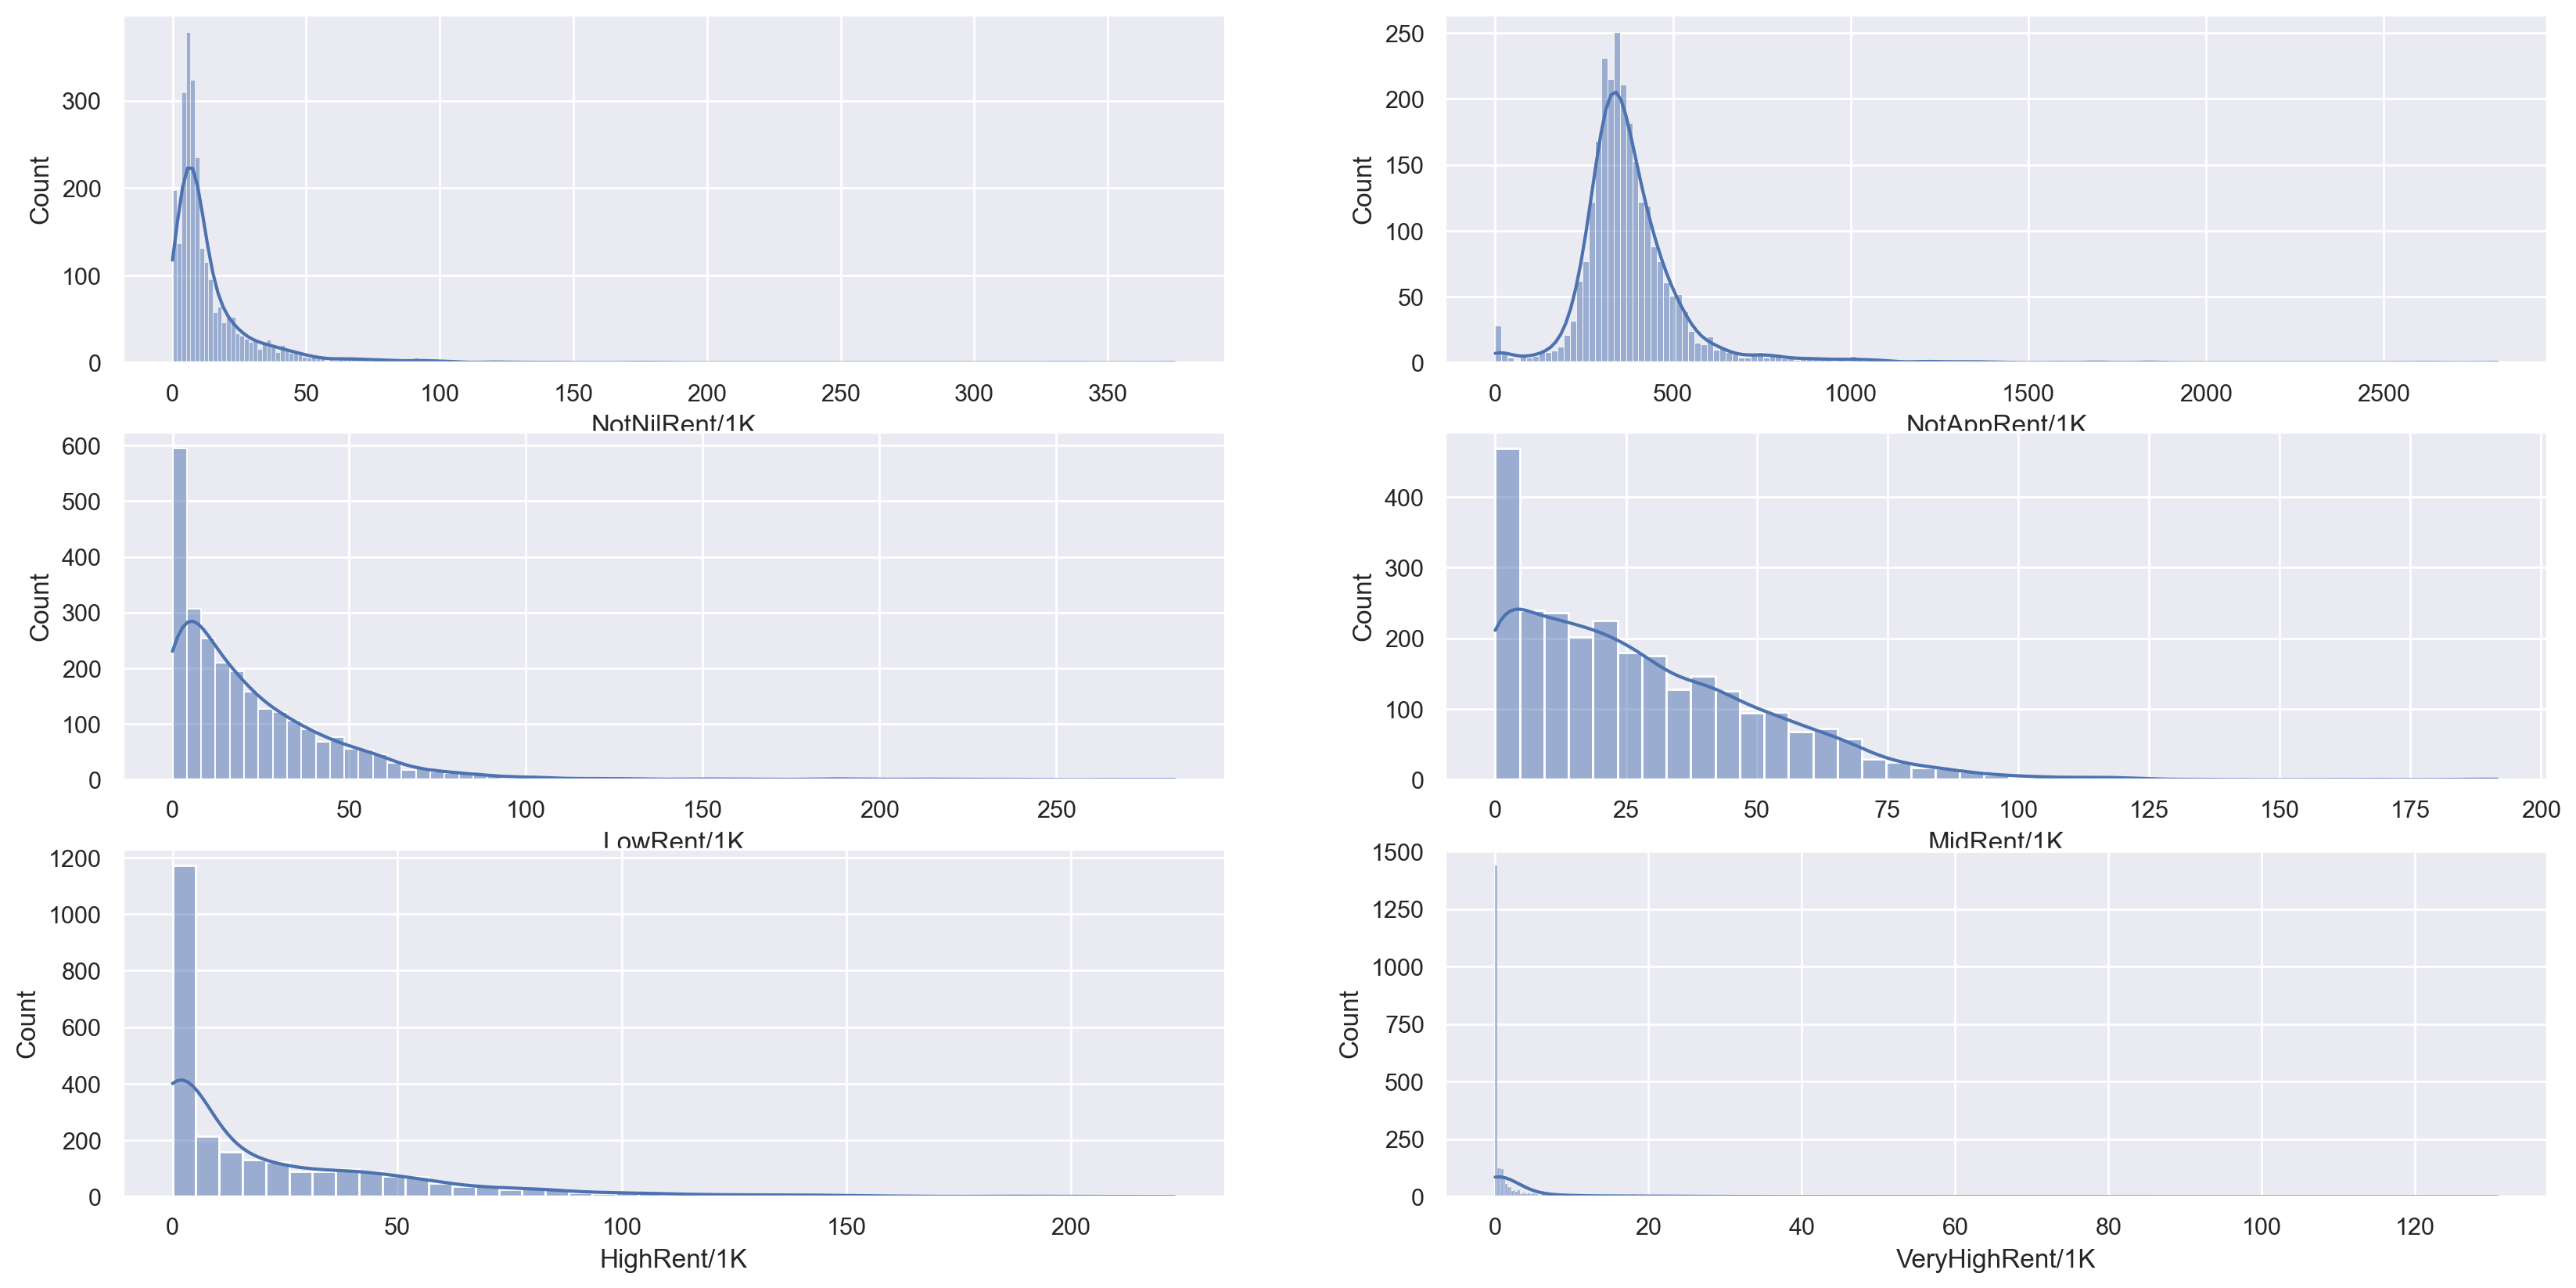

In [63]:
plt.figure(figsize=(20,10), dpi=200)

plt.subplot(3,2,1)
sns.histplot(x = 'NotNilRent/1K', data = demo_prop, kde= True)

plt.subplot(3,2,2)
sns.histplot(x = 'NotAppRent/1K', data = demo_prop, kde = True)

plt.subplot(3,2,3)
sns.histplot(x = 'LowRent/1K', data = demo_prop, kde = True)

plt.subplot(3,2,4)
sns.histplot(x = 'MidRent/1K', data = demo_prop, kde = True)

plt.subplot(3,2,5)
sns.histplot(x = 'HighRent/1K', data = demo_prop, kde = True)

plt.subplot(3,2,6)
sns.histplot(x = 'VeryHighRent/1K', data = demo_prop, kde = True)

## BIVARIATE ANALYSIS

In [64]:
demo_prop_df = demo_prop.drop(['Postcode'], axis = 1)

<AxesSubplot:>

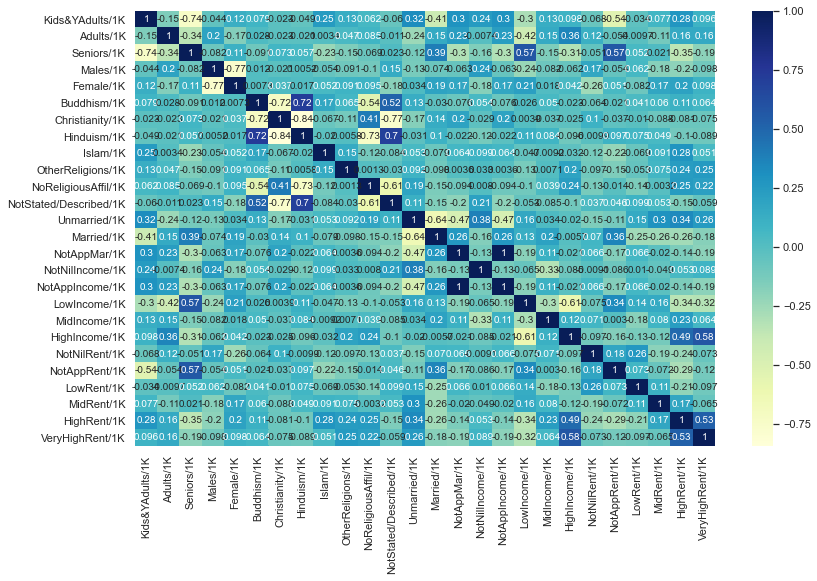

In [65]:
# Let's see the correlation matrix 
plt.figure(figsize = (13,8))       
sns.heatmap(demo_prop_df.corr(),annot = True, cmap="YlGnBu")

## Clustering Demographics Data Set

In [66]:
X_demo = demo_prop.drop('Postcode',axis =1)  
y_demo = demo_prop['Postcode']

#### Standardizing the data set

In [67]:
scaler = StandardScaler()
X_scaled_demo = scaler.fit_transform(X_demo)

In [68]:
X_scaled_demo[:5,:5]

array([[ 0.52821354,  1.69031622, -1.57499073,  0.85622604, -0.97906028],
       [ 0.66537396,  0.72107153, -1.0808986 , -0.11797399,  0.10449925],
       [ 0.66251251,  0.63589626, -1.02759409, -0.17762978,  0.16397904],
       [ 5.05135415, -3.44716661, -2.31978931,  2.66663833, -2.37572562],
       [ 0.43283293,  1.10794138, -1.11671266,  0.23760861, -0.28445688]])

In [69]:
X_scaled_demo_df = pd.DataFrame(X_scaled_demo, columns = X_demo.columns)

#### PCA

In [70]:
pca_demo = PCA(random_state = 42)
pca_demo.fit(X_scaled_demo)

PCA(random_state=42)

In [71]:
pca_demo.components_[0]

array([-0.29233161, -0.14251839,  0.3476256 ,  0.04239217, -0.04843261,
        0.14393481, -0.16811443,  0.2658296 , -0.11639575, -0.13433456,
       -0.26560662,  0.23377041, -0.08899623,  0.1573459 , -0.11288828,
       -0.04822842, -0.11288828,  0.30508056, -0.1024226 , -0.28431286,
        0.07272316,  0.27681712,  0.09645658, -0.01200381, -0.31488213,
       -0.23959353])

In [72]:
# finding the total variance explained ratio

pca_demo.explained_variance_ratio_

array([1.56028876e-01, 1.44067490e-01, 1.18599335e-01, 9.40422876e-02,
       8.67333494e-02, 5.02902656e-02, 4.60299008e-02, 3.90720253e-02,
       3.75293693e-02, 3.42681298e-02, 3.15209739e-02, 2.35176275e-02,
       2.33177064e-02, 1.93297579e-02, 1.85618280e-02, 1.48682230e-02,
       1.25047801e-02, 1.21782362e-02, 1.05552861e-02, 9.79753475e-03,
       7.22001674e-03, 4.62096738e-03, 2.74132692e-03, 2.31707790e-03,
       2.87627928e-04, 3.03894220e-33])

In [73]:
# finding the cummulative total variance explained ratio

var_cumu_demo = np.cumsum(pca_demo.explained_variance_ratio_)
var_cumu_demo


array([0.15602888, 0.30009637, 0.4186957 , 0.51273799, 0.59947134,
       0.6497616 , 0.6957915 , 0.73486353, 0.7723929 , 0.80666103,
       0.838182  , 0.86169963, 0.88501734, 0.9043471 , 0.92290892,
       0.93777715, 0.95028193, 0.96246016, 0.97301545, 0.98281298,
       0.990033  , 0.99465397, 0.99739529, 0.99971237, 1.        ,
       1.        ])

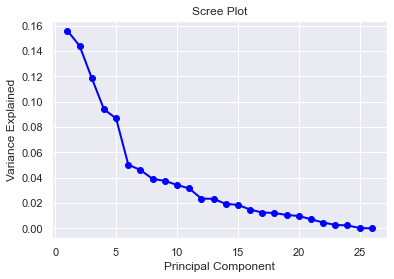

In [74]:
PC_values = np.arange(pca_demo.n_components_) + 1
plt.plot(PC_values, pca_demo.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [75]:
pca_demo_final = IncrementalPCA(n_components=10)

In [76]:
X_pca_demo_final = pca_demo_final.fit_transform(X_scaled_demo)

In [77]:
print(X_demo.shape)
print(X_pca_demo_final.shape)

(2641, 26)
(2641, 10)


In [78]:
corrmat_demo = np.corrcoef(X_pca_demo_final.transpose())

In [79]:
corrmat_demo.shape

(10, 10)

<AxesSubplot:>

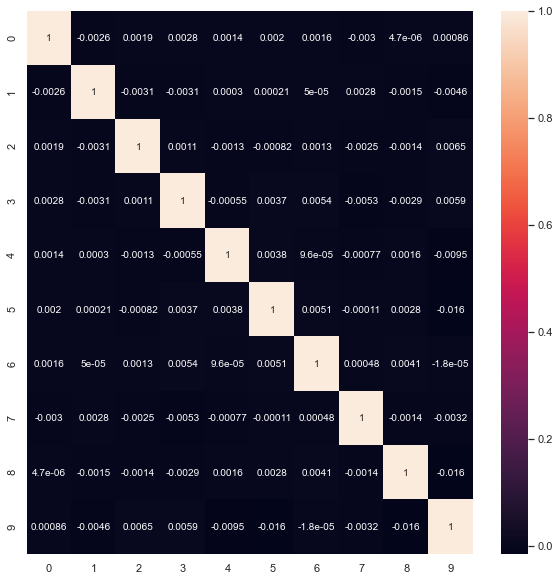

In [80]:
# Plotting the heatmap of the corr matrix
plt.figure(figsize=[10,10])
sns.heatmap(corrmat_demo, annot=True)

### Clustering: Hierarchical 

In [81]:
X_scaled_demo_df.head()

Kids&YAdults/1K  Adults/1K  Seniors/1K  Males/1K  Female/1K  Buddhism/1K  \
0         0.528214   1.690316   -1.574991  0.856226  -0.979060     0.484718   
1         0.665374   0.721072   -1.080899 -0.117974   0.104499     0.269670   
2         0.662513   0.635896   -1.027594 -0.177630   0.163979     0.332774   
3         5.051354  -3.447167   -2.319789  2.666638  -2.375726     0.287584   
4         0.432833   1.107941   -1.116713  0.237609  -0.284457     0.067127   

   Christianity/1K  Hinduism/1K  Islam/1K  OtherReligions/1K  ...  \
0        -0.612343    -0.163838  0.108117           0.020406  ...   
1        -0.091347    -0.186763  0.427848           0.192089  ...   
2         0.123571    -0.350413  0.177483          -0.030559  ...   
3        -1.455100     0.176152  1.769858           0.115855  ...   
4        -0.135368    -0.299842  0.073108           0.003202  ...   

   NotAppIncome/1K  LowIncome/1K  MidIncome/1K  HighIncome/1K  NotNilRent/1K  \
0        -1.850043     -2.065075      1.348035       2.496803       1.061602   
1         0.489739     -1.382776      0.689130       1.104779      -0.329983   
2         0.740089     -1.392497      0.794489       0.824187      -0.385531   
3        -3.467873      1.167713     -3.318003      -0.868471      -0.715302   
4        -0.405797     -1.856310      0.941892       2.343818       0.328515   

   NotAppRent/1K  LowRent/1K  MidRent/1K  HighRent/1K  VeryHighRent/1K  
0      -0.596064   -0.589118    0.572586     3.485017         4.915333  
1      -0.776784   -0.193212    0.461642     1.445997         0.850150  
2      -0.653414   -0.067244   -0.596671     1.254103         0.230048  
3      -2.230968   -0.842361   -1.151620    -0.715483        -0.333848  
4      -0.635384   -0.228592    0.131828     2.389032         2.833592  

[5 rows x 26 columns]

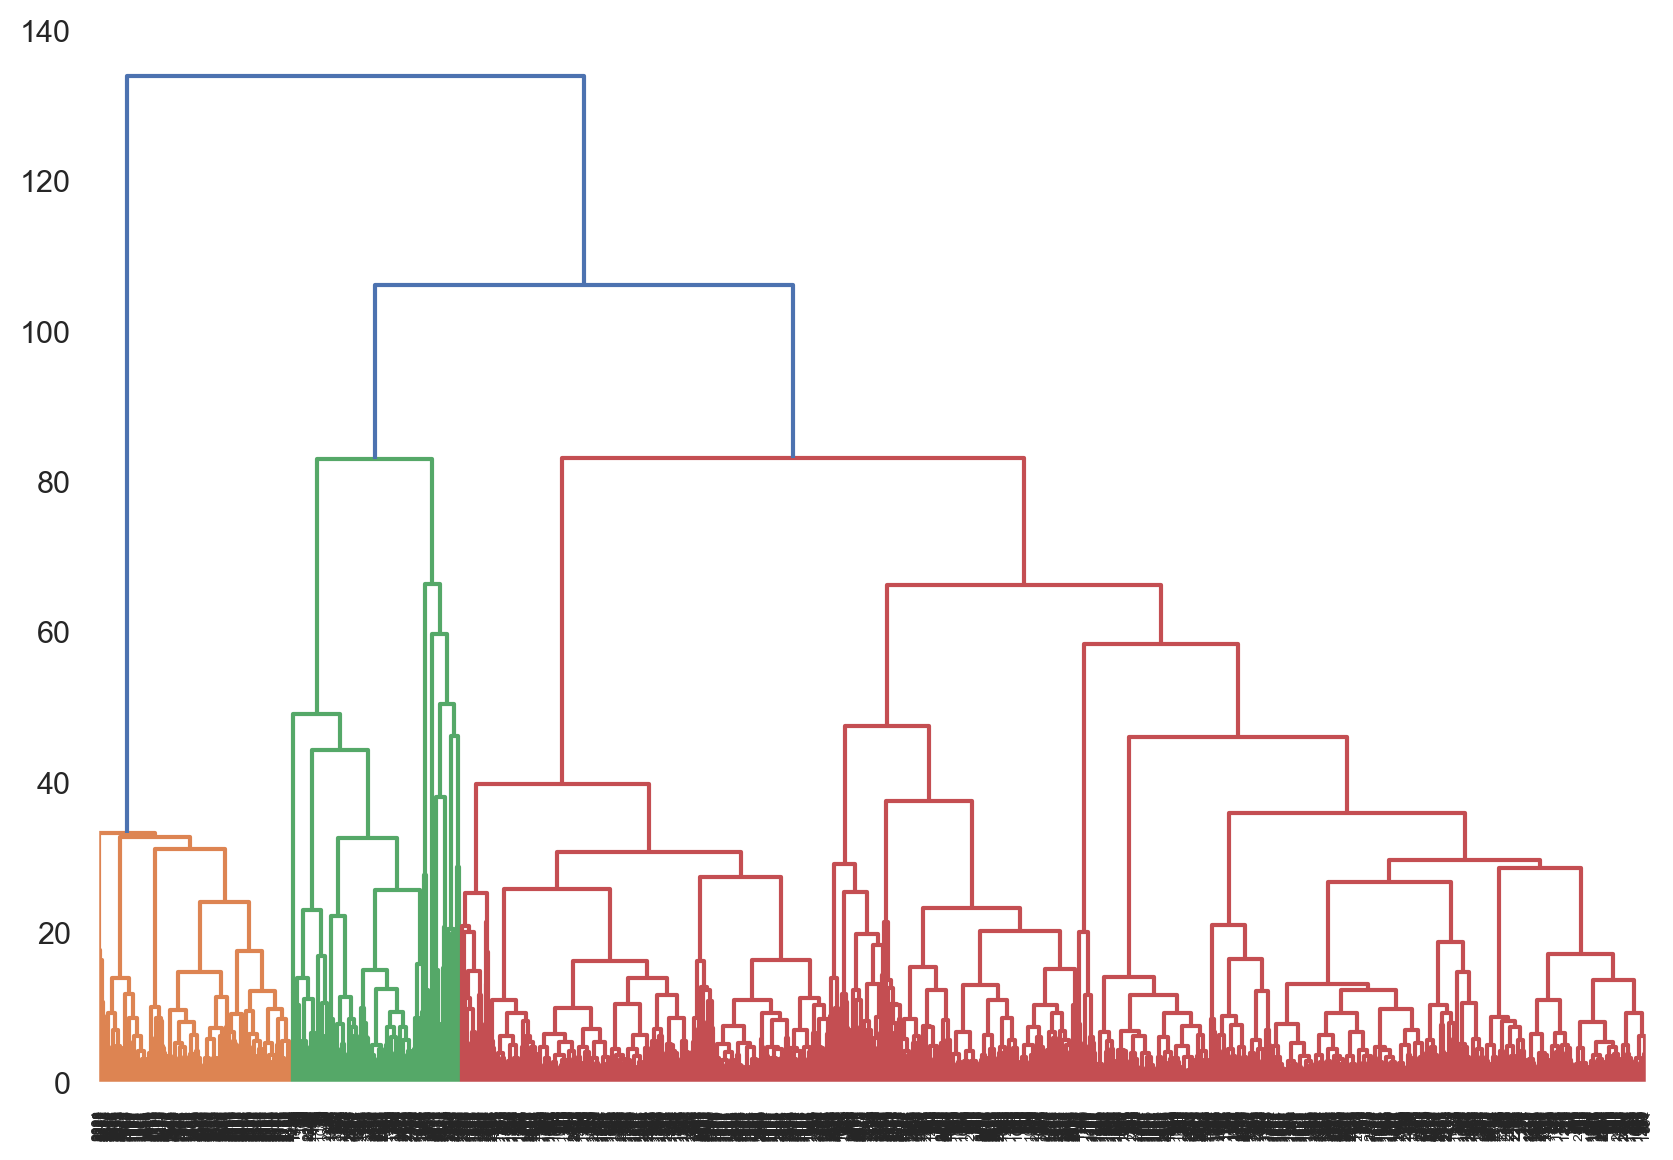

In [82]:
plt.figure(figsize=(10,7),dpi=200)
w_merge_demo = linkage(X_scaled_demo_df, method="ward", metric='euclidean')
dendrogram(w_merge_demo)
plt.show()

In [83]:
# 4 clusters using ward linkge
w_cluster_labels_demo = cut_tree(w_merge_demo, n_clusters=3).reshape(-1, )
w_cluster_labels_demo

array([0, 1, 1, ..., 0, 1, 1])

In [84]:
# adding the heirarchical cluster label to our dataset
demo_prop["Hier_Cluster_labels_demo"] = w_cluster_labels_demo

In [85]:
demo_prop.head()

Postcode  Kids&YAdults/1K   Adults/1K  Seniors/1K    Males/1K   Female/1K  \
0       800       400.958713  504.406989   95.871347  561.156641  438.379465   
1       810       413.398595  443.546934  143.234641  503.753528  496.366585   
2       812       413.139073  438.198675  148.344371  500.238411  499.549669   
3       815       811.188811  181.818182   24.475524  667.832168  363.636364   
4       820       392.308088  467.838963  139.801532  524.705640  475.551442   

   Buddhism/1K  Christianity/1K  Hinduism/1K   Islam/1K  ...  LowIncome/1K  \
0    42.368950       344.209061    45.616205  14.535333  ...    117.210453   
1    34.292235       453.246051    41.619122  25.193682  ...    180.289472   
2    36.662252       498.225166    13.086093  16.847682  ...    179.390728   
3    34.965035       167.832168   104.895105  69.930070  ...    416.083916   
4    26.685177       444.033112    21.903440  13.368297  ...    136.510875   

   MidIncome/1K  HighIncome/1K  NotNilRent/1K  NotAppRent/1K  LowRent/1K  \
0    356.734189     218.648523      37.111489     281.119530    6.958404   
1    313.764939     141.222749       8.047565     250.045042   17.836767   
2    320.635762     125.615894       6.887417     271.258278   21.298013   
3     52.447552      31.468531       0.000000       0.000000    0.000000   
4    330.248342     210.139339      21.800607     274.358579   16.864620   

   MidRent/1K  HighRent/1K  VeryHighRent/1K  Hier_Cluster_labels_demo  
0   40.822638   134.683779        65.099737                         0  
1   38.195904    69.305147        14.683803                         1  
2   13.139073    63.152318         6.993377                         1  
3    0.000000     0.000000         0.000000                         0  
4   30.387166    99.542393        39.282225                         0  

[5 rows x 28 columns]

In [86]:
X_pca_demo_final_df = pd.DataFrame(X_pca_demo_final, columns = ['PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10' ])

### Analysing Results

In [87]:
X_pca_demo_final_df['Hier_Cluster_Labels_Demo'] = w_cluster_labels_demo

In [88]:
demo_prop['Hier_Cluster_labels_demo'].value_counts()

1    2021
2     332
0     288
Name: Hier_Cluster_labels_demo, dtype: int64

#### Age

<AxesSubplot:xlabel='Hier_Cluster_labels_demo', ylabel='Seniors/1K'>

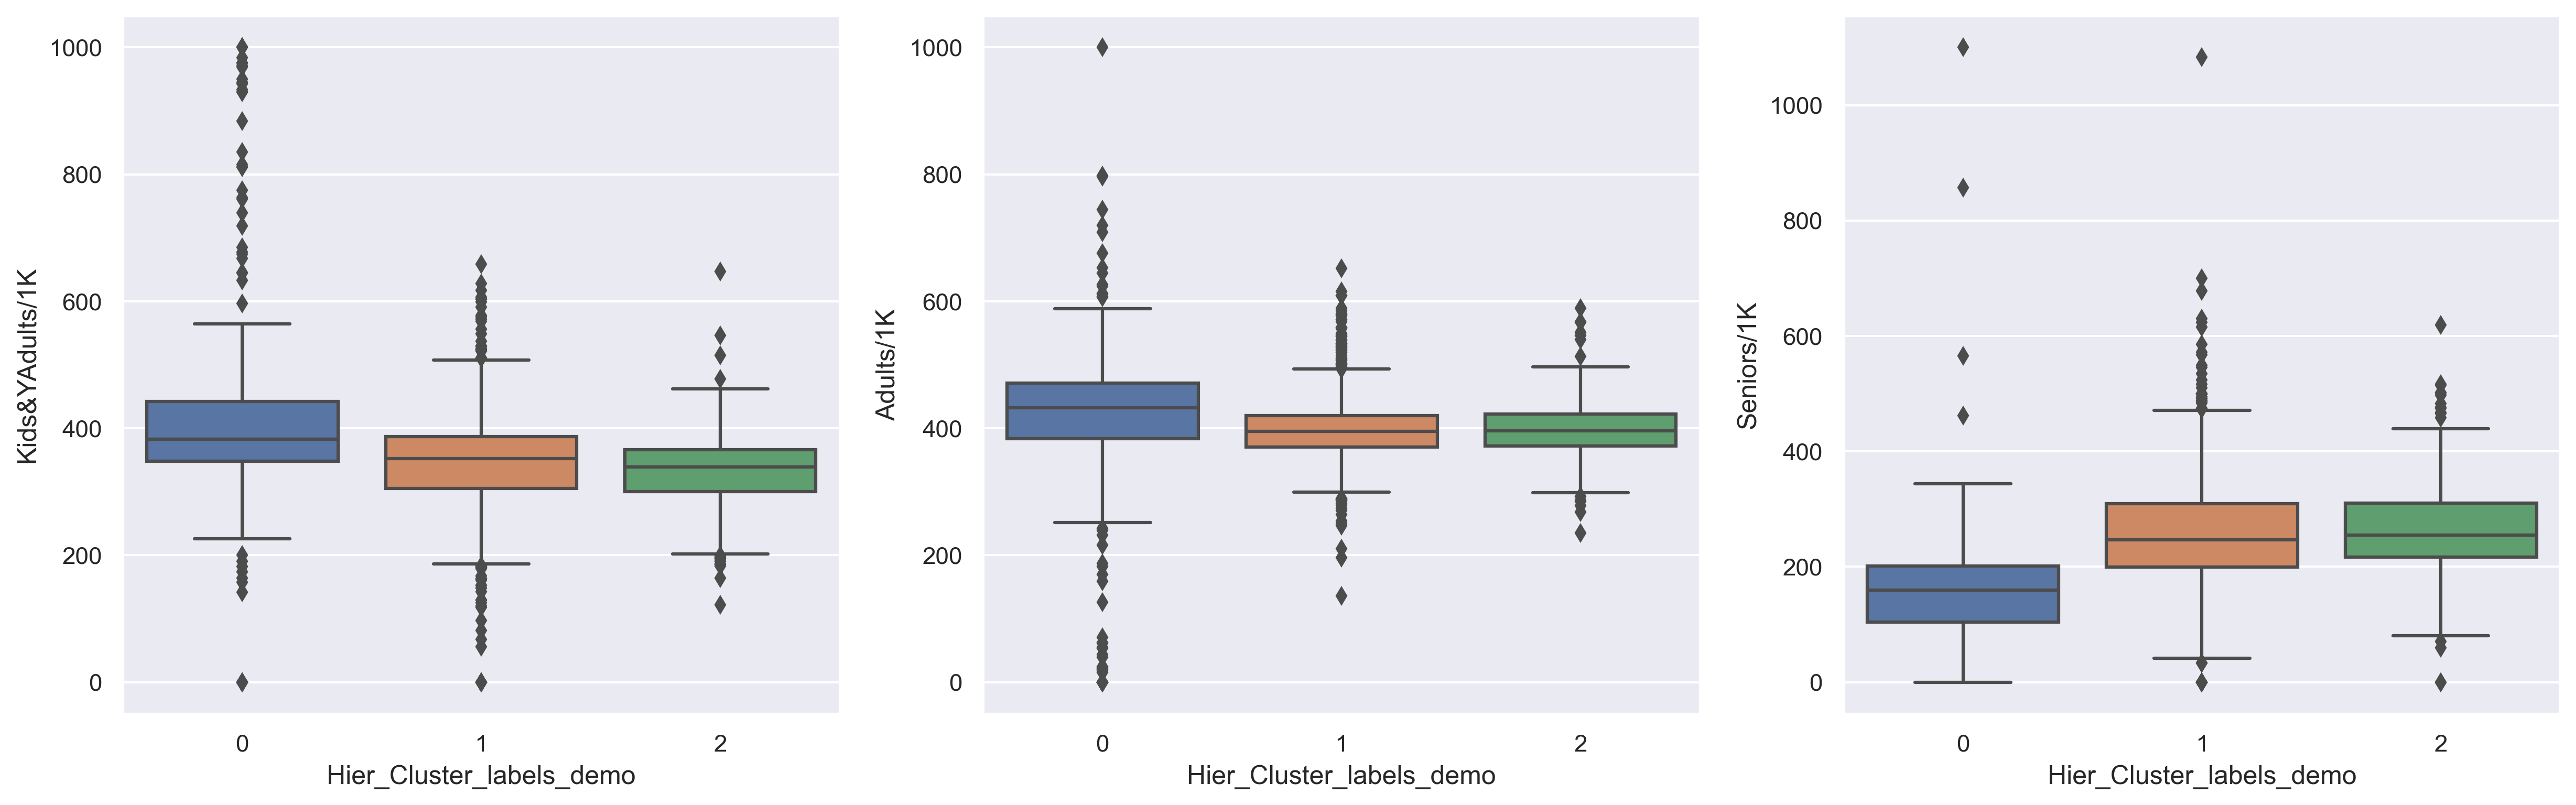

In [89]:
# plotting sub-plots to analyse the results: Age and Gender

plt.figure(figsize=(20,20), dpi=300)


plt.subplot(3,3,1)
sns.boxplot(x='Hier_Cluster_labels_demo', y='Kids&YAdults/1K', data=demo_prop)

plt.subplot(3,3,2)
sns.boxplot(x='Hier_Cluster_labels_demo', y='Adults/1K', data=demo_prop)


plt.subplot(3,3,3)
sns.boxplot(x='Hier_Cluster_labels_demo', y='Seniors/1K', data=demo_prop)



#### Gender

<AxesSubplot:xlabel='Hier_Cluster_labels_demo', ylabel='Female/1K'>

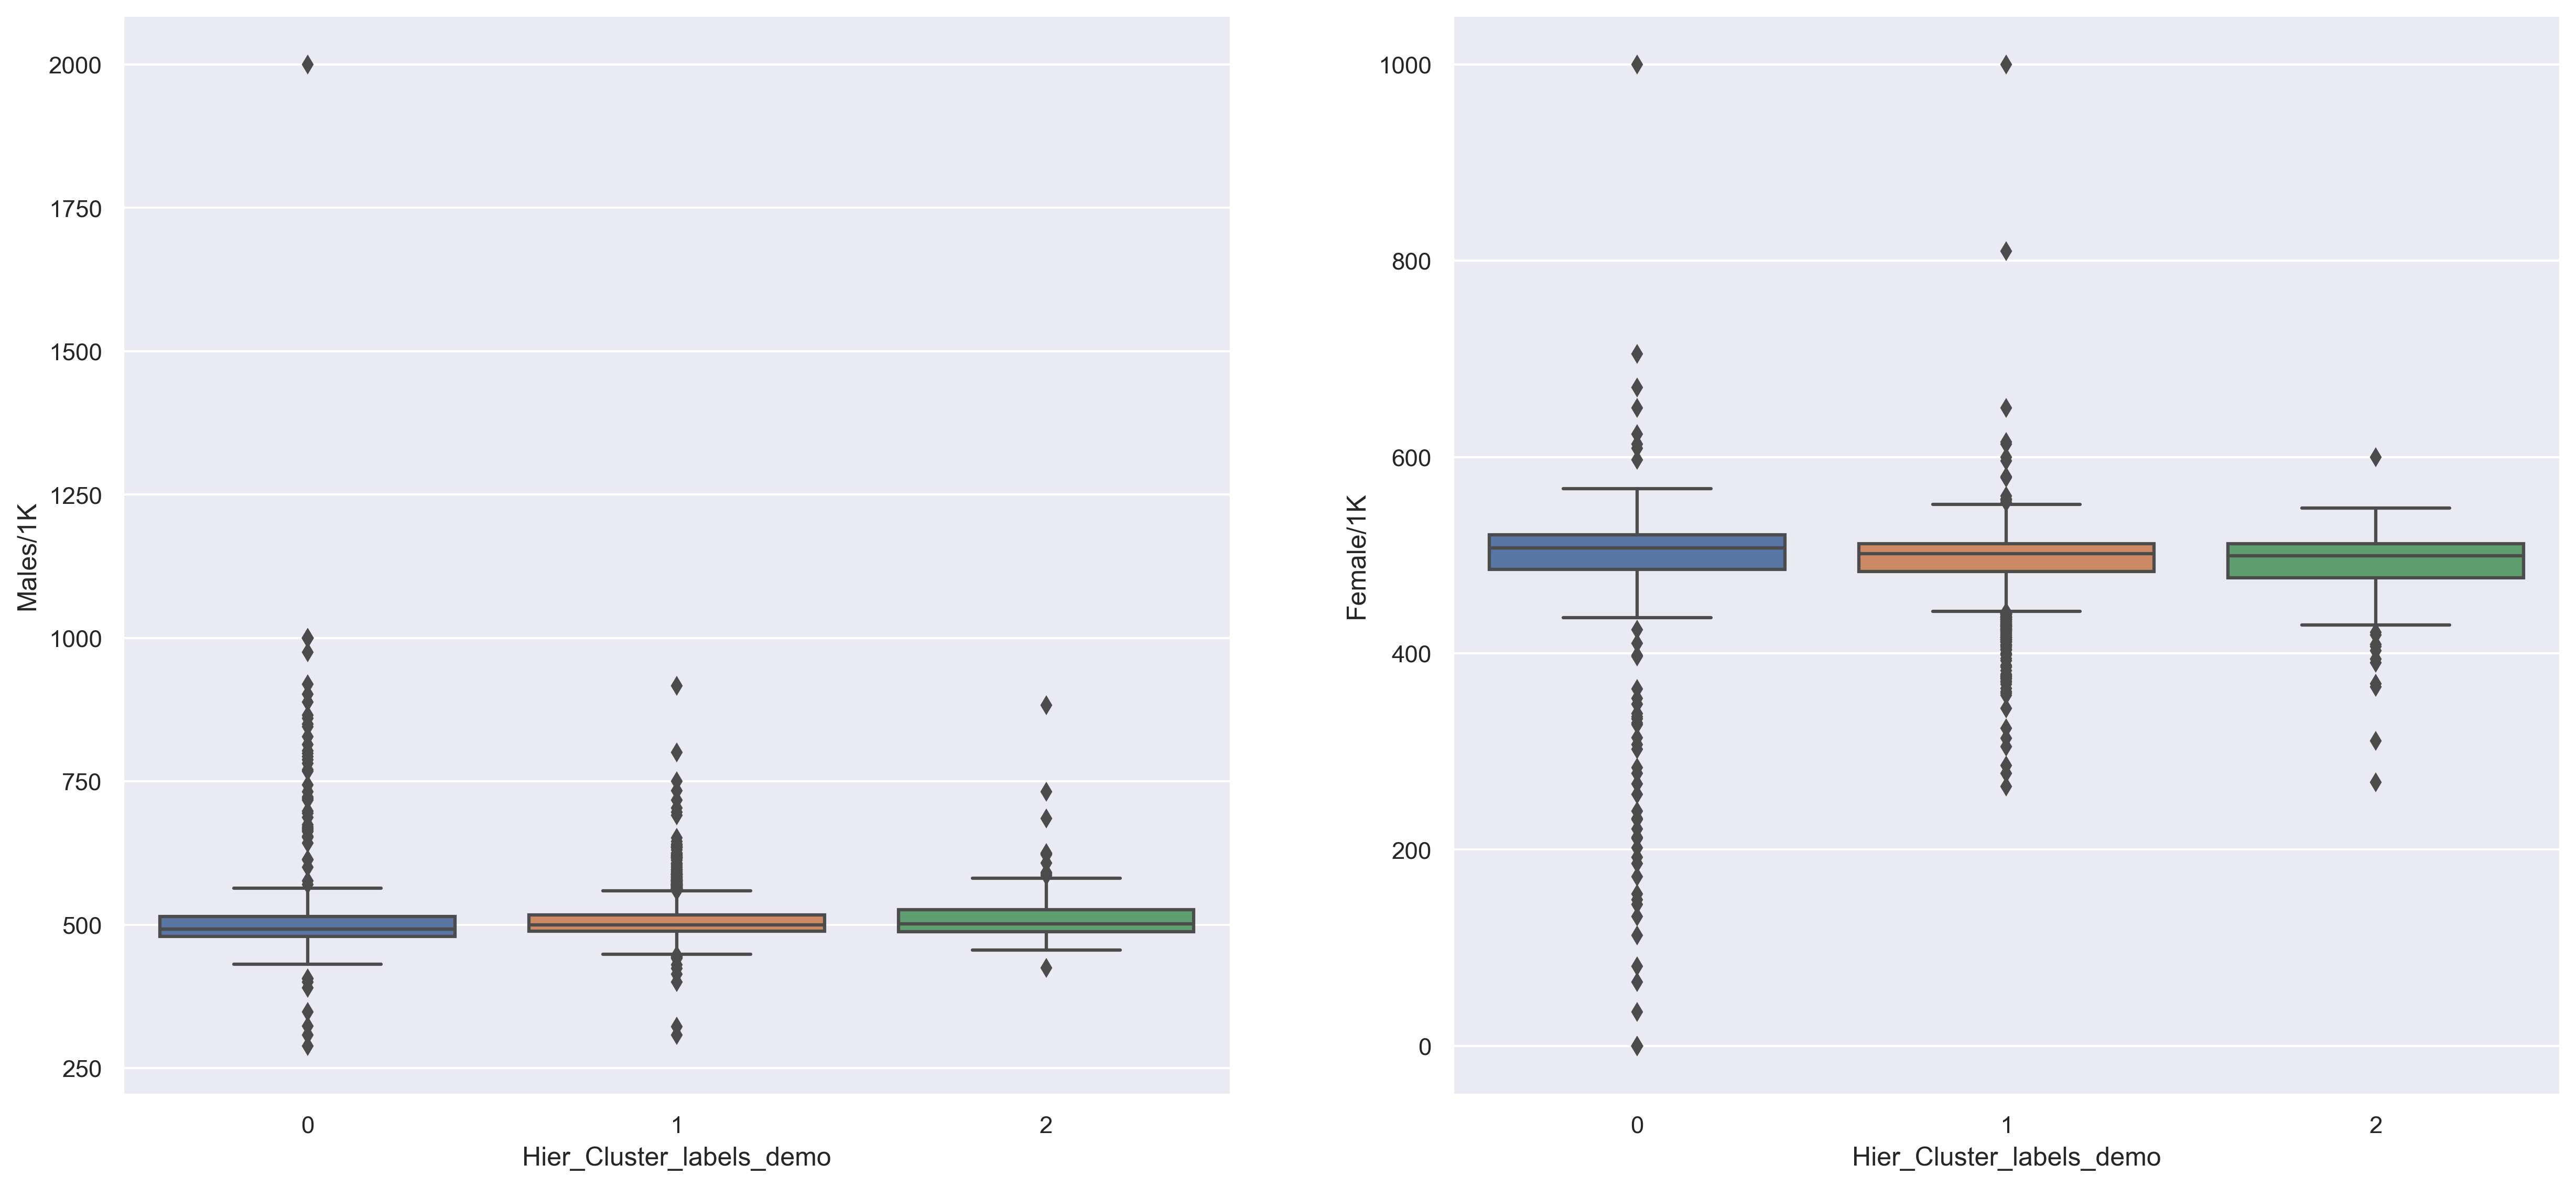

In [90]:
plt.figure(figsize=(20,20), dpi=300)

plt.subplot(2,2,1)
sns.boxplot(x='Hier_Cluster_labels_demo', y='Males/1K', data=demo_prop)


plt.subplot(2,2,2)
sns.boxplot(x='Hier_Cluster_labels_demo', y='Female/1K', data=demo_prop)

#### Religion

<AxesSubplot:xlabel='Hier_Cluster_labels_demo', ylabel='NotStated/Described/1K'>

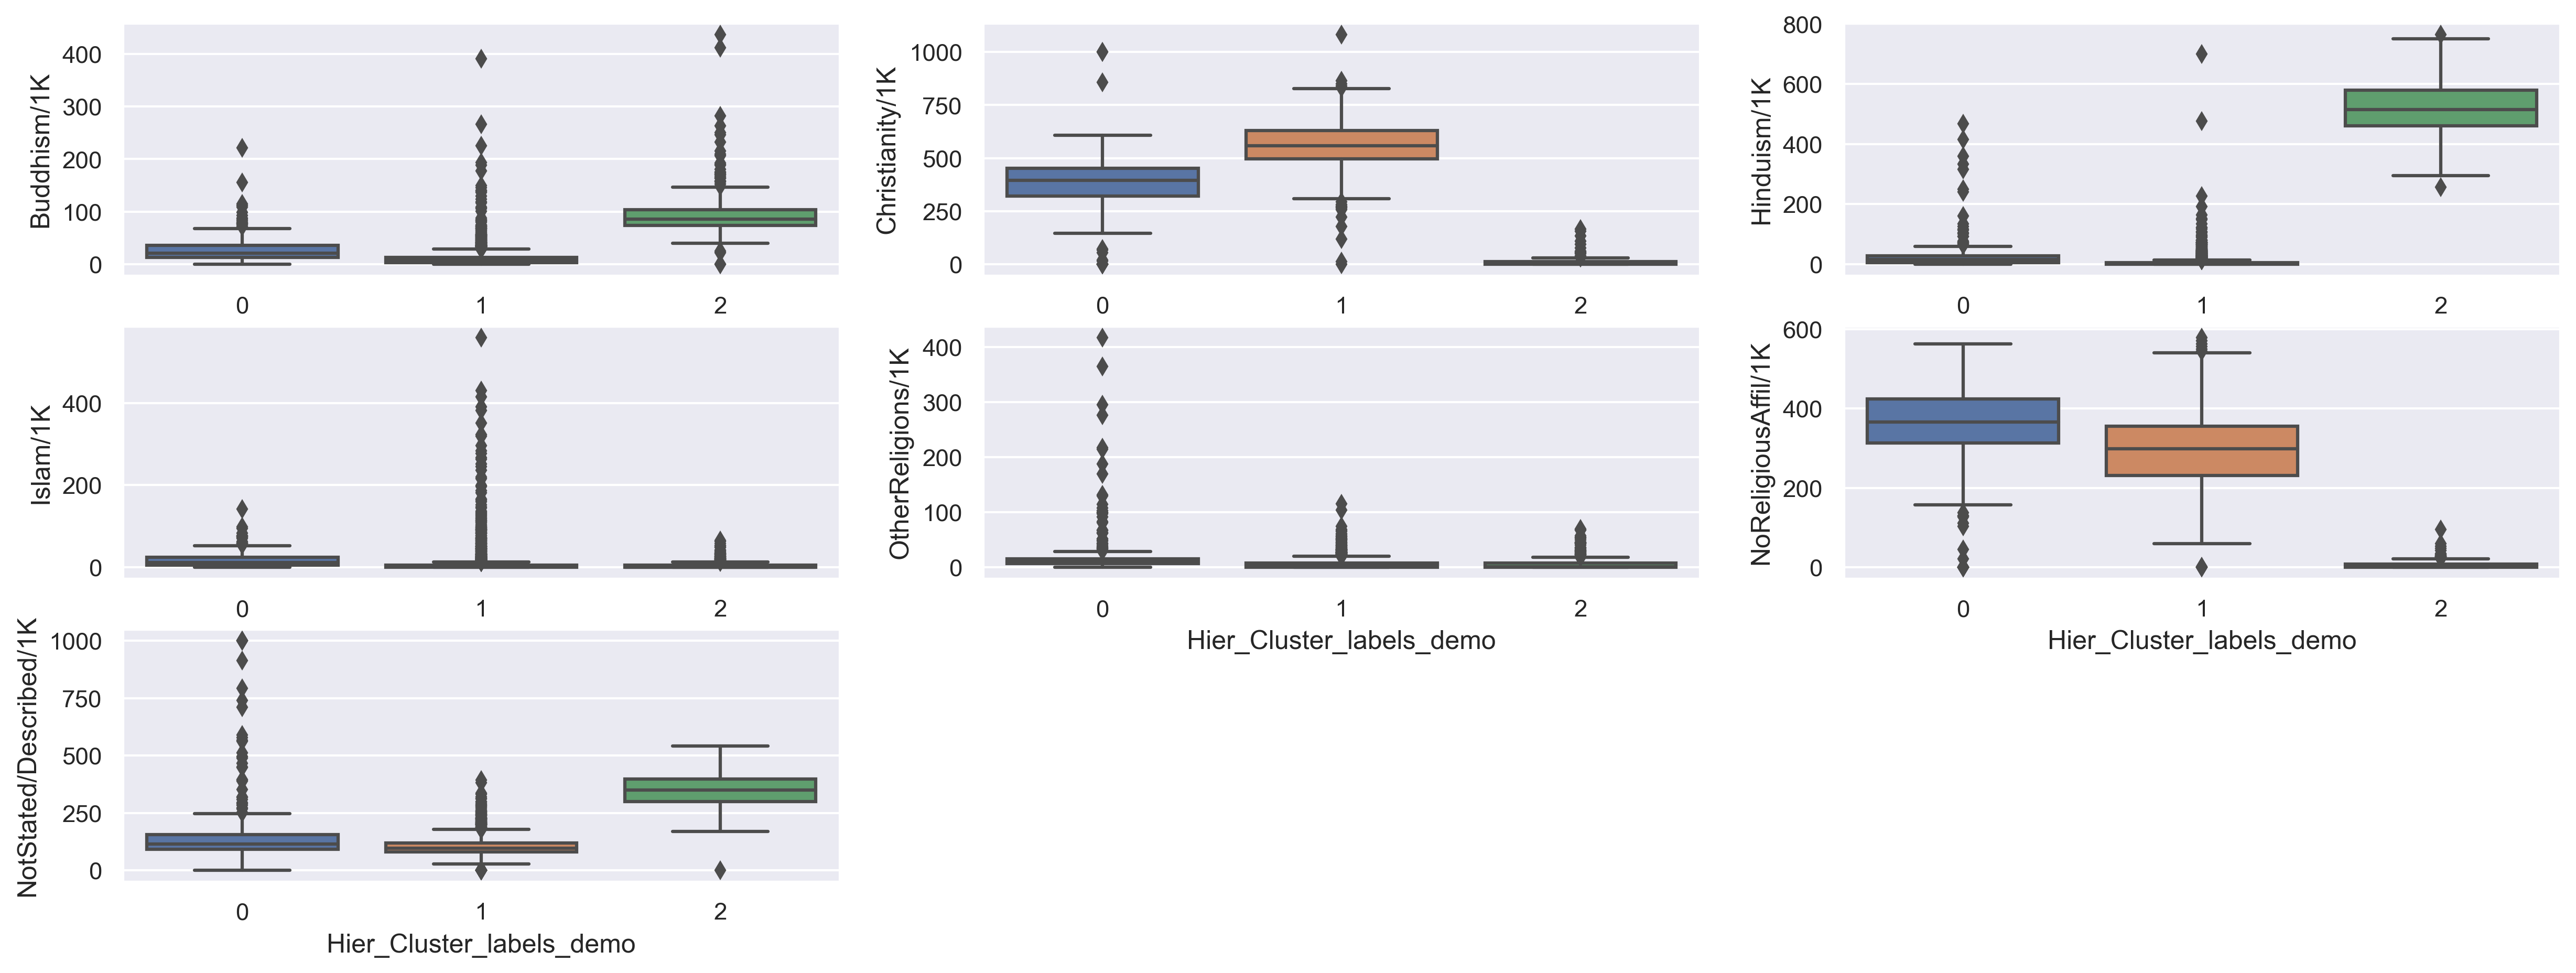

In [91]:
# plotting sub-plots to analyse the results: Age and Gender

plt.figure(figsize=(20,20), dpi=300)


plt.subplot(8,3,1)
sns.boxplot(x='Hier_Cluster_labels_demo', y='Buddhism/1K', data=demo_prop)

plt.subplot(8,3,2)
sns.boxplot(x='Hier_Cluster_labels_demo', y='Christianity/1K', data=demo_prop)


plt.subplot(8,3,3)
sns.boxplot(x='Hier_Cluster_labels_demo', y='Hinduism/1K', data=demo_prop)

plt.subplot(8,3,4)
sns.boxplot(x='Hier_Cluster_labels_demo', y='Islam/1K', data=demo_prop)

plt.subplot(8,3,5)
sns.boxplot(x='Hier_Cluster_labels_demo', y='OtherReligions/1K', data=demo_prop)

plt.subplot(8,3,6)
sns.boxplot(x='Hier_Cluster_labels_demo', y='NoReligiousAffil/1K', data=demo_prop)

plt.subplot(8,3,7)
sns.boxplot(x='Hier_Cluster_labels_demo', y='NotStated/Described/1K', data=demo_prop)

#### Marital Status

<AxesSubplot:xlabel='Hier_Cluster_labels_demo', ylabel='NotAppMar/1K'>

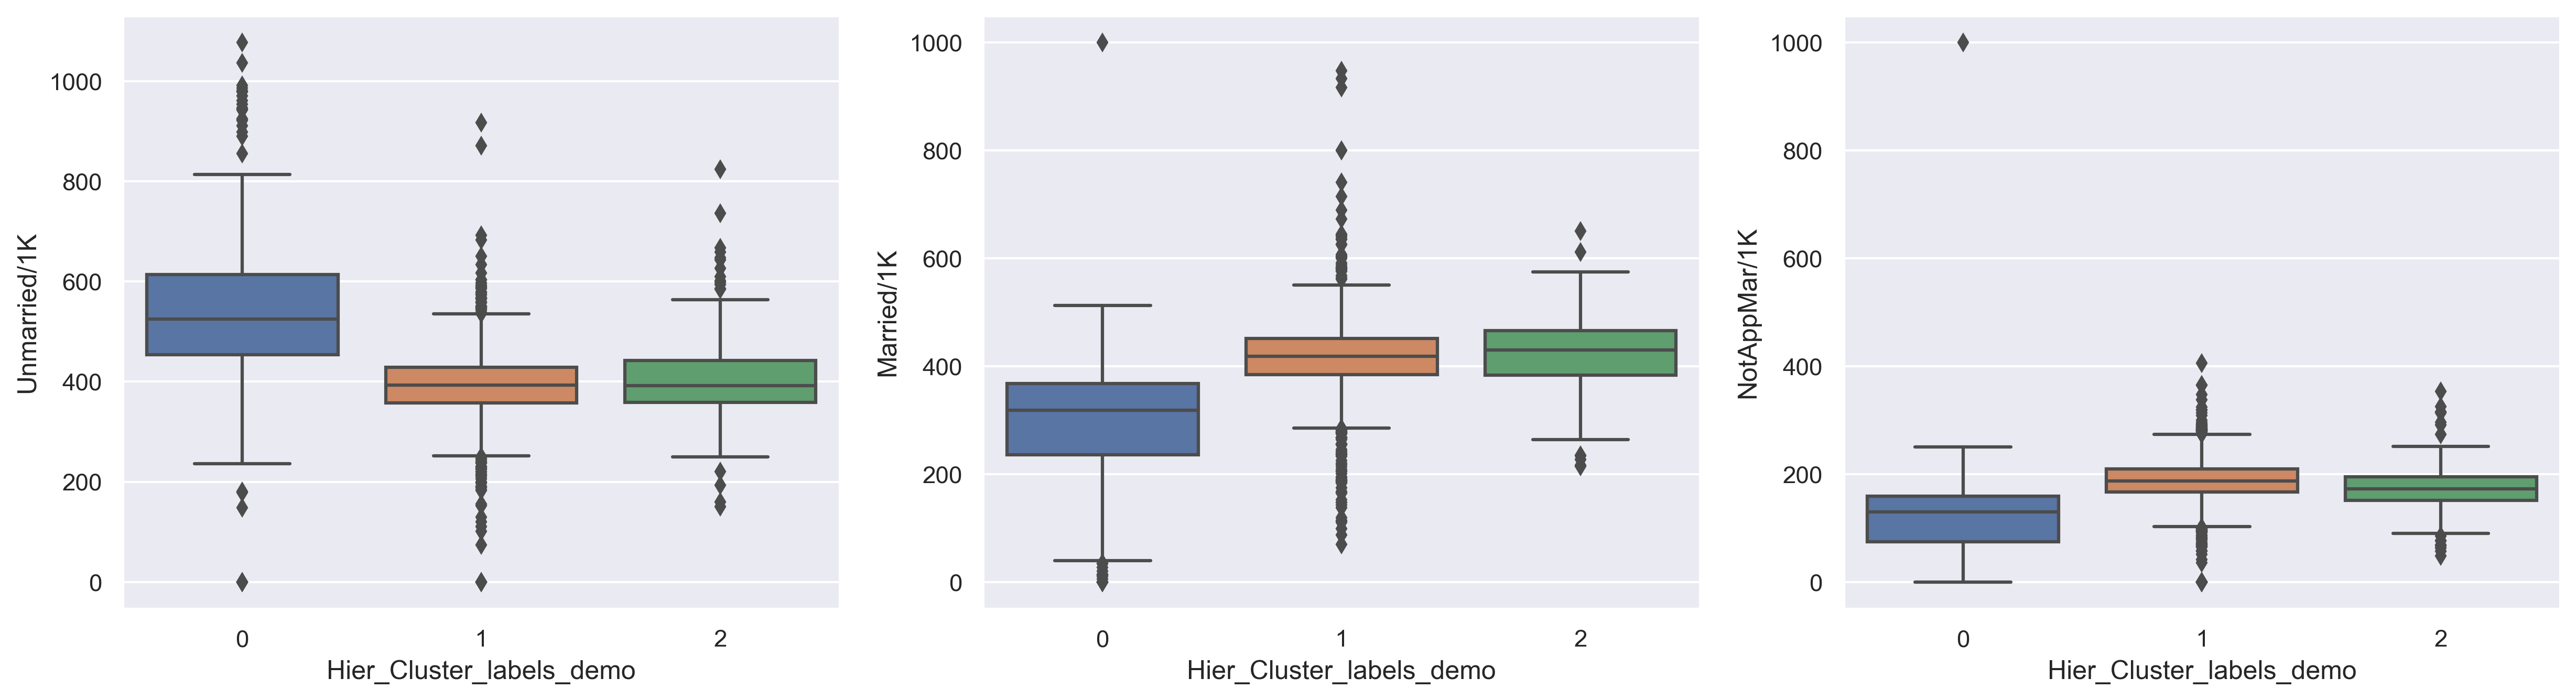

In [92]:
plt.figure(figsize=(20,5), dpi=300)

plt.subplot(1,3,1)
sns.boxplot(x='Hier_Cluster_labels_demo', y='Unmarried/1K', data=demo_prop)


plt.subplot(1,3,2)
sns.boxplot(x='Hier_Cluster_labels_demo', y='Married/1K', data=demo_prop)

plt.subplot(1,3,3)
sns.boxplot(x='Hier_Cluster_labels_demo', y='NotAppMar/1K', data=demo_prop)

#### Income

<AxesSubplot:xlabel='Hier_Cluster_labels_demo', ylabel='HighIncome/1K'>

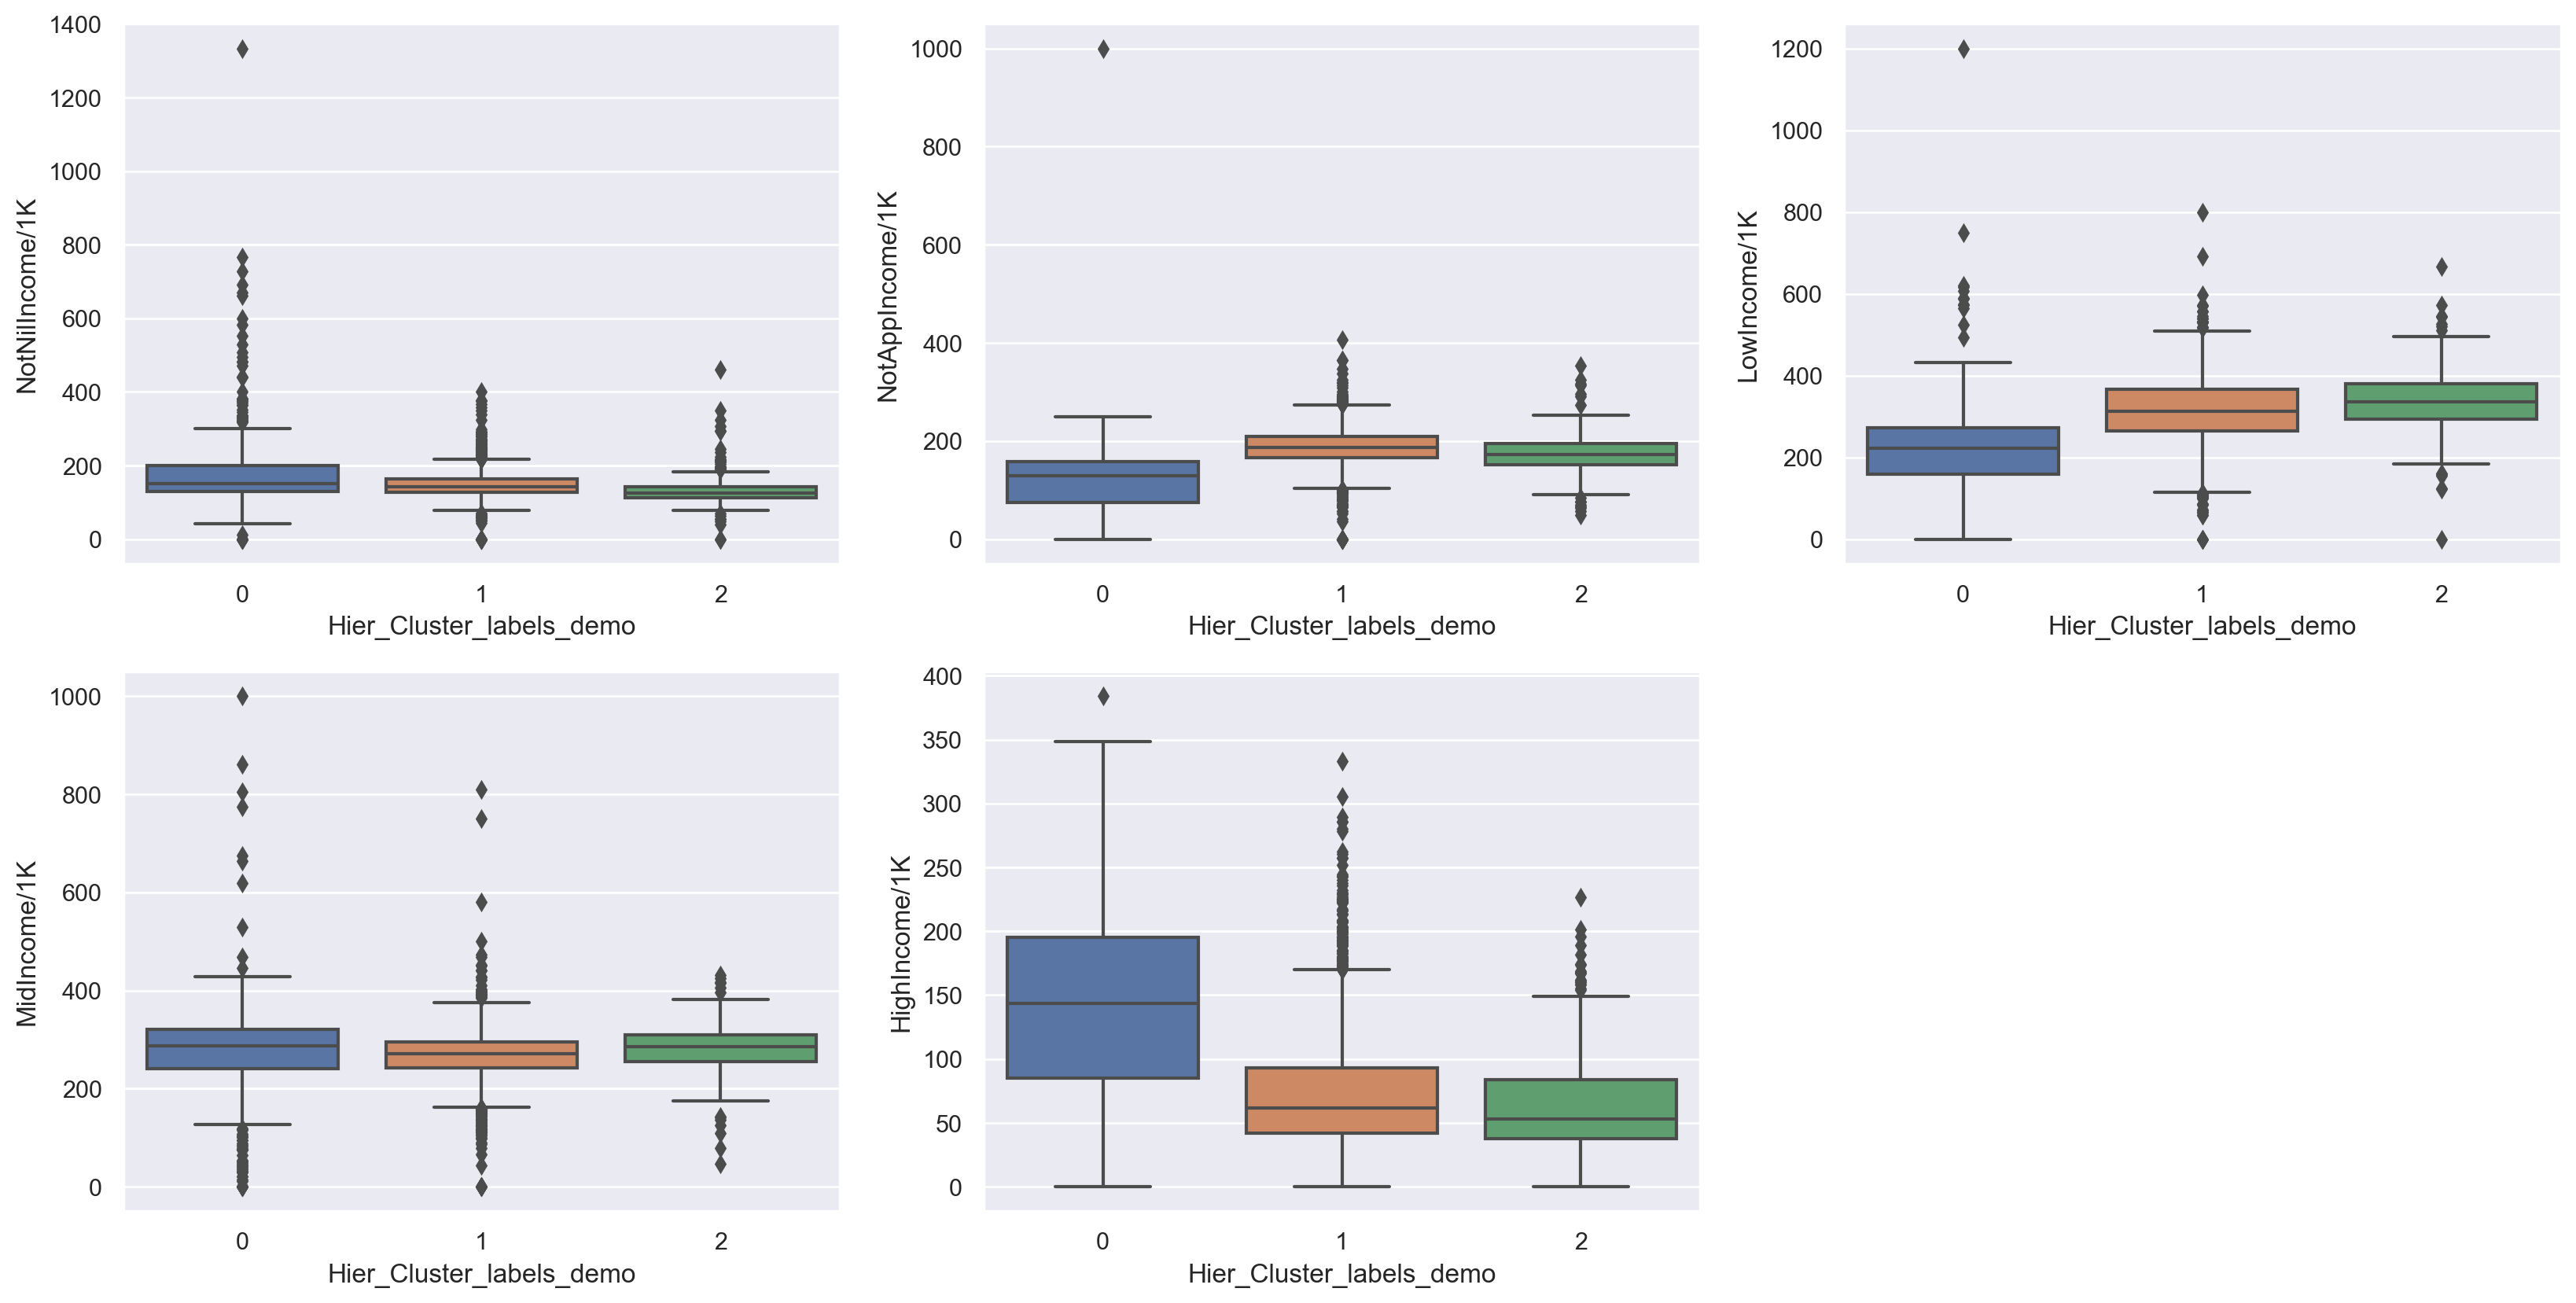

In [93]:
plt.figure(figsize=(20,10), dpi=200)

plt.subplot(2,3,1)
sns.boxplot(x = 'Hier_Cluster_labels_demo', y= 'NotNilIncome/1K', data = demo_prop)

plt.subplot(2,3,2)
sns.boxplot(x = 'Hier_Cluster_labels_demo', y= 'NotAppIncome/1K', data = demo_prop)

plt.subplot(2,3,3)
sns.boxplot(x = 'Hier_Cluster_labels_demo', y ='LowIncome/1K', data = demo_prop)

plt.subplot(2,3,4)
sns.boxplot(x = 'Hier_Cluster_labels_demo', y = 'MidIncome/1K', data = demo_prop)

plt.subplot(2,3,5)
sns.boxplot(x = 'Hier_Cluster_labels_demo', y= 'HighIncome/1K', data = demo_prop)


#### Rent

<AxesSubplot:xlabel='Hier_Cluster_labels_demo', ylabel='VeryHighRent/1K'>

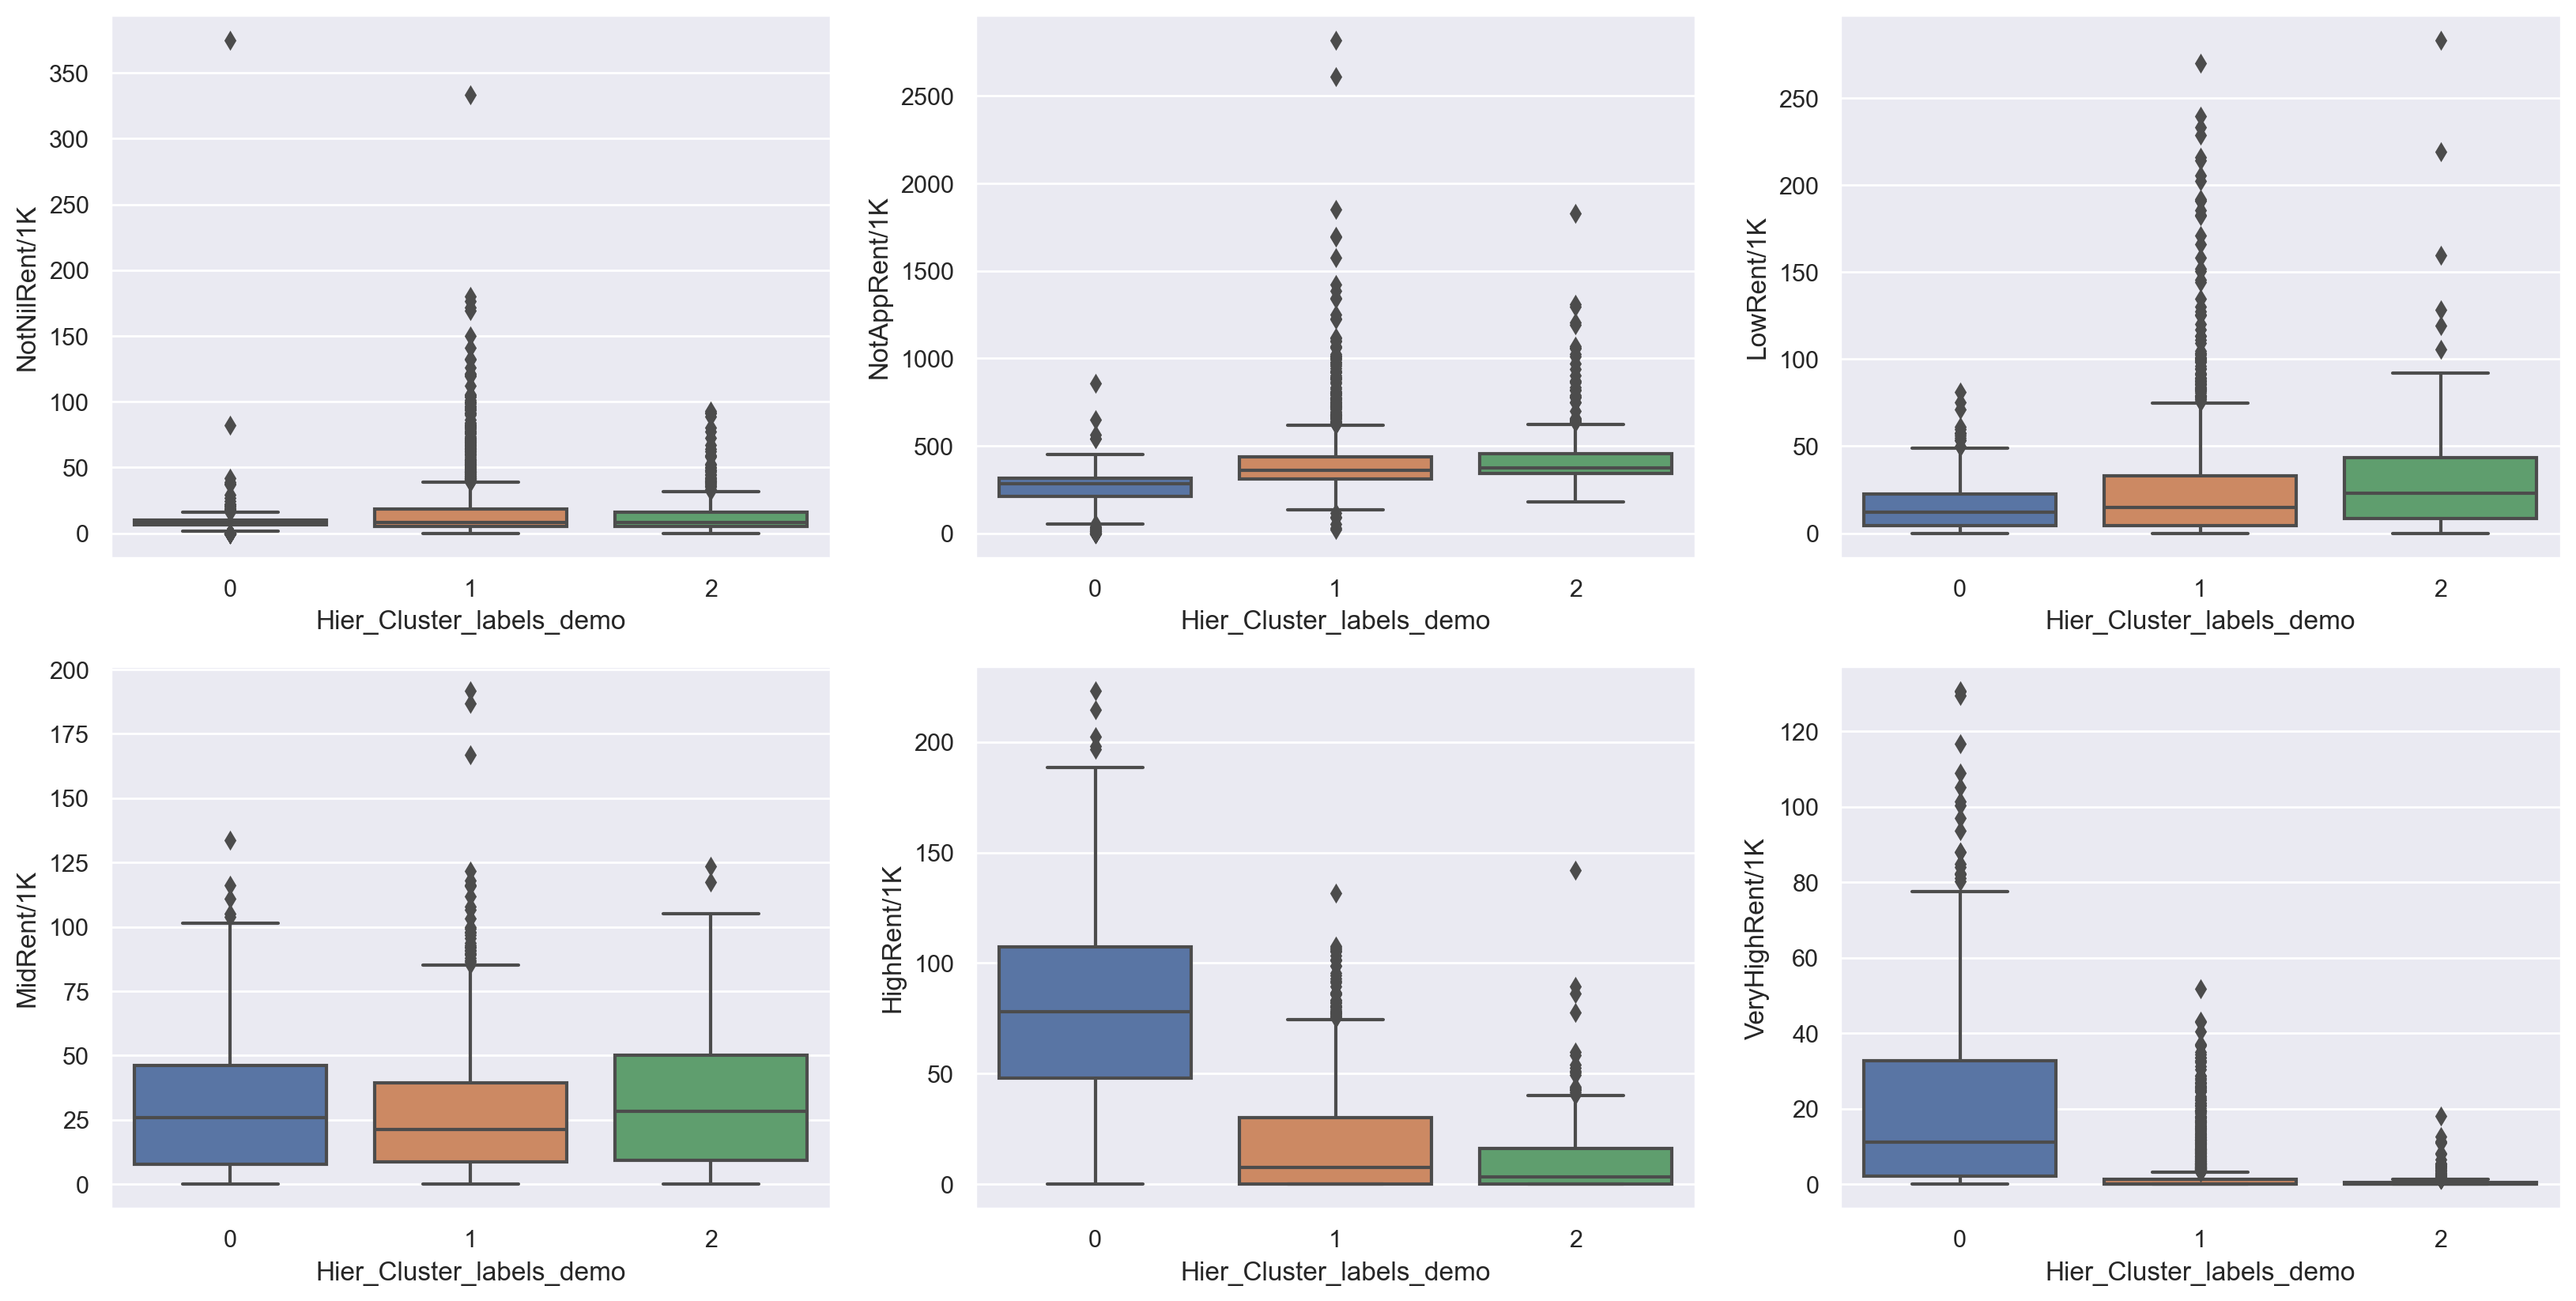

In [94]:
plt.figure(figsize=(20,10), dpi=200)

plt.subplot(2,3,1)
sns.boxplot(x = 'Hier_Cluster_labels_demo', y='NotNilRent/1K', data = demo_prop)

plt.subplot(2,3,2)
sns.boxplot(x = 'Hier_Cluster_labels_demo', y='NotAppRent/1K', data = demo_prop)

plt.subplot(2,3,3)
sns.boxplot(x = 'Hier_Cluster_labels_demo', y= 'LowRent/1K', data = demo_prop)

plt.subplot(2,3,4)
sns.boxplot(x = 'Hier_Cluster_labels_demo', y = 'MidRent/1K', data = demo_prop)

plt.subplot(2,3,5)
sns.boxplot(x = 'Hier_Cluster_labels_demo', y = 'HighRent/1K', data = demo_prop)

plt.subplot(2,3,6)
sns.boxplot(x = 'Hier_Cluster_labels_demo', y ='VeryHighRent/1K', data = demo_prop)

In [95]:
demo_prop['Remote'] = demo_df2['Remote']

In [96]:
demo_prop.head()

Postcode  Kids&YAdults/1K   Adults/1K  Seniors/1K    Males/1K   Female/1K  \
0       800       400.958713  504.406989   95.871347  561.156641  438.379465   
1       810       413.398595  443.546934  143.234641  503.753528  496.366585   
2       812       413.139073  438.198675  148.344371  500.238411  499.549669   
3       815       811.188811  181.818182   24.475524  667.832168  363.636364   
4       820       392.308088  467.838963  139.801532  524.705640  475.551442   

   Buddhism/1K  Christianity/1K  Hinduism/1K   Islam/1K  ...  MidIncome/1K  \
0    42.368950       344.209061    45.616205  14.535333  ...    356.734189   
1    34.292235       453.246051    41.619122  25.193682  ...    313.764939   
2    36.662252       498.225166    13.086093  16.847682  ...    320.635762   
3    34.965035       167.832168   104.895105  69.930070  ...     52.447552   
4    26.685177       444.033112    21.903440  13.368297  ...    330.248342   

   HighIncome/1K  NotNilRent/1K  NotAppRent/1K  LowRent/1K  MidRent/1K  \
0     218.648523      37.111489     281.119530    6.958404   40.822638   
1     141.222749       8.047565     250.045042   17.836767   38.195904   
2     125.615894       6.887417     271.258278   21.298013   13.139073   
3      31.468531       0.000000       0.000000    0.000000    0.000000   
4     210.139339      21.800607     274.358579   16.864620   30.387166   

   HighRent/1K  VeryHighRent/1K  Hier_Cluster_labels_demo  Remote  
0   134.683779        65.099737                         0       0  
1    69.305147        14.683803                         1       0  
2    63.152318         6.993377                         1       0  
3     0.000000         0.000000                         0       0  
4    99.542393        39.282225                         0       0  

[5 rows x 29 columns]

[Text(0, 0, '0'), Text(1, 0, '1')]

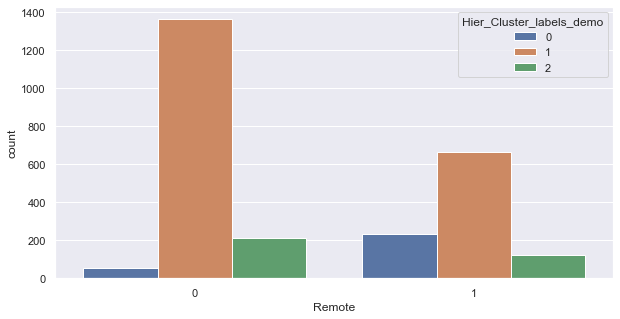

In [97]:
sns.set(rc={"figure.figsize":(10, 5)})
RemoteStatus = sns.countplot(x= 'Remote', hue ='Hier_Cluster_labels_demo', data= demo_prop)
RemoteStatus.set_xticklabels(RemoteStatus.get_xticklabels())

Here we can see that the clustering results remain the same and we can suggest that the Australian suburbs can be divided into three groups. One groups that contains suburbs with high business income, expense and rent expense and one with high income, tax payments, tax deductions, super account balance and rent income and Other with religion that contains suburbs Buddhism	Christianity,	Hinduism,	Islam, OtherReligions.

Since we were interested a separate outliers cluster would look like, we conducted hierarchical clustering with 3 clusters


# NSW Postcode Most Similar to Victoria

In [190]:
demo_prop.head()

Postcode  Kids&YAdults/1K   Adults/1K  Seniors/1K    Males/1K   Female/1K  \
0       800       400.958713  504.406989   95.871347  561.156641  438.379465   
1       810       413.398595  443.546934  143.234641  503.753528  496.366585   
2       812       413.139073  438.198675  148.344371  500.238411  499.549669   
3       815       811.188811  181.818182   24.475524  667.832168  363.636364   
4       820       392.308088  467.838963  139.801532  524.705640  475.551442   

   Buddhism/1K  Christianity/1K  Hinduism/1K   Islam/1K  ...  MidIncome/1K  \
0    42.368950       344.209061    45.616205  14.535333  ...    356.734189   
1    34.292235       453.246051    41.619122  25.193682  ...    313.764939   
2    36.662252       498.225166    13.086093  16.847682  ...    320.635762   
3    34.965035       167.832168   104.895105  69.930070  ...     52.447552   
4    26.685177       444.033112    21.903440  13.368297  ...    330.248342   

   HighIncome/1K  NotNilRent/1K  NotAppRent/1K  LowRent/1K  MidRent/1K  \
0     218.648523      37.111489     281.119530    6.958404   40.822638   
1     141.222749       8.047565     250.045042   17.836767   38.195904   
2     125.615894       6.887417     271.258278   21.298013   13.139073   
3      31.468531       0.000000       0.000000    0.000000    0.000000   
4     210.139339      21.800607     274.358579   16.864620   30.387166   

   HighRent/1K  VeryHighRent/1K  Hier_Cluster_labels_demo  Remote  
0   134.683779        65.099737                         0       0  
1    69.305147        14.683803                         1       0  
2    63.152318         6.993377                         1       0  
3     0.000000         0.000000                         0       0  
4    99.542393        39.282225                         0       0  

[5 rows x 29 columns]

To assess most similar postcode in two different states, we will first make individual dataframes for each State. 

In [191]:
#making individual dataframes for each State

ACT_demo = demo_prop[((demo_prop['Postcode'] > 2599) &(demo_prop['Postcode'] < 2618))| ((demo_prop['Postcode'] > 2899) &(demo_prop['Postcode'] < 2921))]
NSW_ACT_demo = demo_prop[(demo_prop['Postcode'] > 1999) &(demo_prop['Postcode'] < 3000)] #consists of both NSW and ACT postcodes
VIC_demo = demo_prop[(demo_prop['Postcode'] > 2999) &(demo_prop['Postcode'] < 4000)]
NT_demo = demo_prop[(demo_prop['Postcode'] > 799) &(demo_prop['Postcode'] < 900)]
TAS_demo = demo_prop[(demo_prop['Postcode'] > 6999) &(demo_prop['Postcode'] < 8000)]
WA_demo = demo_prop[(demo_prop['Postcode'] > 5999) &(demo_prop['Postcode'] < 7000)]
SA_demo = demo_prop[(demo_prop['Postcode'] > 4999) &(demo_prop['Postcode'] < 6000)]
QLD_demo = demo_prop[(demo_prop['Postcode'] > 3999) &(demo_prop['Postcode'] < 5000)]

In [192]:
#Removing ACT poscodes from NSW+ACT dataset 

NSW_demo1 = NSW_ACT_demo[(NSW_ACT_demo.Postcode < 2600) | (NSW_ACT_demo.Postcode > 2618)]
NSW_demo = NSW_demo1[(NSW_demo1.Postcode < 2900) | (NSW_demo1.Postcode > 2920)]
NSW_demo

Postcode  Kids&YAdults/1K   Adults/1K  Seniors/1K    Males/1K  \
34       2000       477.654956  431.870417   90.657035  504.067710   
35       2006       945.281523   39.651071    7.930214  430.610626   
36       2007       632.602306  306.918381   60.592358  480.782274   
37       2008       644.637978  308.145492   47.814208  480.020492   
38       2009       361.976118  503.004761  135.097167  506.048544   
..        ...              ...         ...         ...         ...   
646      2877       400.515464  352.319588  247.164948  500.000000   
647      2878       350.404313  439.353100  202.156334  582.210243   
648      2879       325.471698  375.786164  286.163522  550.314465   
649      2880       337.765375  374.972642  286.331801  488.947253   
650      2898       267.716535  480.314961  265.091864  498.687664   

      Female/1K  Buddhism/1K  Christianity/1K  Hinduism/1K   Islam/1K  ...  \
34   496.041735   221.553391       237.459414    26.485717  15.577688  ...   
35   567.803331     6.344171       423.473434     4.758128   3.965107  ...   
36   518.652498   111.123672       174.429121    22.948225  24.191725  ...   
37   519.979508    85.297131       181.523224    16.222678  18.869536  ...   
38   493.717318    65.558417       350.503395    28.096465  14.126278  ...   
..          ...          ...              ...          ...        ...  ...   
646  500.773196     2.577320       696.391753     5.154639   0.773196  ...   
647  420.485175     0.000000       512.129380     0.000000   0.000000  ...   
648  460.691824     0.000000       435.534591     0.000000   0.000000  ...   
649  511.216896     5.252791       532.282775     2.462246   2.243379  ...   
650  498.687664     0.000000       485.564304     0.000000   0.000000  ...   

     MidIncome/1K  HighIncome/1K  NotNilRent/1K  NotAppRent/1K  LowRent/1K  \
34     252.380431     143.336617      20.174383     274.561308    4.779103   
35      29.341792      14.274385       3.172086      14.274385    0.000000   
36     213.316753      81.166629      13.452408     179.063984   17.635089   
37     264.685792     115.437158      12.807377     193.647541   15.112705   
38     302.505268     250.136580      14.906735     244.205104   18.496839   
..            ...            ...            ...            ...         ...   
646    245.360825      49.484536      22.164948     357.216495   59.793814   
647    223.719677      70.080863      32.345013     442.048518   51.212938   
648    155.660377      45.597484      22.012579     575.471698   95.911950   
649    237.360473      72.116437      10.669731     445.830598   44.812869   
650    372.703412      73.490814      44.619423     454.068241   39.370079   

     MidRent/1K  HighRent/1K  VeryHighRent/1K  Hier_Cluster_labels_demo  \
34     5.362811    69.388202       130.713947                         0   
35     0.000000     0.000000         0.000000                         0   
36    19.669907   118.132489        68.505539                         0   
37    22.455601   150.443989        84.955601                         0   
38    16.389604    78.904238       130.648560                         0   
..          ...          ...              ...                       ...   
646   37.113402     1.030928         0.000000                         1   
647    0.000000     0.000000         0.000000                         1   
648   23.584906     0.000000         0.000000                         1   
649   38.028015     3.994309         0.984898                         1   
650   41.994751     0.000000         0.000000                         1   

     Remote  
34        1  
35        1  
36        1  
37        1  
38        1  
..      ...  
646       0  
647       0  
648       0  
649       0  
650       0  

[617 rows x 29 columns]

In [193]:
#setting index of each state dataframe as Postcode 

NSW_demo.set_index('Postcode', inplace=True)
VIC_demo.set_index('Postcode', inplace=True)
ACT_demo.set_index('Postcode', inplace=True)
WA_demo.set_index('Postcode', inplace=True)
SA_demo.set_index('Postcode', inplace=True)
NT_demo.set_index('Postcode', inplace=True)
TAS_demo.set_index('Postcode', inplace=True)
QLD_demo.set_index('Postcode', inplace=True)

Now, we shall be calculating the euclidean distance between the values of each row of two dataframes to find  a postcode each from passed state dataframes that have the least amount of distance. 

In [194]:
# Function to find two most similar postcodes in two different postcode

df1_post = pd.DataFrame()
df2_post = pd.DataFrame()

def findSamePost(df1, df2):
    
    ary_1 = scipy.spatial.distance.cdist(df1, df2, metric='euclidean')
    df1_post = df1[ary_1 ==ary_1 .min()]
    
    ary_2 = scipy.spatial.distance.cdist(df2, df1, metric='euclidean')
    df2_post = df2[ary_2 ==ary_2 .min()]
    
    df1_post = df1_post.reset_index()
    df2_post = df2_post.reset_index()
    
    Postcode1 = df1_post['Postcode']
    Postcode2 = df2_post['Postcode']

    return Postcode1, Postcode2


In [197]:
results = findSamePost(NSW_demo, VIC_demo)
print("The two most Similar Suburbs are:" + str(results))

The two most Similar Suburbs are:(0    2550
Name: Postcode, dtype: int64, 0    3241
Name: Postcode, dtype: int64)


In [104]:
#resetting the index to ensure that Postcode is a column of the demo_prop dataframe

demo_prop = demo_prop.reset_index()
demo_prop = demo_prop.drop(columns = 'index')

In [105]:
demo_prop.head()

Postcode  Kids&YAdults/1K   Adults/1K  Seniors/1K    Males/1K   Female/1K  \
0       800       400.958713  504.406989   95.871347  561.156641  438.379465   
1       810       413.398595  443.546934  143.234641  503.753528  496.366585   
2       812       413.139073  438.198675  148.344371  500.238411  499.549669   
3       815       811.188811  181.818182   24.475524  667.832168  363.636364   
4       820       392.308088  467.838963  139.801532  524.705640  475.551442   

   Buddhism/1K  Christianity/1K  Hinduism/1K   Islam/1K  ...  MidIncome/1K  \
0    42.368950       344.209061    45.616205  14.535333  ...    356.734189   
1    34.292235       453.246051    41.619122  25.193682  ...    313.764939   
2    36.662252       498.225166    13.086093  16.847682  ...    320.635762   
3    34.965035       167.832168   104.895105  69.930070  ...     52.447552   
4    26.685177       444.033112    21.903440  13.368297  ...    330.248342   

   HighIncome/1K  NotNilRent/1K  NotAppRent/1K  LowRent/1K  MidRent/1K  \
0     218.648523      37.111489     281.119530    6.958404   40.822638   
1     141.222749       8.047565     250.045042   17.836767   38.195904   
2     125.615894       6.887417     271.258278   21.298013   13.139073   
3      31.468531       0.000000       0.000000    0.000000    0.000000   
4     210.139339      21.800607     274.358579   16.864620   30.387166   

   HighRent/1K  VeryHighRent/1K  Hier_Cluster_labels_demo  Remote  
0   134.683779        65.099737                         0       0  
1    69.305147        14.683803                         1       0  
2    63.152318         6.993377                         1       0  
3     0.000000         0.000000                         0       0  
4    99.542393        39.282225                         0       0  

[5 rows x 29 columns]

# ATO Data Analysis

## Data Preparation

Here we can see that we have roughly 27 variables. We do not need all these variables to conduct analysis and hence all Count columns can be dropped. For the this analysis, we are opting to use Median values instead of Average as Median is more useful when using Income Data.

https://surveymethods.com/when-is-it-generally-better-to-use-median-over-mean/#:~:text=Median%2C%20on%20the%20other%20hand%2C%20is%20the%2050%25,lot%20of%20analysis%2C%20the%20mean%20is%20very%20useful

In [106]:
income.head()

Postcode  Count taxable income or loss  Average taxable income or loss  \
0      2000                         24207                           68607   
1      2006                            79                           82018   
2      2007                          4879                           47040   
3      2008                          6025                           82162   
4      2009                          9763                           84475   

   Median taxable income or loss  Count salary and wages  \
0                          25828                   20465   
1                          53192                      66   
2                          31049                    4275   
3                          40289                    5372   
4                          52414                    8179   

   Average salary and wages  Median salary and wages  Count net rent  \
0                     52595                    26186            2608   
1                     84414                    69154              20   
2                     47486                    33284             519   
3                     53977                    42505             670   
4                     75281                    56378            1679   

   Average net rent  Median net rent  ...  Median total business income  \
0               492             -420  ...                         22080   
1              4368             4148  ...                         37440   
2             -1026            -1654  ...                         18532   
3                61             -906  ...                         18000   
4             -2595            -1393  ...                         23795   

   Count  total business expenses  Average total business expenses  \
0                            1395                           197860   
1                               3                            41247   
2                             320                           149251   
3                             494                            30197   
4                             673                            93747   

   Median total business expenses  Count net tax  Average net tax  \
0                           14998          14304            35296   
1                           37177             57            32740   
2                            8214           3099            16119   
3                            7579           4244            36981   
4                           10851           7373            32797   

   Median net tax  Count super total accounts balance  \
0            8571                               44616   
1           19577                                 120   
2            9233                                6952   
3           10972                                8081   
4           15451                               12889   

   Average super total accounts balance  Median super total accounts balance  
0                                 88340                                 1219  
1                                 98720                                19776  
2                                 42250                                 4267  
3                                 55885                                 9029  
4                                131020                                19841  

[5 rows x 28 columns]

In [107]:
#Creating a data frame with only the median values
ato = pd.DataFrame(income, columns = ['Postcode','Median taxable income or loss', 'Median salary and wages','Median net rent','Median total income or loss','Median total deductions','Median total business income', 'Median total business expenses', 'Median net tax','Median super total accounts balance'])
ato.head()
ato.shape

(2470, 10)

In [108]:
#Ensuring there are no null values
ato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2470 entries, 0 to 2469
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Postcode                             2470 non-null   int64
 1   Median taxable income or loss        2470 non-null   int64
 2   Median salary and wages              2470 non-null   int64
 3   Median net rent                      2470 non-null   int64
 4   Median total income or loss          2470 non-null   int64
 5   Median total deductions              2470 non-null   int64
 6   Median total business income         2470 non-null   int64
 7   Median total business expenses       2470 non-null   int64
 8   Median net tax                       2470 non-null   int64
 9   Median super total accounts balance  2470 non-null   int64
dtypes: int64(10)
memory usage: 193.1 KB


## Univariate Analysis

In [109]:
#understanding the data summary 
ato.describe()

Postcode  Median taxable income or loss  Median salary and wages  \
count  2470.000000                    2470.000000              2470.000000   
mean   4097.294332                   41958.035223             45817.263563   
std    1496.300821                    8858.756984              9270.405387   
min     800.000000                   13226.000000             11462.000000   
25%    2842.250000                   36423.250000             39958.250000   
50%    3873.500000                   41052.500000             45080.500000   
75%    5165.750000                   46514.250000             50501.500000   
max    7470.000000                  111291.000000            119247.000000   

       Median net rent  Median total income or loss  Median total deductions  \
count      2470.000000                  2470.000000              2470.000000   
mean      -1051.731579                 44349.316599               646.847773   
std        1808.909304                  9213.322116               272.502904   
min      -13830.000000                 13909.000000                 0.000000   
25%       -2063.500000                 38354.500000               465.000000   
50%        -944.000000                 43381.000000               625.000000   
75%         -22.250000                 48881.000000               771.750000   
max       11918.000000                114135.000000              3354.000000   

       Median total business income  Median total business expenses  \
count                  2.470000e+03                    2.470000e+03   
mean                   3.326066e+04                    1.990433e+04   
std                    2.814111e+04                    2.579349e+04   
min                    8.020000e+02                    0.000000e+00   
25%                    2.619975e+04                    1.263000e+04   
50%                    3.040350e+04                    1.596900e+04   
75%                    3.622950e+04                    2.293050e+04   
max                    1.284290e+06                    1.152908e+06   

       Median net tax  Median super total accounts balance  
count     2470.000000                          2470.000000  
mean     10029.780567                         44524.489474  
std       3436.067296                         17166.058391  
min       1416.000000                          1086.000000  
25%       7702.500000                         34867.750000  
50%       9314.000000                         42957.500000  
75%      11645.750000                         52384.000000  
max      38232.000000                        355380.000000

In [110]:
# Checking the percentage of missing values
round(100*(ato.isnull().sum()/len(ato.index)), 2)

Postcode                               0.0
Median taxable income or loss          0.0
Median salary and wages                0.0
Median net rent                        0.0
Median total income or loss            0.0
Median total deductions                0.0
Median total business income           0.0
Median total business expenses         0.0
Median net tax                         0.0
Median super total accounts balance    0.0
dtype: float64

In [111]:
ato.columns

Index(['Postcode', 'Median taxable income or loss', 'Median salary and wages',
       'Median net rent', 'Median total income or loss',
       'Median total deductions', 'Median total business income',
       'Median total business expenses', 'Median net tax',
       'Median super total accounts balance'],
      dtype='object')

We will now use histograms to inspect normality of the data

<AxesSubplot:xlabel='Median super total accounts balance', ylabel='Count'>

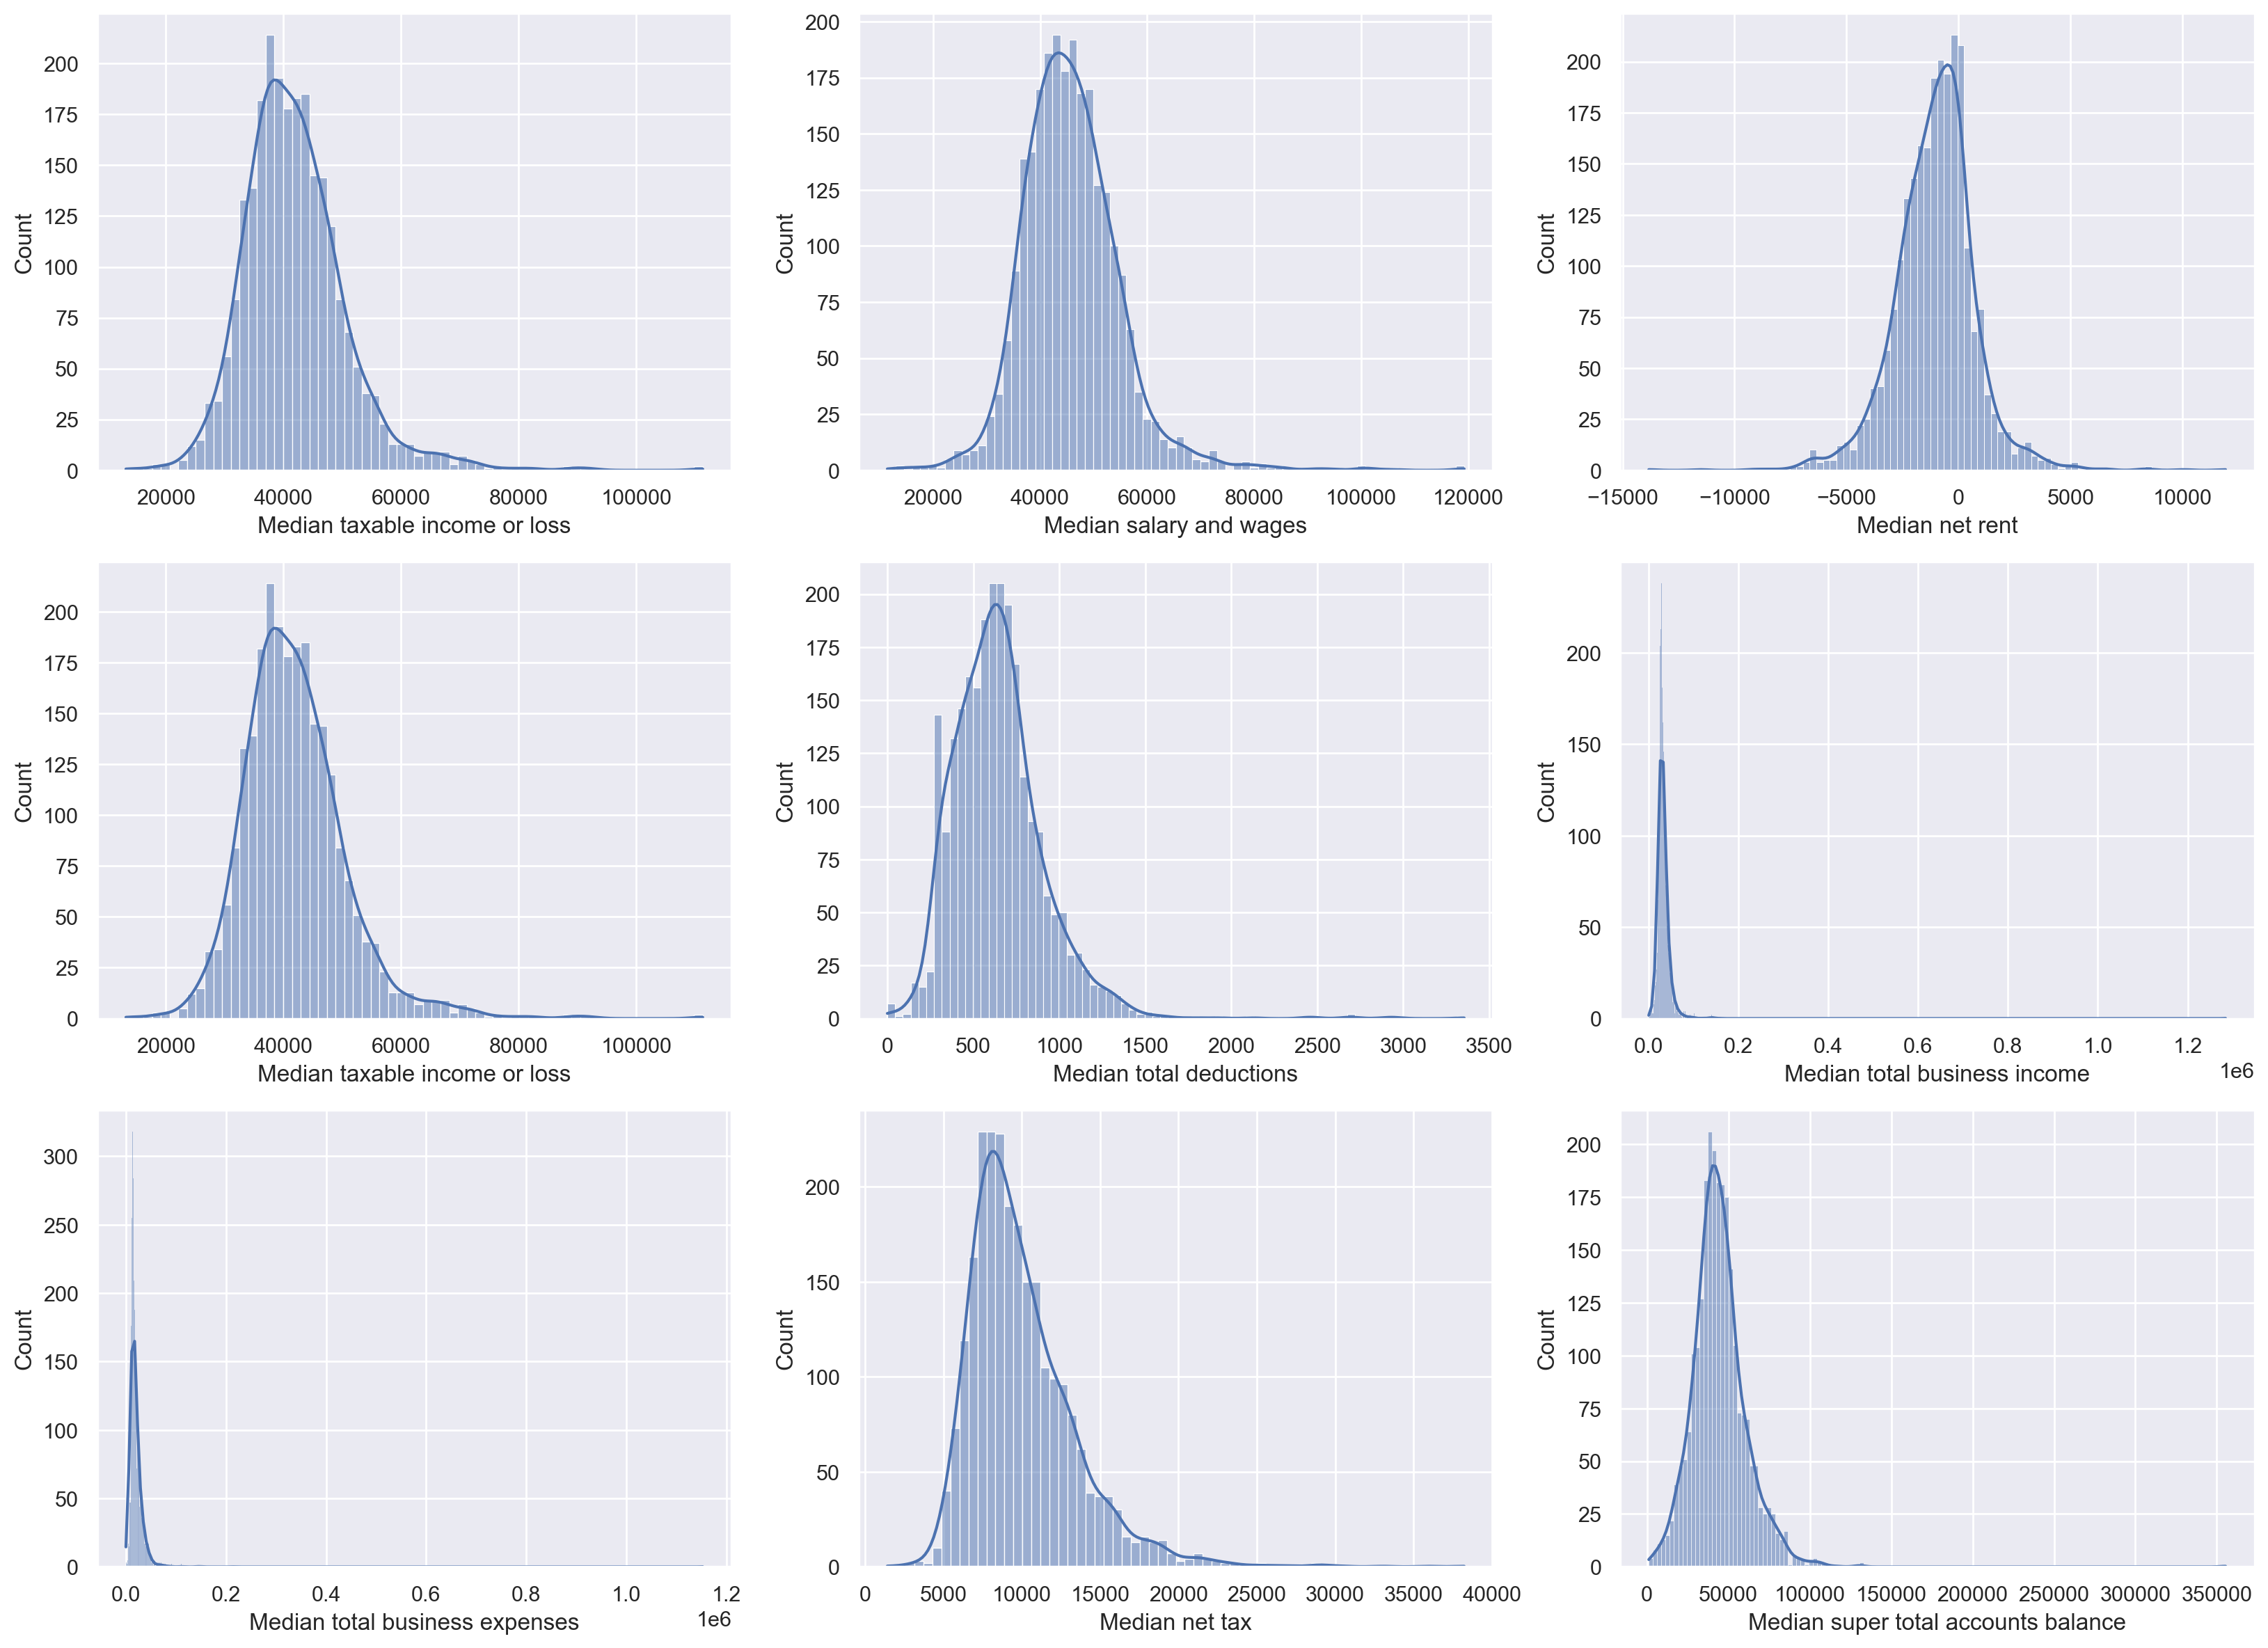

In [189]:
# checking for normality using histograms

plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.histplot(data=ato, x="Median taxable income or loss", kde=True)

plt.subplot(4,3,2)
sns.histplot(data=ato, x="Median salary and wages", kde=True)
plt.subplot(4,3,3)
sns.histplot(data=ato, x="Median net rent", kde=True)

plt.subplot(4,3,4)
sns.histplot(data=ato, x="Median taxable income or loss", kde=True)

plt.subplot(4,3,5)
sns.histplot(data=ato, x="Median total deductions", kde=True)

plt.subplot(4,3,6)
sns.histplot(data=ato, x="Median total business income", kde=True)

plt.subplot(4,3,7)
sns.histplot(data=ato, x="Median total business expenses", kde=True)

plt.subplot(4,3,8)
sns.histplot(data=ato, x="Median net tax", kde=True)

plt.subplot(4,3,9)
sns.histplot(data=ato, x="Median super total accounts balance", kde=True)

From the subplots above, we can see that the data is fairly normal, however, seems rightly skewed due to outliers. We will use boxplot to check for these outliers.

<AxesSubplot:xlabel='Median super total accounts balance'>

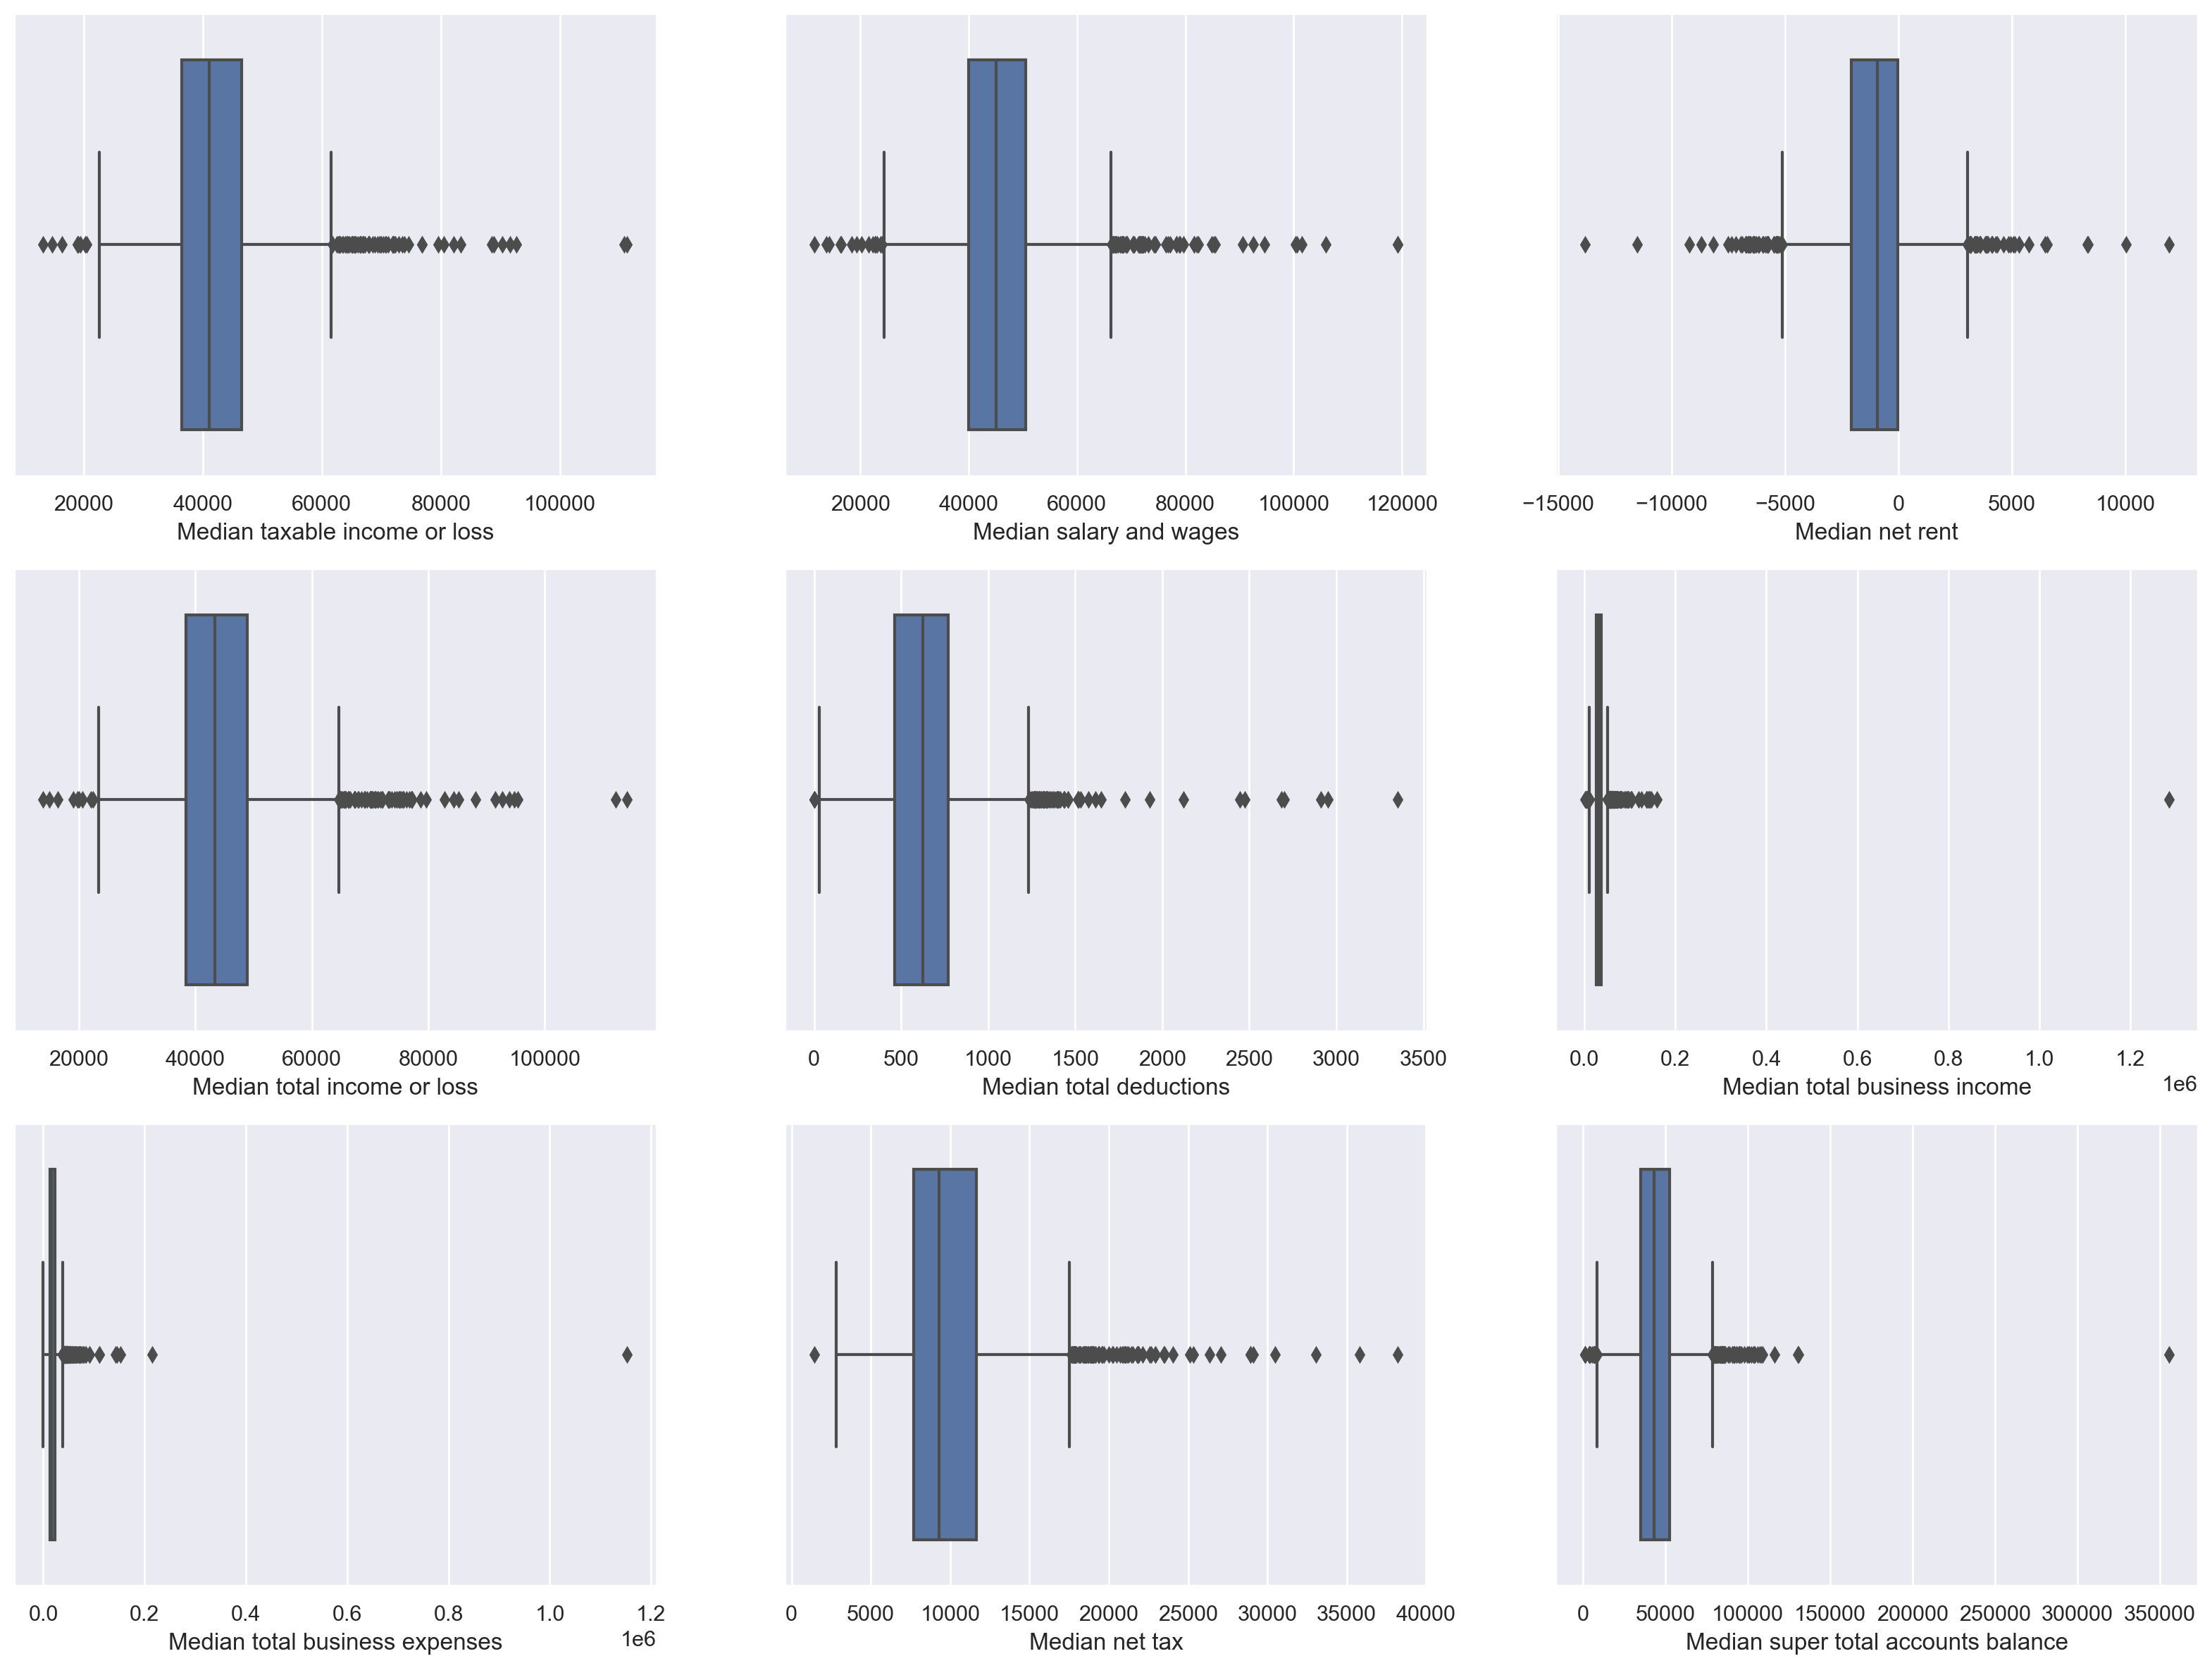

In [113]:
# checking for outliers using box-plots

plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'Median taxable income or loss', data = ato)

plt.subplot(4,3,2)
sns.boxplot(x = 'Median salary and wages', data = ato)

plt.subplot(4,3,3)
sns.boxplot(x = 'Median net rent', data = ato)

plt.subplot(4,3,4)
sns.boxplot(x = 'Median total income or loss', data = ato)

plt.subplot(4,3,5)
sns.boxplot(x = 'Median total deductions', data = ato)

plt.subplot(4,3,6)
sns.boxplot(x = 'Median total business income', data = ato)

plt.subplot(4,3,7)
sns.boxplot(x = 'Median total business expenses', data = ato)

plt.subplot(4,3,8)
sns.boxplot(x = 'Median net tax', data = ato)

plt.subplot(4,3,9)
sns.boxplot(x = 'Median super total accounts balance', data = ato)

In [114]:
# checking for outliers using the Z-score

from scipy import stats

z = np.abs(stats.zscore(ato[['Median taxable income or loss', 'Median salary and wages',
       'Median net rent', 'Median total income or loss',
       'Median total deductions', 'Median total business income',
       'Median total business expenses', 'Median net tax',
       'Median super total accounts balance']]))
print(z)

print("\n")
print("*******************************************************************************")
print("\n")

# threshold = 3  # selecting 3 as the threshold to identify outliers
print('Below are the outlier points along with the respective column numbers in the second array')
print("\n")
print(np.where(z > 3))

[[1.82116988 2.1180561  0.34930413 ... 0.19025436 0.42463544 2.52325009]
 [1.26837654 2.51784695 2.8750941  ... 0.66978789 2.77909361 1.4420026 ]
 [1.2316902  1.35223875 0.33301303 ... 0.45331972 0.23193431 2.34565445]
 ...
 [0.03138376 0.13672759 1.58927284 ... 0.54076258 0.56681478 0.7715907 ]
 [3.13267235 3.94137387 2.91575492 ... 0.28207906 4.08171831 1.95084331]
 [1.33250687 1.17750475 2.06700545 ... 0.006812   0.98947647 0.01558562]]


*******************************************************************************


Below are the outlier points along with the respective column numbers in the second array


(array([  15,   15,   17,   17,   19,   19,   19,   19,   22,   31,   31,
         31,   31,   33,   33,   33,   33,   35,   35,   43,   43,   43,
         45,   45,   45,   46,   46,   46,   46,   47,   47,   47,   71,
         71,   71,   85,   90,  236,  236,  236,  236,  255,  271,  394,
        428,  428,  428,  428,  431,  431,  432,  432,  432,  433,  443,
        443,  

Since outliers can impact clustering, we will remove outliers

In [115]:
# Removing the outliers
ato_outliers_removed = ato[(z<3).all(axis=1)]

In [116]:
ato_outliers_removed.head()

Postcode  Median taxable income or loss  Median salary and wages  \
0      2000                          25828                    26186   
1      2006                          53192                    69154   
2      2007                          31049                    33284   
3      2008                          40289                    42505   
4      2009                          52414                    56378   

   Median net rent  Median total income or loss  Median total deductions  \
0             -420                        26811                      280   
1             4148                        54338                      876   
2            -1654                        32450                      300   
3             -906                        42123                      392   
4            -1393                        54867                      567   

   Median total business income  Median total business expenses  \
0                         22080                           14998   
1                         37440                           37177   
2                         18532                            8214   
3                         18000                            7579   
4                         23795                           10851   

   Median net tax  Median super total accounts balance  
0            8571                                 1219  
1           19577                                19776  
2            9233                                 4267  
3           10972                                 9029  
4           15451                                19841

In [117]:
print('Shape of dataframe before outlier removal: ' + str(ato.shape))
print("\n")
print('Shape of dataframe after outlier removal: ' + str(ato_outliers_removed.shape))

Shape of dataframe before outlier removal: (2470, 10)


Shape of dataframe after outlier removal: (2374, 10)


In [118]:
X = ato_outliers_removed.drop('Postcode',axis =1)  
y = ato_outliers_removed['Postcode']

## Bivariate Analysis

We will now conduct bivariate analysis to inspect colinearity.

<AxesSubplot:>

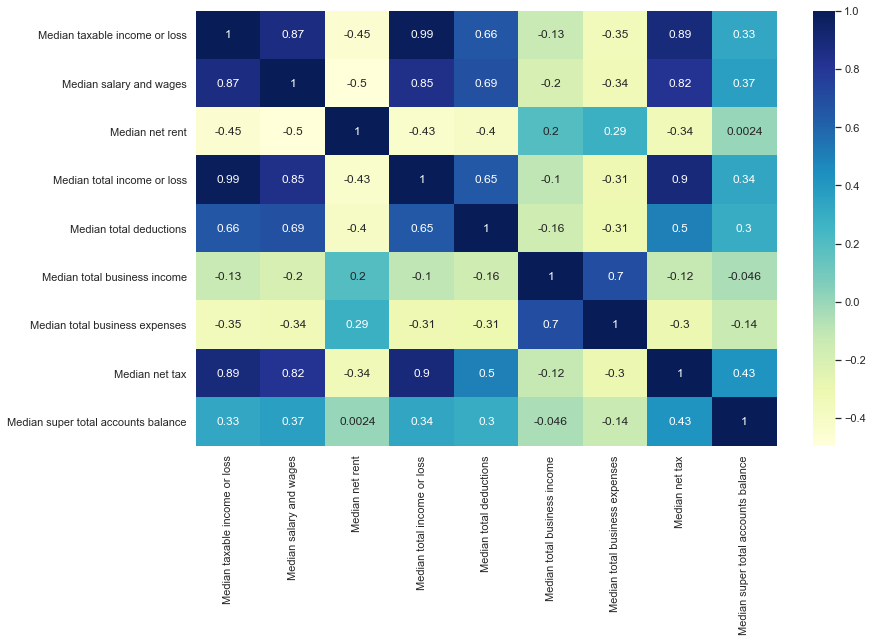

In [119]:
# Let's see the correlation matrix 
plt.figure(figsize = (13,8))       
sns.heatmap(X.corr(),annot = True, cmap="YlGnBu")

We can see high correlation among variables. Since the variables are not all the same and we can run into risk of artifically bringing the data together, we will use PCA instead.

## PCA 

#### Standardization

In [120]:
# Standardization of the dataset before performing PCA

from sklearn.preprocessing import StandardScaler

In [121]:
scaler = StandardScaler()

In [122]:
X_scaled = scaler.fit_transform(X)

In [123]:
X_scaled[:5,:5]

array([[-2.09800189, -2.49898664,  0.39052495, -2.19729752, -1.53333326],
       [ 1.58802545,  3.10382787,  3.310452  ,  1.3698034 ,  1.04740017],
       [-1.39471477, -1.57344257, -0.39826445, -1.46656471, -1.44673147],
       [-0.15005417, -0.37106982,  0.07986722, -0.21308386, -1.04836322],
       [ 1.48322611,  1.43790071, -0.23142973,  1.43835415, -0.29059753]])

In [124]:
X.columns

Index(['Median taxable income or loss', 'Median salary and wages',
       'Median net rent', 'Median total income or loss',
       'Median total deductions', 'Median total business income',
       'Median total business expenses', 'Median net tax',
       'Median super total accounts balance'],
      dtype='object')

In [125]:
X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)

In [126]:
X_scaled_df.head()

Median taxable income or loss  Median salary and wages  Median net rent  \
0                      -2.098002                -2.498987         0.390525   
1                       1.588025                 3.103828         3.310452   
2                      -1.394715                -1.573443        -0.398264   
3                      -0.150054                -0.371070         0.079867   
4                       1.483226                 1.437901        -0.231430   

   Median total income or loss  Median total deductions  \
0                    -2.197298                -1.533333   
1                     1.369803                 1.047400   
2                    -1.466565                -1.446731   
3                    -0.213084                -1.048363   
4                     1.438354                -0.290598   

   Median total business income  Median total business expenses  \
0                     -0.987375                       -0.425216   
1                      0.472951                        1.814918   
2                     -1.324695                       -1.110417   
3                     -1.375274                       -1.174553   
4                     -0.824325                       -0.844073   

   Median net tax  Median super total accounts balance  
0       -0.419973                            -2.874109  
1        3.408359                            -1.628807  
2       -0.189703                            -2.669567  
3        0.415192                            -2.350004  
4        1.973169                            -1.624445

#### PCA Analysis

In [127]:
pca = PCA(random_state=42)

In [128]:
pca.fit(X_scaled)

PCA(random_state=42)

In [129]:
pca.components_[0]

array([ 0.43411357,  0.42159385, -0.25055532,  0.42821103,  0.34294917,
       -0.13087654, -0.22327932,  0.40432449,  0.19896388])

In [130]:
pca.explained_variance_ratio_

array([0.53425901, 0.1708024 , 0.1103726 , 0.067597  , 0.05631028,
       0.03200999, 0.01753464, 0.01035463, 0.00075946])

In [131]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.53425901, 0.70506141, 0.815434  , 0.883031  , 0.93934128,
       0.97135127, 0.98888591, 0.99924054, 1.        ])

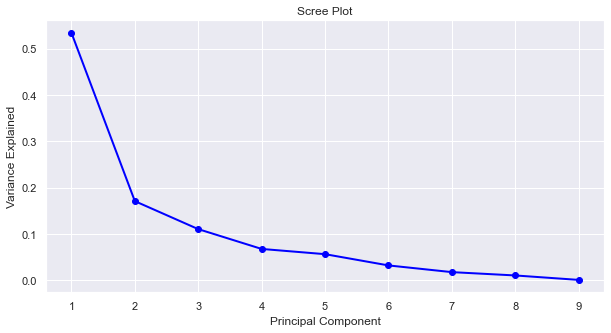

In [132]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

From the scree plot flatening and Principal Components 4 and the cumulative variance of 88%, we have decided to go ahead with 4 Principal components for clustering

In [133]:
pca_final = IncrementalPCA(n_components=4)

In [134]:
X_pca_final = pca_final.fit_transform(X_scaled)

In [135]:
print(X.shape)
print(X_pca_final.shape)

(2374, 9)
(2374, 4)


In [136]:
corrmat = np.corrcoef(X_pca_final.transpose())

<AxesSubplot:>

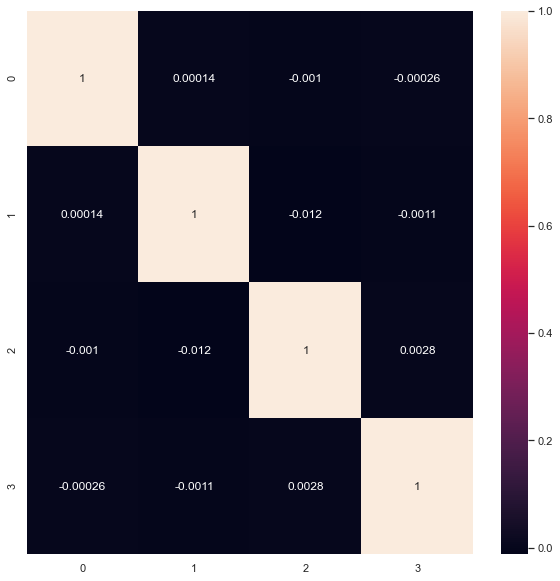

In [137]:

# Plotting the heatmap of the corr matrix
plt.figure(figsize=[10,10])
sns.heatmap(corrmat, annot=True)

## Clustering

### K-mean Clsutering

In [138]:
# k-means with some arbitrary k (number of clusters)
kmeans = KMeans(n_clusters=5, max_iter=1000)
kmeans.fit(X_pca_final)

KMeans(max_iter=1000, n_clusters=5)

In [139]:
kmeans.labels_

array([0, 1, 0, ..., 0, 4, 1], dtype=int32)

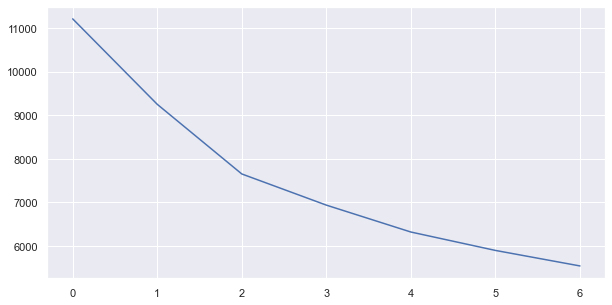

In [140]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_pca_final)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [141]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_pca_final)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(X_pca_final, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.34779523714725996
For n_clusters=3, the silhouette score is 0.2758854784338194
For n_clusters=4, the silhouette score is 0.262657383086596
For n_clusters=5, the silhouette score is 0.21330248019662407
For n_clusters=6, the silhouette score is 0.21755169929285845
For n_clusters=7, the silhouette score is 0.1986539328390178
For n_clusters=8, the silhouette score is 0.1999051065246214


In [142]:
# final model with k=2 because it has the highest silhouette score
kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=42)
kmeans.fit(X_pca_final)

KMeans(max_iter=1000, n_clusters=2, random_state=42)

In [143]:
kmeans.labels_

array([0, 1, 0, ..., 0, 1, 1], dtype=int32)

In [144]:
ato_outliers_removed['K-Means_Cluster_ID'] = kmeans.labels_

In [145]:
ato_outliers_removed.head()

Postcode  Median taxable income or loss  Median salary and wages  \
0      2000                          25828                    26186   
1      2006                          53192                    69154   
2      2007                          31049                    33284   
3      2008                          40289                    42505   
4      2009                          52414                    56378   

   Median net rent  Median total income or loss  Median total deductions  \
0             -420                        26811                      280   
1             4148                        54338                      876   
2            -1654                        32450                      300   
3             -906                        42123                      392   
4            -1393                        54867                      567   

   Median total business income  Median total business expenses  \
0                         22080                           14998   
1                         37440                           37177   
2                         18532                            8214   
3                         18000                            7579   
4                         23795                           10851   

   Median net tax  Median super total accounts balance  K-Means_Cluster_ID  
0            8571                                 1219                   0  
1           19577                                19776                   1  
2            9233                                 4267                   0  
3           10972                                 9029                   0  
4           15451                                19841                   1

### Hierarchical Clustering

In [146]:
X_scaled_df.head()

Median taxable income or loss  Median salary and wages  Median net rent  \
0                      -2.098002                -2.498987         0.390525   
1                       1.588025                 3.103828         3.310452   
2                      -1.394715                -1.573443        -0.398264   
3                      -0.150054                -0.371070         0.079867   
4                       1.483226                 1.437901        -0.231430   

   Median total income or loss  Median total deductions  \
0                    -2.197298                -1.533333   
1                     1.369803                 1.047400   
2                    -1.466565                -1.446731   
3                    -0.213084                -1.048363   
4                     1.438354                -0.290598   

   Median total business income  Median total business expenses  \
0                     -0.987375                       -0.425216   
1                      0.472951                        1.814918   
2                     -1.324695                       -1.110417   
3                     -1.375274                       -1.174553   
4                     -0.824325                       -0.844073   

   Median net tax  Median super total accounts balance  
0       -0.419973                            -2.874109  
1        3.408359                            -1.628807  
2       -0.189703                            -2.669567  
3        0.415192                            -2.350004  
4        1.973169                            -1.624445

We will now use ward linkage to create a dendrogram as Ward method is the default when unsure of the most suitable method. Further, the experimentation notebook will show that the single and complete linkage method did not perform well for this dataset.

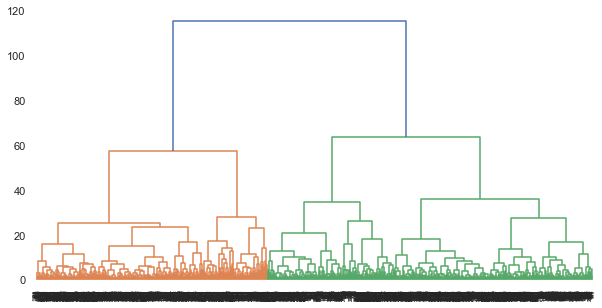

In [147]:
# Ward linkage
w_mergings = linkage(X_scaled_df, method="ward", metric='euclidean')
dendrogram(w_mergings)
plt.show()

Here we can see that both 2 or 4 might be a suitable choice, however, experimentation showed 2 clusters is a more suitable choice.

In [148]:
# 4 clusters using ward
w_cluster_labels = cut_tree(w_mergings, n_clusters=2).reshape(-1, )
w_cluster_labels

array([0, 1, 0, ..., 0, 1, 1])

In [149]:
ato_outliers_removed["Hierarchical_Cluster_labels"] = w_cluster_labels

In [150]:
ato_outliers_removed.head()

Postcode  Median taxable income or loss  Median salary and wages  \
0      2000                          25828                    26186   
1      2006                          53192                    69154   
2      2007                          31049                    33284   
3      2008                          40289                    42505   
4      2009                          52414                    56378   

   Median net rent  Median total income or loss  Median total deductions  \
0             -420                        26811                      280   
1             4148                        54338                      876   
2            -1654                        32450                      300   
3             -906                        42123                      392   
4            -1393                        54867                      567   

   Median total business income  Median total business expenses  \
0                         22080                           14998   
1                         37440                           37177   
2                         18532                            8214   
3                         18000                            7579   
4                         23795                           10851   

   Median net tax  Median super total accounts balance  K-Means_Cluster_ID  \
0            8571                                 1219                   0   
1           19577                                19776                   1   
2            9233                                 4267                   0   
3           10972                                 9029                   0   
4           15451                                19841                   1   

   Hierarchical_Cluster_labels  
0                            0  
1                            1  
2                            0  
3                            0  
4                            1

We will now plot the cluster results against the variables to see gather insights on cluster formation.

### Analysing Results 

<AxesSubplot:xlabel='Hierarchical_Cluster_labels', ylabel='Median super total accounts balance'>

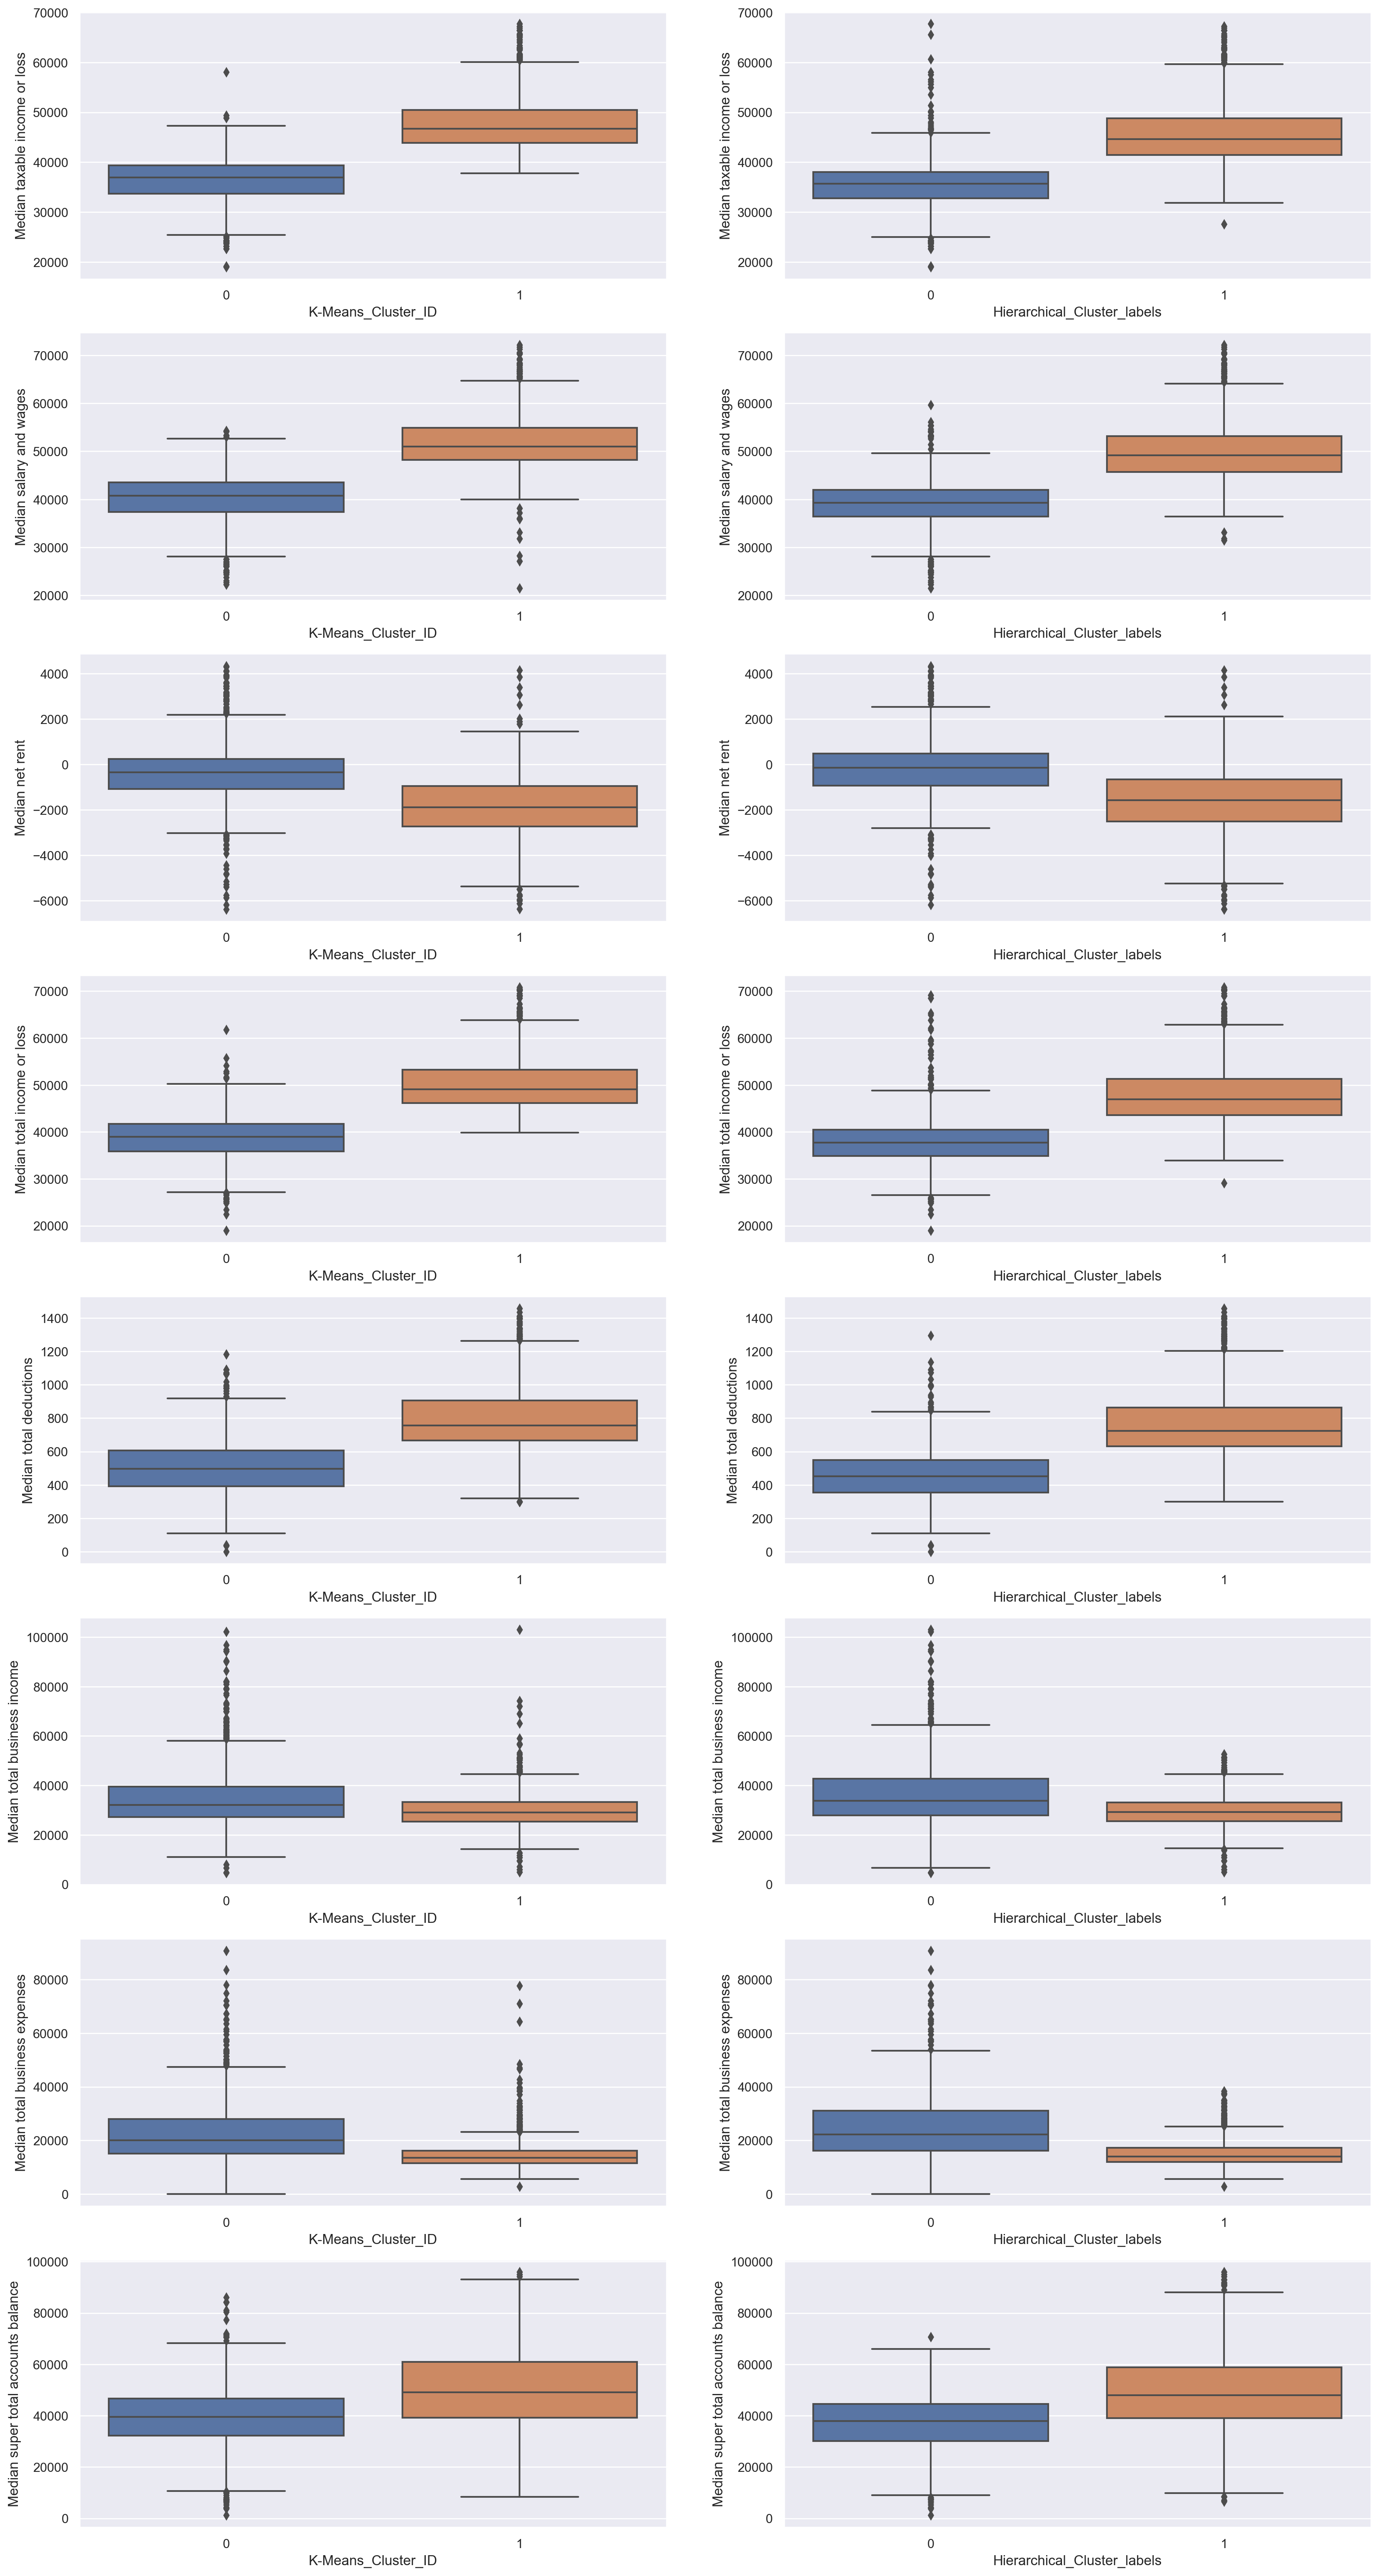

In [151]:
# plotting sub-plots to analyse the results

plt.figure(figsize=(20,40), dpi=200)

plt.subplot(8,2,1)
sns.boxplot(x='K-Means_Cluster_ID', y='Median taxable income or loss', data=ato_outliers_removed)

plt.subplot(8,2,2)
sns.boxplot(x='Hierarchical_Cluster_labels', y='Median taxable income or loss', data=ato_outliers_removed)

plt.subplot(8,2,3)
sns.boxplot(x='K-Means_Cluster_ID', y='Median salary and wages', data=ato_outliers_removed)

plt.subplot(8,2,4)
sns.boxplot(x='Hierarchical_Cluster_labels', y='Median salary and wages', data=ato_outliers_removed)

plt.subplot(8,2,5)
sns.boxplot(x='K-Means_Cluster_ID', y='Median net rent', data=ato_outliers_removed)

plt.subplot(8,2,6)
sns.boxplot(x='Hierarchical_Cluster_labels', y='Median net rent', data=ato_outliers_removed)

plt.subplot(8,2,7)
sns.boxplot(x='K-Means_Cluster_ID', y='Median total income or loss', data=ato_outliers_removed)

plt.subplot(8,2,8)
sns.boxplot(x='Hierarchical_Cluster_labels', y='Median total income or loss', data=ato_outliers_removed)

plt.subplot(8,2,9)
sns.boxplot(x='K-Means_Cluster_ID', y='Median total deductions', data=ato_outliers_removed)

plt.subplot(8,2,10)
sns.boxplot(x='Hierarchical_Cluster_labels', y='Median total deductions', data=ato_outliers_removed)

plt.subplot(8,2,11)
sns.boxplot(x='K-Means_Cluster_ID', y='Median total business income', data=ato_outliers_removed)

plt.subplot(8,2,12)
sns.boxplot(x='Hierarchical_Cluster_labels', y='Median total business income', data=ato_outliers_removed)

plt.subplot(8,2,13)
sns.boxplot(x='K-Means_Cluster_ID', y='Median total business expenses', data=ato_outliers_removed)

plt.subplot(8,2,14)
sns.boxplot(x='Hierarchical_Cluster_labels', y='Median total business expenses', data=ato_outliers_removed)

plt.subplot(8,2,15)
sns.boxplot(x='K-Means_Cluster_ID', y='Median super total accounts balance', data=ato_outliers_removed)

plt.subplot(8,2,16)
sns.boxplot(x='Hierarchical_Cluster_labels', y='Median super total accounts balance', data=ato_outliers_removed)

From the above box plots, we can see that the Cluster 0 for Kmeans and Cluster 1 for Hierarchical Clustering contains suburbs with high business income, high business expense, and high rent expense. Interestingly despite owning a business, these suburbs appear to have less taxable income and receive comparatively less deductions. Suburbs in Cluster 1 (Kmeans) & Cluster 0 (Hierarchical) tend to contain population on salary & wages with high income, recieving more tax deductions and negative median net rent meaning that population in Cluster 1 is infact most earning rent.

Given that the outliers were dropped due to siginificant impact of K-mean clustering, it is probable that the removal might have impacted cluster results since the population earning more both in terms of income and rent is being getting more tax deductions, which seems counter intuitive given Australian tax laws. Hence we conducted Hierarchical clustering on original data set.

#### Hierarchical Clustering with Outliers

In [152]:
XALL = ato.drop('Postcode',axis =1)  
yALL = ato['Postcode']

In [153]:
scaler = StandardScaler()
X_scaledALL = scaler.fit_transform(XALL)
X_scaled[:5,:5]

array([[-2.09800189, -2.49898664,  0.39052495, -2.19729752, -1.53333326],
       [ 1.58802545,  3.10382787,  3.310452  ,  1.3698034 ,  1.04740017],
       [-1.39471477, -1.57344257, -0.39826445, -1.46656471, -1.44673147],
       [-0.15005417, -0.37106982,  0.07986722, -0.21308386, -1.04836322],
       [ 1.48322611,  1.43790071, -0.23142973,  1.43835415, -0.29059753]])

In [154]:
XALL.columns

Index(['Median taxable income or loss', 'Median salary and wages',
       'Median net rent', 'Median total income or loss',
       'Median total deductions', 'Median total business income',
       'Median total business expenses', 'Median net tax',
       'Median super total accounts balance'],
      dtype='object')

In [155]:
X_scaled_dfALL = pd.DataFrame(X_scaledALL, columns= XALL.columns)

In [156]:
pcaALL = PCA(random_state=42)
pcaALL.fit(X_scaledALL)

PCA(random_state=42)

In [157]:
pcaALL.explained_variance_ratio_

array([0.51905186, 0.21065232, 0.11505622, 0.06687648, 0.05553613,
       0.01543818, 0.01006554, 0.00672258, 0.00060069])

In [158]:
var_cumuALL = np.cumsum(pca.explained_variance_ratio_)
var_cumuALL

array([0.53425901, 0.70506141, 0.815434  , 0.883031  , 0.93934128,
       0.97135127, 0.98888591, 0.99924054, 1.        ])

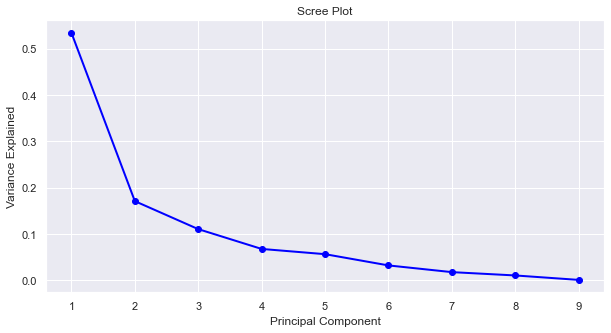

In [159]:
PC_valuesALL = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [160]:
pca_finalALL = IncrementalPCA(n_components=4)

In [161]:
X_pca_finalALL = pca_finalALL.fit_transform(X_scaledALL)

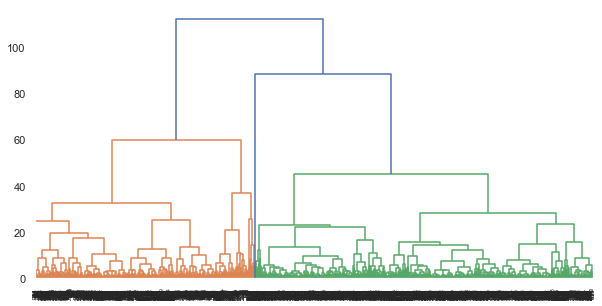

In [162]:
# Ward linkage
w_mergingsALL = linkage(X_scaled_dfALL, method="ward", metric='euclidean')
dendrogram(w_mergingsALL)
plt.show()

Here we can see that we will have to choose two cluster as any number greater than that will result in one cluster with only a few suburbs, this perhaps is the cluster containing outliers.

In [163]:
# 4 clusters using ward
w_cluster_labelsALL = cut_tree(w_mergingsALL, n_clusters=2).reshape(-1, )
w_cluster_labels

array([0, 1, 0, ..., 0, 1, 1])

In [164]:
ato["Hierarchical_Cluster_labels"] = w_cluster_labelsALL

<AxesSubplot:xlabel='Hierarchical_Cluster_labels', ylabel='Median net tax'>

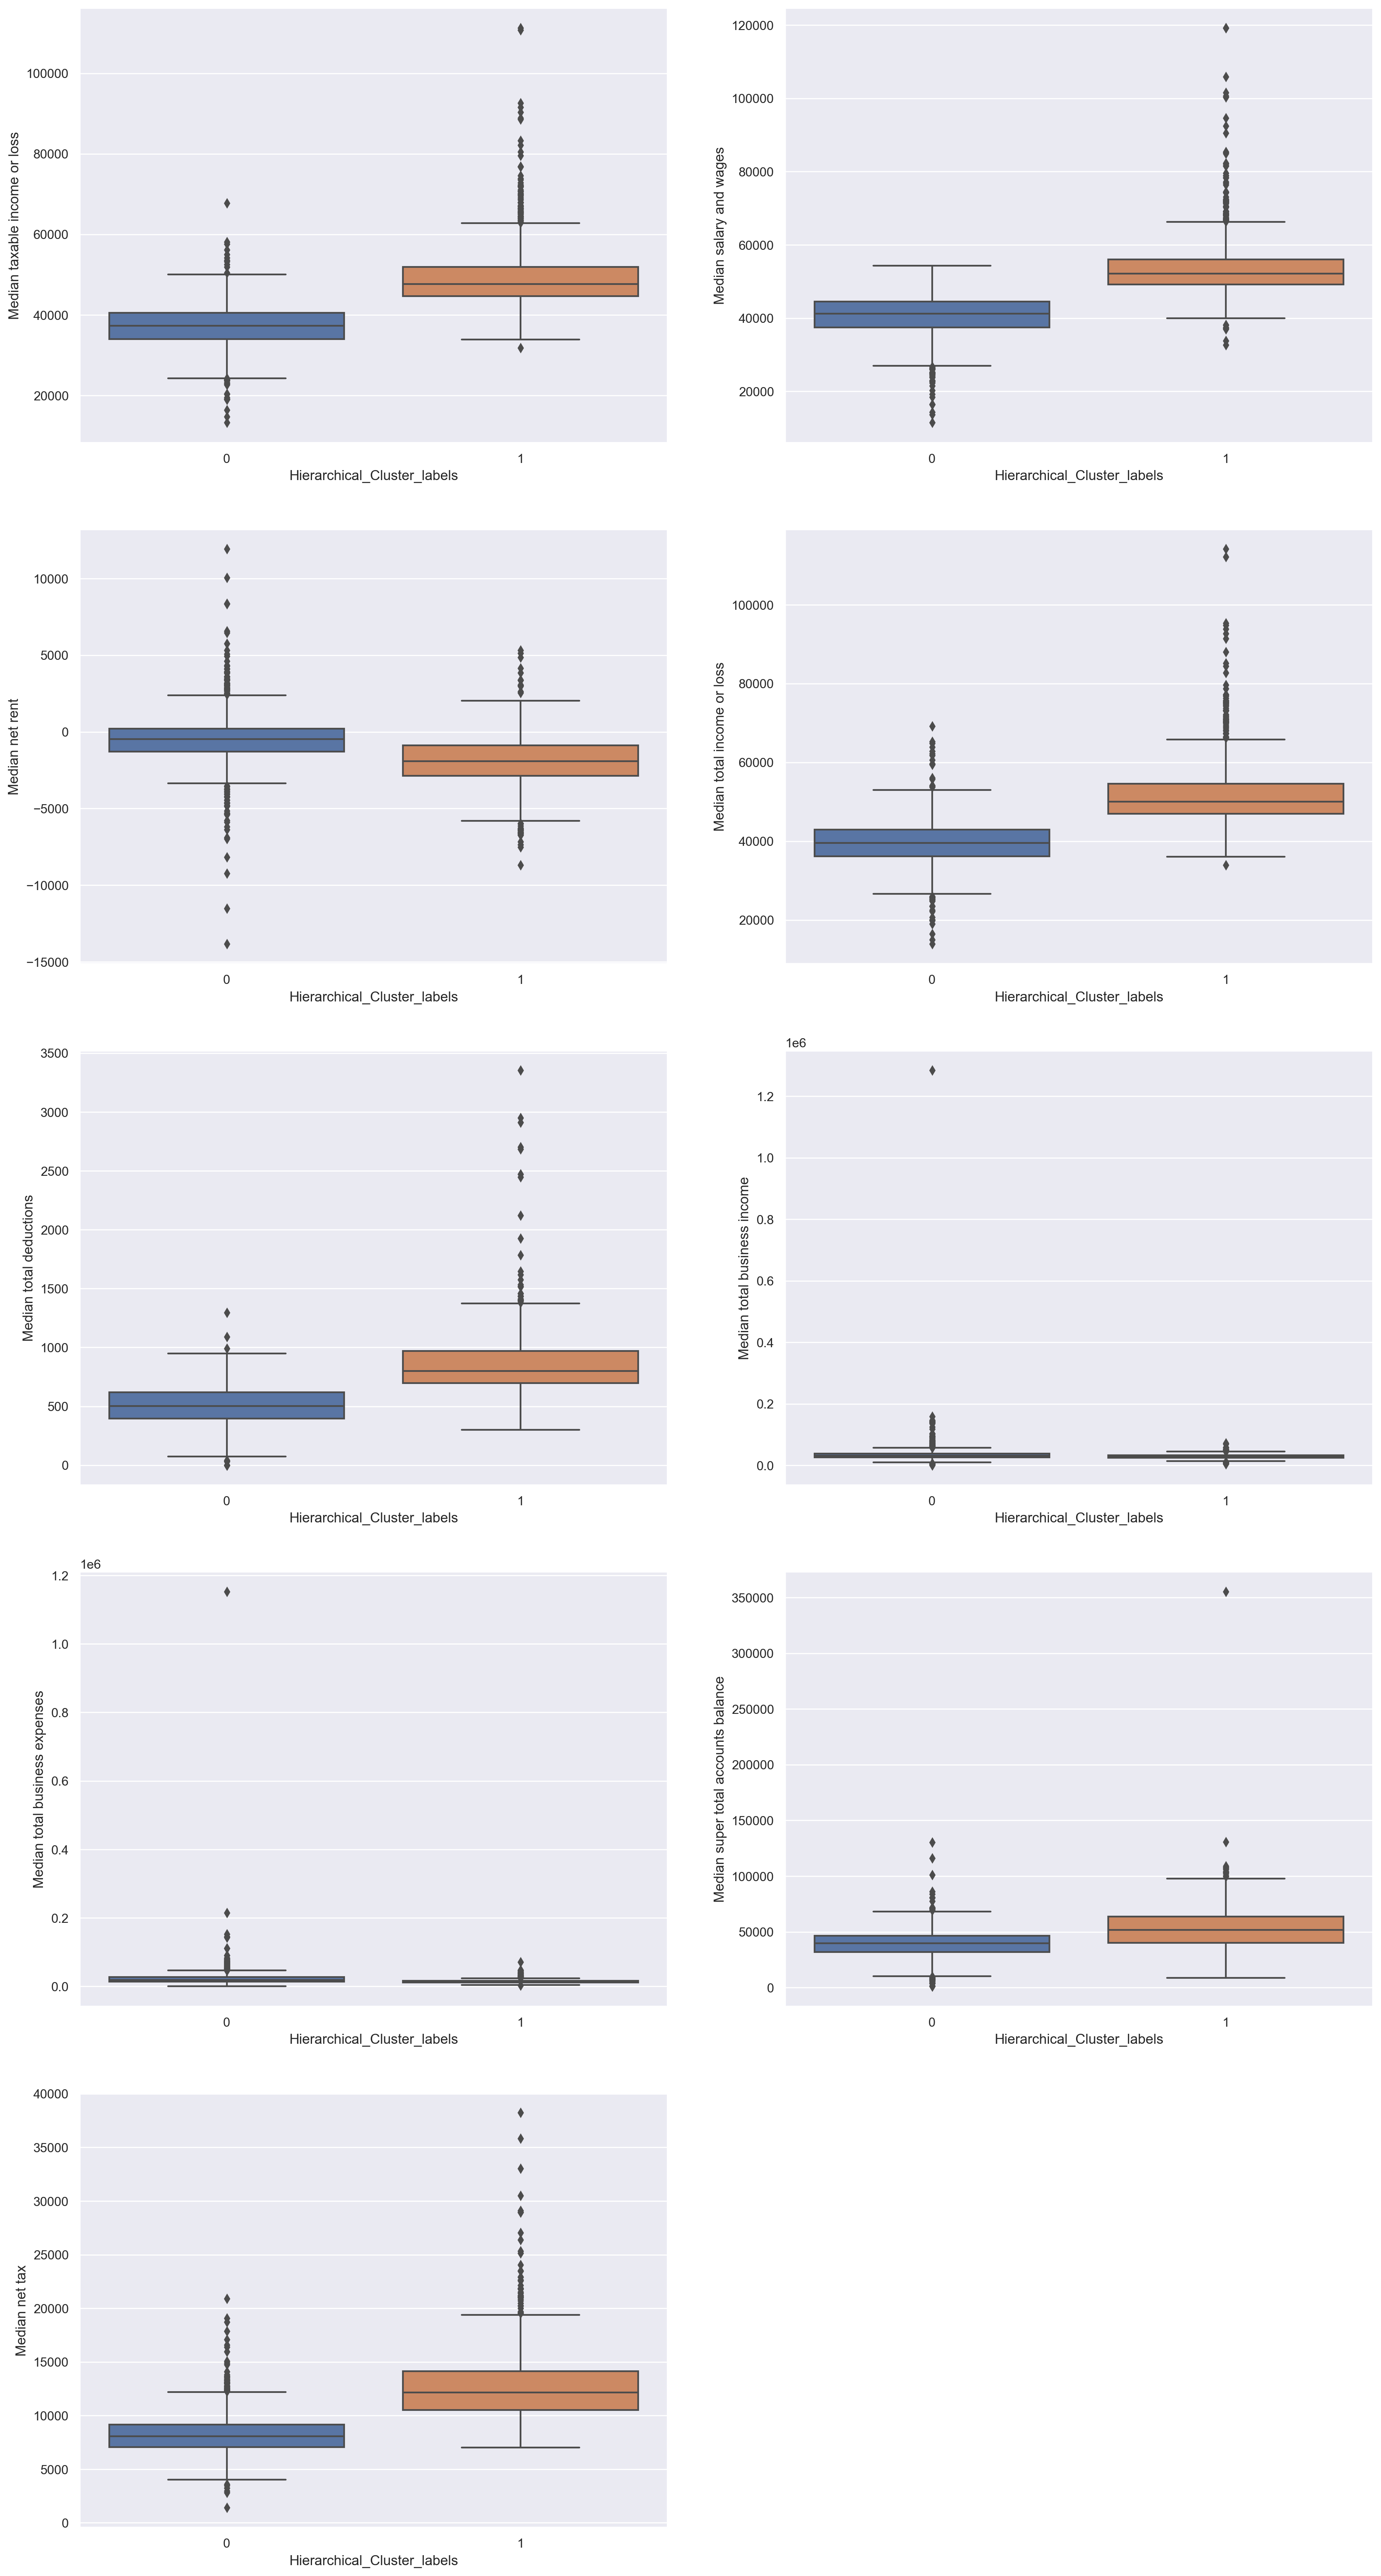

In [165]:
# plotting sub-plots to analyse the results

plt.figure(figsize=(20,40), dpi=200)


plt.subplot(5,2,1)
sns.boxplot(x='Hierarchical_Cluster_labels', y='Median taxable income or loss', data=ato)

plt.subplot(5,2,2)
sns.boxplot(x='Hierarchical_Cluster_labels', y='Median salary and wages', data=ato)

plt.subplot(5,2,3)
sns.boxplot(x='Hierarchical_Cluster_labels', y='Median net rent', data=ato)

plt.subplot(5,2,4)
sns.boxplot(x='Hierarchical_Cluster_labels', y='Median total income or loss', data=ato)

plt.subplot(5,2,5)
sns.boxplot(x='Hierarchical_Cluster_labels', y='Median total deductions', data=ato)

plt.subplot(5,2,6)
sns.boxplot(x='Hierarchical_Cluster_labels', y='Median total business income', data=ato)

plt.subplot(5,2,7)
sns.boxplot(x='Hierarchical_Cluster_labels', y='Median total business expenses', data=ato)

plt.subplot(5,2,8)
sns.boxplot(x='Hierarchical_Cluster_labels', y='Median super total accounts balance', data=ato)

plt.subplot(5,2,9)
sns.boxplot(x='Hierarchical_Cluster_labels', y='Median net tax', data=ato)

Here we can see that the clustering results remain the same and we can suggest that the Australian suburbs can be divided into two groups. One groups that contains suburbs with high business income, expense and rent expense and one with high income, tax payments, tax deductions, super account balance and rent income.

Since we were interested a separate outliers cluster would look like, we conducted hierarchical clustering with 3 clusters

In [166]:
# 4 clusters using ward
w_cluster_labelsALL3 = cut_tree(w_mergingsALL, n_clusters=3).reshape(-1, )
w_cluster_labelsALL3

array([0, 1, 0, ..., 1, 1, 1])

In [167]:
ato["Hierarchical_Cluster_labels_w3"] = w_cluster_labelsALL3
ato.head()

Postcode  Median taxable income or loss  Median salary and wages  \
0      2000                          25828                    26186   
1      2006                          53192                    69154   
2      2007                          31049                    33284   
3      2008                          40289                    42505   
4      2009                          52414                    56378   

   Median net rent  Median total income or loss  Median total deductions  \
0             -420                        26811                      280   
1             4148                        54338                      876   
2            -1654                        32450                      300   
3             -906                        42123                      392   
4            -1393                        54867                      567   

   Median total business income  Median total business expenses  \
0                         22080                           14998   
1                         37440                           37177   
2                         18532                            8214   
3                         18000                            7579   
4                         23795                           10851   

   Median net tax  Median super total accounts balance  \
0            8571                                 1219   
1           19577                                19776   
2            9233                                 4267   
3           10972                                 9029   
4           15451                                19841   

   Hierarchical_Cluster_labels  Hierarchical_Cluster_labels_w3  
0                            0                               0  
1                            1                               1  
2                            0                               0  
3                            0                               0  
4                            1                               1

<AxesSubplot:xlabel='Hierarchical_Cluster_labels_w3', ylabel='Median net tax'>

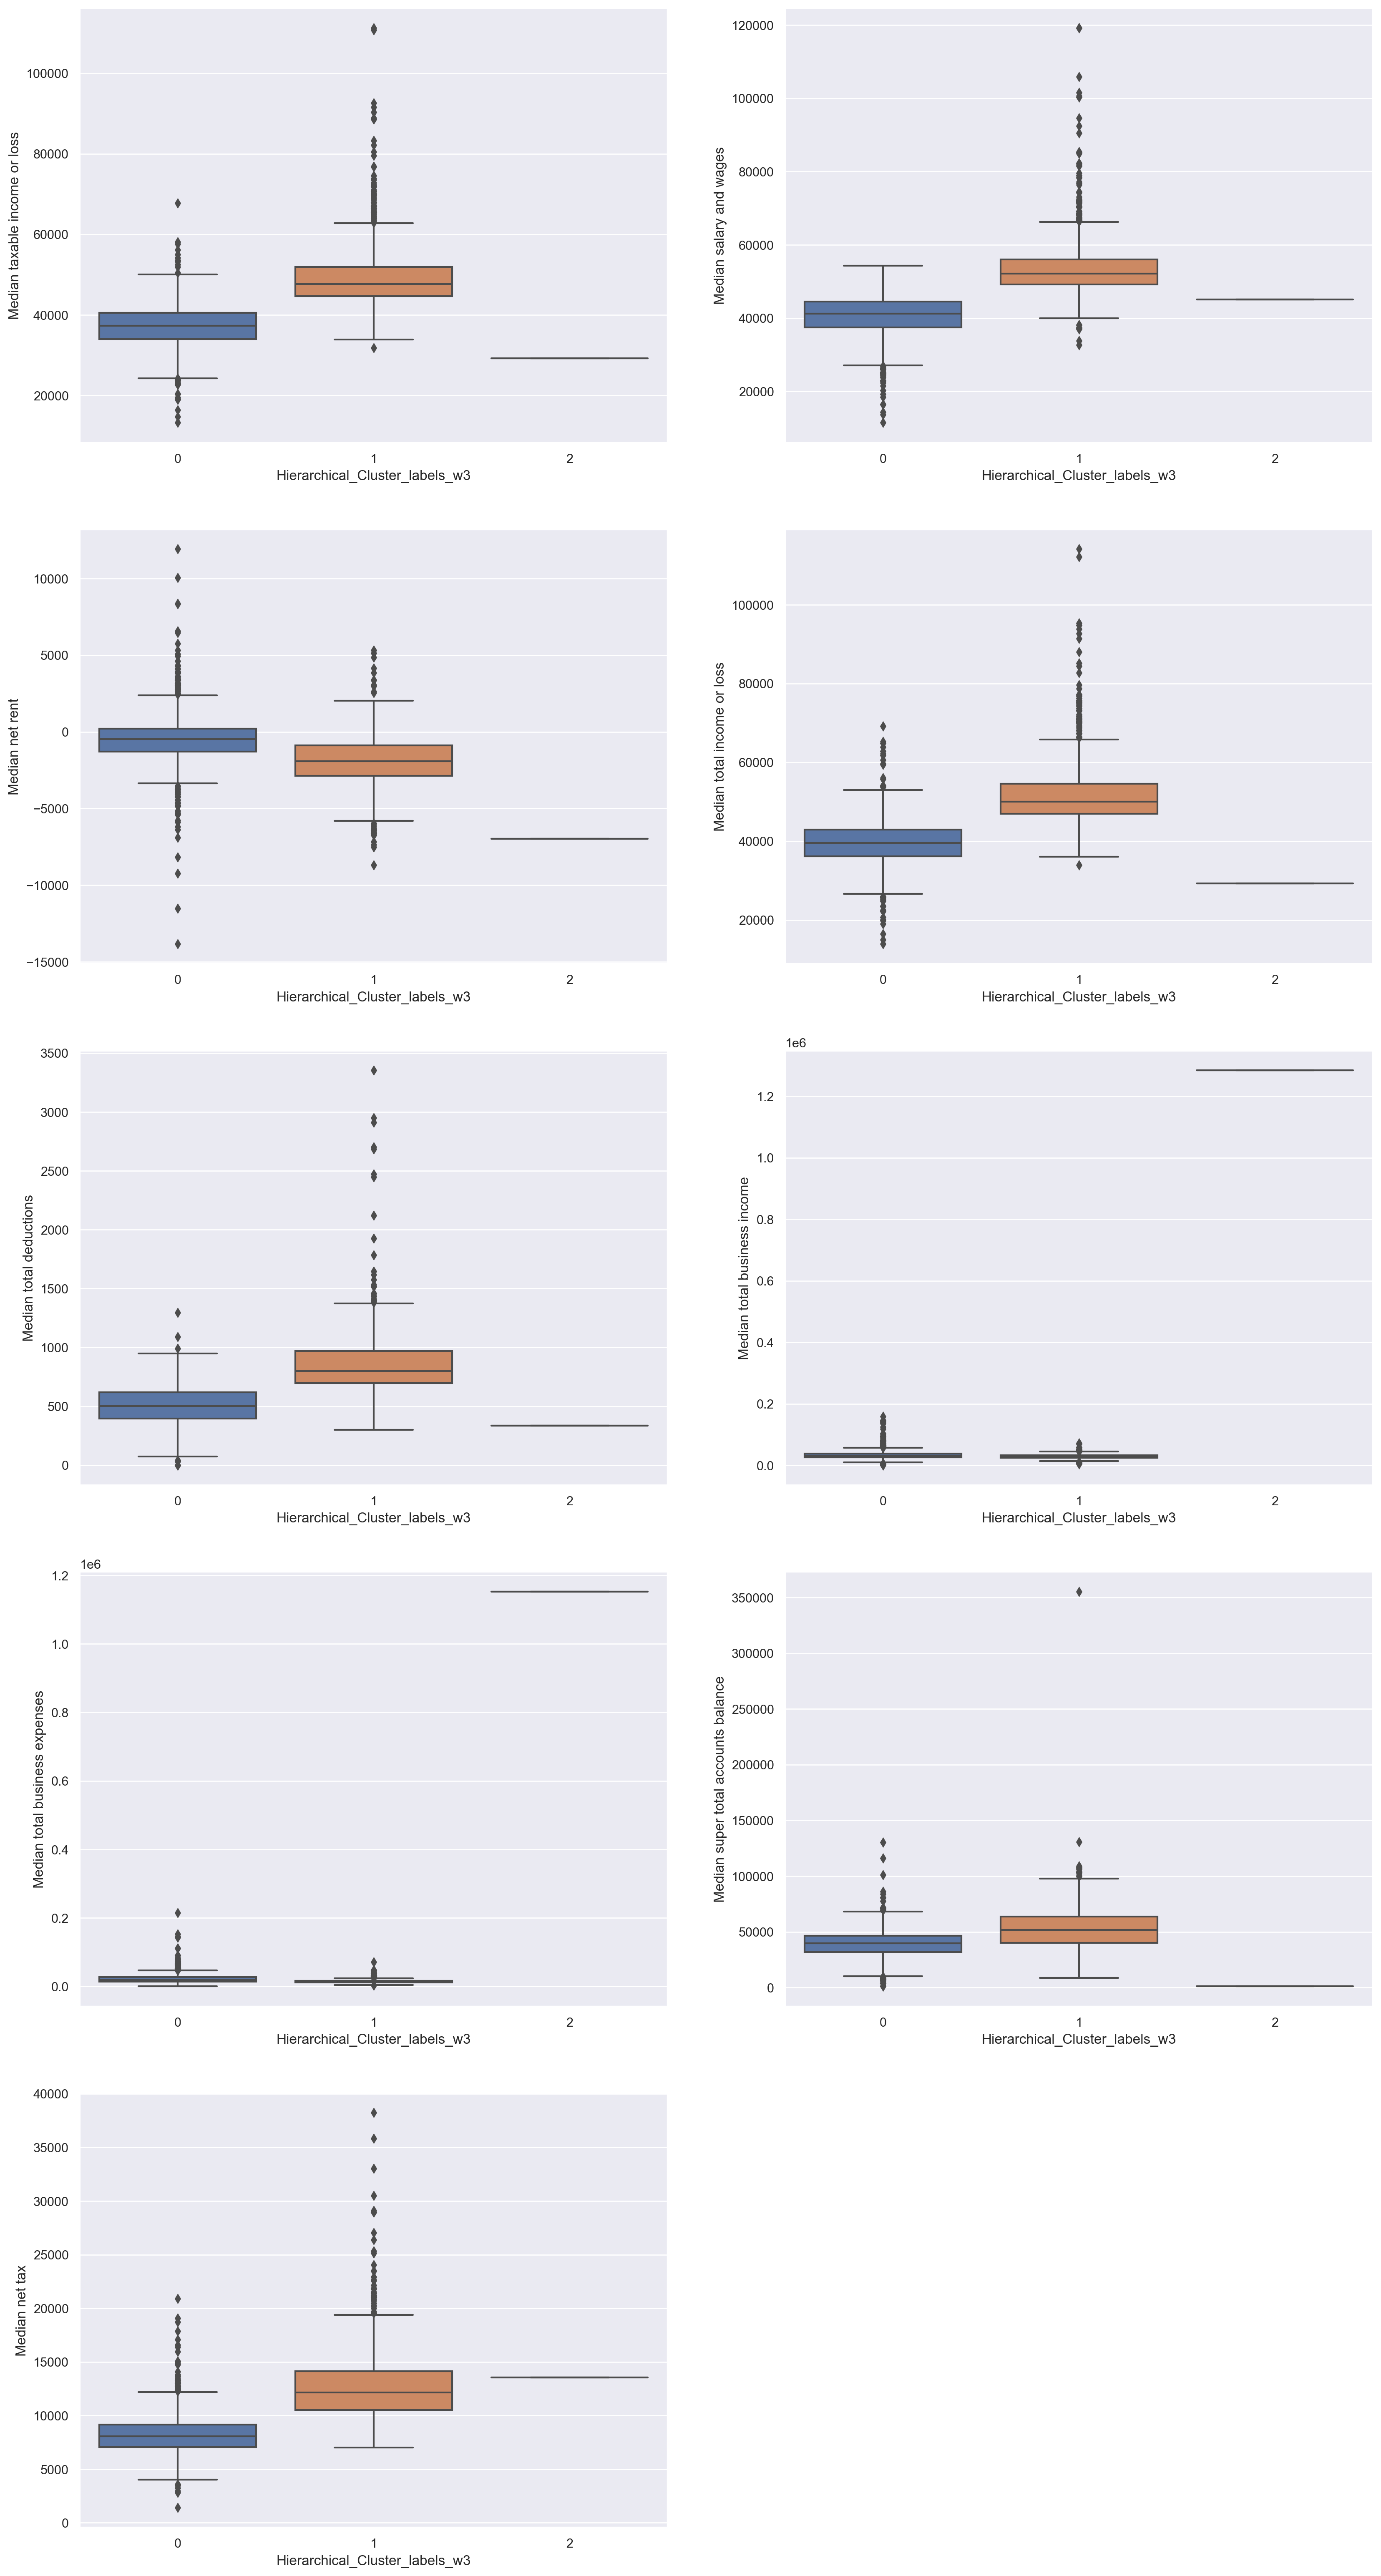

In [168]:
plt.figure(figsize=(20,40), dpi=200)


plt.subplot(5,2,1)
sns.boxplot(x='Hierarchical_Cluster_labels_w3', y='Median taxable income or loss', data=ato)

plt.subplot(5,2,2)
sns.boxplot(x='Hierarchical_Cluster_labels_w3', y='Median salary and wages', data=ato)

plt.subplot(5,2,3)
sns.boxplot(x='Hierarchical_Cluster_labels_w3', y='Median net rent', data=ato)

plt.subplot(5,2,4)
sns.boxplot(x='Hierarchical_Cluster_labels_w3', y='Median total income or loss', data=ato)

plt.subplot(5,2,5)
sns.boxplot(x='Hierarchical_Cluster_labels_w3', y='Median total deductions', data=ato)

plt.subplot(5,2,6)
sns.boxplot(x='Hierarchical_Cluster_labels_w3', y='Median total business income', data=ato)

plt.subplot(5,2,7)
sns.boxplot(x='Hierarchical_Cluster_labels_w3', y='Median total business expenses', data=ato)

plt.subplot(5,2,8)
sns.boxplot(x='Hierarchical_Cluster_labels_w3', y='Median super total accounts balance', data=ato)

plt.subplot(5,2,9)
sns.boxplot(x='Hierarchical_Cluster_labels_w3', y='Median net tax', data=ato)

In [169]:
ato['Hierarchical_Cluster_labels_w3'].value_counts()

0    1498
1     971
2       1
Name: Hierarchical_Cluster_labels_w3, dtype: int64

Here we can see that Cluster 0 and Cluster 1 follow same trend as previous two Clustering results, however, Cluster 2, which contains of only one postcode has very high median business income and expense and rent income however does not pay high tax.

Further research shows that the Post code in Cluster 2, 6431, is shared by 13 suburbs.

# Predictive Analytics All Demographics Data

In [219]:
demo_prop.head()

Postcode  Kids&YAdults/1K   Adults/1K  Seniors/1K    Males/1K   Female/1K  \
0       800       400.958713  504.406989   95.871347  561.156641  438.379465   
1       810       413.398595  443.546934  143.234641  503.753528  496.366585   
2       812       413.139073  438.198675  148.344371  500.238411  499.549669   
3       815       811.188811  181.818182   24.475524  667.832168  363.636364   
4       820       392.308088  467.838963  139.801532  524.705640  475.551442   

   Buddhism/1K  Christianity/1K  Hinduism/1K   Islam/1K  ...  MidIncome/1K  \
0    42.368950       344.209061    45.616205  14.535333  ...    356.734189   
1    34.292235       453.246051    41.619122  25.193682  ...    313.764939   
2    36.662252       498.225166    13.086093  16.847682  ...    320.635762   
3    34.965035       167.832168   104.895105  69.930070  ...     52.447552   
4    26.685177       444.033112    21.903440  13.368297  ...    330.248342   

   HighIncome/1K  NotNilRent/1K  NotAppRent/1K  LowRent/1K  MidRent/1K  \
0     218.648523      37.111489     281.119530    6.958404   40.822638   
1     141.222749       8.047565     250.045042   17.836767   38.195904   
2     125.615894       6.887417     271.258278   21.298013   13.139073   
3      31.468531       0.000000       0.000000    0.000000    0.000000   
4     210.139339      21.800607     274.358579   16.864620   30.387166   

   HighRent/1K  VeryHighRent/1K  Hier_Cluster_labels_demo  Remote  
0   134.683779        65.099737                         0       0  
1    69.305147        14.683803                         1       0  
2    63.152318         6.993377                         1       0  
3     0.000000         0.000000                         0       0  
4    99.542393        39.282225                         0       0  

[5 rows x 29 columns]

In [220]:
demo_prop.columns

Index(['Postcode', 'Kids&YAdults/1K', 'Adults/1K', 'Seniors/1K', 'Males/1K',
       'Female/1K', 'Buddhism/1K', 'Christianity/1K', 'Hinduism/1K',
       'Islam/1K', 'OtherReligions/1K', 'NoReligiousAffil/1K',
       'NotStated/Described/1K', 'Unmarried/1K', 'Married/1K', 'NotAppMar/1K',
       'NotNilIncome/1K', 'NotAppIncome/1K', 'LowIncome/1K', 'MidIncome/1K',
       'HighIncome/1K', 'NotNilRent/1K', 'NotAppRent/1K', 'LowRent/1K',
       'MidRent/1K', 'HighRent/1K', 'VeryHighRent/1K',
       'Hier_Cluster_labels_demo', 'Remote'],
      dtype='object')

In [221]:
demopredic = pd.DataFrame(demo_prop, columns = ['Postcode', 'Kids&YAdults/1K', 'Adults/1K','Seniors/1K', 'Males/1K', 
'Female/1K', 'Buddhism/1K', 'Christianity/1K', 'Hinduism/1K', 'Islam/1K', 'OtherReligions/1K', 'NoReligiousAffil/1K',
'NotStated/Described/1K', 'Unmarried/1K', 'Married/1K', 'NotAppMar/1K','NotNilIncome/1K', 'NotAppIncome/1K',
'LowIncome/1K', 'MidIncome/1K','HighIncome/1K', 'NotNilRent/1K', 'NotAppRent/1K', 'LowRent/1K','MidRent/1K', 
'HighRent/1K', 'VeryHighRent/1K', 'Hier_Cluster_labels_demo', 'Remote'])

In [222]:
demopredic.set_index('Postcode')

Kids&YAdults/1K   Adults/1K  Seniors/1K    Males/1K   Female/1K  \
Postcode                                                                    
800            400.958713  504.406989   95.871347  561.156641  438.379465   
810            413.398595  443.546934  143.234641  503.753528  496.366585   
812            413.139073  438.198675  148.344371  500.238411  499.549669   
815            811.188811  181.818182   24.475524  667.832168  363.636364   
820            392.308088  467.838963  139.801532  524.705640  475.551442   
...                   ...         ...         ...         ...         ...   
6758           226.066897  708.958093   65.359477  814.302191  185.697809   
6760           338.446788  481.303931  178.331735  670.182167  328.859060   
6762           263.908702  676.176890   64.194009  827.389444  172.610556   
6765           416.702914  394.519356  190.082645  483.253589  515.876468   
6770           468.425484  377.771541  152.960988  501.262981  499.298344   

          Buddhism/1K  Christianity/1K  Hinduism/1K   Islam/1K  \
Postcode                                                         
800         42.368950       344.209061    45.616205  14.535333   
810         34.292235       453.246051    41.619122  25.193682   
812         36.662252       498.225166    13.086093  16.847682   
815         34.965035       167.832168   104.895105  69.930070   
820         26.685177       444.033112    21.903440  13.368297   
...               ...              ...          ...        ...   
6758        13.071895       394.079200     4.229143   4.613610   
6760         2.876318       373.921381     5.752637   0.000000   
6762         3.566334       358.059914     2.139800   6.419401   
6765         4.784689       570.682906     2.174859   1.304915   
6770         4.490598       549.817569     1.964637   3.087286   

          OtherReligions/1K  ...  MidIncome/1K  HighIncome/1K  NotNilRent/1K  \
Postcode                     ...                                               
800                8.659347  ...    356.734189     218.648523      37.111489   
810               11.951234  ...    313.764939     141.222749       8.047565   
812                7.682119  ...    320.635762     125.615894       6.887417   
815               10.489510  ...     52.447552      31.468531       0.000000   
820                8.329477  ...    330.248342     210.139339      21.800607   
...                     ...  ...           ...            ...            ...   
6758               9.611688  ...    115.724721     384.083045       4.613610   
6760              62.320230  ...    101.629914      88.207095      37.392138   
6762              19.258203  ...     76.319544     241.084165       7.845934   
6765              13.484124  ...    143.975642      30.882993      61.765985   
6770              10.945832  ...     99.635139      39.012068      56.693797   

          NotAppRent/1K  LowRent/1K  MidRent/1K  HighRent/1K  VeryHighRent/1K  \
Postcode                                                                        
800          281.119530    6.958404   40.822638   134.683779        65.099737   
810          250.045042   17.836767   38.195904    69.305147        14.683803   
812          271.258278   21.298013   13.139073    63.152318         6.993377   
815            0.000000    0.000000    0.000000     0.000000         0.000000   
820          274.358579   16.864620   30.387166    99.542393        39.282225   
...                 ...         ...         ...          ...              ...   
6758          16.147636    3.844675    0.000000     0.000000         0.000000   
6760         183.125599   54.650048    2.876318     0.000000         0.000000   
6762          22.824536   24.964337    0.000000     0.000000         0.000000   
6765         148.760331  103.523271    9.134406     6.524576         2.174859   
6770         213.303396   87.285995   13.191131     4.209935         0.000000   

          Hier_Cluster_labels_demo  Remote  
Postcode 

In [238]:
#Splitting into training and testing data 
train, test = train_test_split(demopredic, test_size=0.2, random_state=142)
print(train.shape)
print(test.shape)

(2112, 29)
(529, 29)


In [239]:
train.columns

Index(['Postcode', 'Kids&YAdults/1K', 'Adults/1K', 'Seniors/1K', 'Males/1K',
       'Female/1K', 'Buddhism/1K', 'Christianity/1K', 'Hinduism/1K',
       'Islam/1K', 'OtherReligions/1K', 'NoReligiousAffil/1K',
       'NotStated/Described/1K', 'Unmarried/1K', 'Married/1K', 'NotAppMar/1K',
       'NotNilIncome/1K', 'NotAppIncome/1K', 'LowIncome/1K', 'MidIncome/1K',
       'HighIncome/1K', 'NotNilRent/1K', 'NotAppRent/1K', 'LowRent/1K',
       'MidRent/1K', 'HighRent/1K', 'VeryHighRent/1K',
       'Hier_Cluster_labels_demo', 'Remote'],
      dtype='object')

In [240]:
#Dropping target from X 
X_train = train.drop(columns = ['Remote'])
Y_train = train['Remote']
X_test = test.drop(columns = ['Remote'])
Y_test = test['Remote']

#print("X_train shape: ", X_train.shape)
#print("y_train shape: ", Y_train.shape)
#print("X_test shape: ", X_test.shape)
#print("y_test shape: ", Y_test.shape)
#print(Y_train.head(20))

In [241]:
#Running Logistic Regression 
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [242]:
#Doing predictions on train and test set
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

In [243]:
# Evaluating the performance of trained model
print("Accuracy score on training set: ", accuracy_score(Y_train, y_hat_train))
print("Accuracy score on testing set: ", accuracy_score(Y_test, y_hat_test))

Accuracy score on training set:  0.9086174242424242
Accuracy score on testing set:  0.8998109640831758


In [244]:
# Checking confusion matrix
print("Confusion matrix on test set: ")
print(confusion_matrix(Y_test, y_hat_test))

Confusion matrix on test set: 
[[302  31]
 [ 22 174]]


In [245]:
print("Confusion matrix on train set: ")
print(confusion_matrix(Y_train, y_hat_train))

Confusion matrix on train set: 
[[1202   92]
 [ 101  717]]


In [246]:
# creating RFE object
lr_model = LogisticRegression()
rfe = RFE(estimator=lr_model, n_features_to_select=5, step=1)
rfe.fit(X_train, Y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [247]:
# doing evaluation
y_test_hat = rfe.predict(X_test)
print("accuracy score on test set: ", accuracy_score(Y_test, y_test_hat))

accuracy score on test set:  0.8979206049149339


In [248]:
# summarize all features
for i in range(X_train.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 23.000
Column: 1, Selected False, Rank: 6.000
Column: 2, Selected False, Rank: 7.000
Column: 3, Selected False, Rank: 16.000
Column: 4, Selected False, Rank: 21.000
Column: 5, Selected False, Rank: 5.000
Column: 6, Selected False, Rank: 17.000
Column: 7, Selected False, Rank: 13.000
Column: 8, Selected False, Rank: 15.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected True, Rank: 1.000
Column: 11, Selected False, Rank: 10.000
Column: 12, Selected False, Rank: 14.000
Column: 13, Selected False, Rank: 9.000
Column: 14, Selected False, Rank: 18.000
Column: 15, Selected False, Rank: 12.000
Column: 16, Selected False, Rank: 22.000
Column: 17, Selected False, Rank: 8.000
Column: 18, Selected False, Rank: 20.000
Column: 19, Selected False, Rank: 11.000
Column: 20, Selected False, Rank: 3.000
Column: 21, Selected True, Rank: 1.000
Column: 22, Selected False, Rank: 4.000
Column: 23, Selected False, Rank: 2.000
Column: 24, Selected False, Rank: 19.000

In [249]:
# to increment number of features, one at each time
acc_scores = []
for i in range(1,10):
    clf = LogisticRegression()
    rfe = RFE(estimator=clf, n_features_to_select=i)
    # training model
    rfe.fit(X_train, Y_train)
    # predicting on test set
    y_pred = rfe.predict(X_test)
    acc_score = accuracy_score(Y_test, y_pred)
    # print this
    print("Acc on test set using", i, "features: ", acc_score)
    # append to the list
    acc_scores.append(acc_score)

Acc on test set using 1 features:  0.7466918714555766
Acc on test set using 2 features:  0.7939508506616257
Acc on test set using 3 features:  0.8676748582230623
Acc on test set using 4 features:  0.8865784499054821
Acc on test set using 5 features:  0.8979206049149339
Acc on test set using 6 features:  0.9073724007561437
Acc on test set using 7 features:  0.9017013232514177
Acc on test set using 8 features:  0.8960302457466919
Acc on test set using 9 features:  0.8960302457466919


# Predictive Analytics ATO Data

In [170]:
ato.head()

Postcode  Median taxable income or loss  Median salary and wages  \
0      2000                          25828                    26186   
1      2006                          53192                    69154   
2      2007                          31049                    33284   
3      2008                          40289                    42505   
4      2009                          52414                    56378   

   Median net rent  Median total income or loss  Median total deductions  \
0             -420                        26811                      280   
1             4148                        54338                      876   
2            -1654                        32450                      300   
3             -906                        42123                      392   
4            -1393                        54867                      567   

   Median total business income  Median total business expenses  \
0                         22080                           14998   
1                         37440                           37177   
2                         18532                            8214   
3                         18000                            7579   
4                         23795                           10851   

   Median net tax  Median super total accounts balance  \
0            8571                                 1219   
1           19577                                19776   
2            9233                                 4267   
3           10972                                 9029   
4           15451                                19841   

   Hierarchical_Cluster_labels  Hierarchical_Cluster_labels_w3  
0                            0                               0  
1                            1                               1  
2                            0                               0  
3                            0                               0  
4                            1                               1

In [171]:
ato.set_index('Postcode')

Median taxable income or loss  Median salary and wages  \
Postcode                                                           
2000                              25828                    26186   
2006                              53192                    69154   
2007                              31049                    33284   
2008                              40289                    42505   
2009                              52414                    56378   
...                                 ...                      ...   
870                               52076                    54584   
872                               32944                    31578   
880                               42236                    44550   
885                               69704                    82348   
886                               53760                    56731   

          Median net rent  Median total income or loss  \
Postcode                                                 
2000                 -420                        26811   
2006                 4148                        54338   
2007                -1654                        32450   
2008                 -906                        42123   
2009                -1393                        54867   
...                   ...                          ...   
870                 -2655                        54400   
872                 -2411                        33987   
880                 -3926                        43898   
885                 -6325                        74240   
886                 -4790                        55196   

          Median total deductions  Median total business income  \
Postcode                                                          
2000                          280                         22080   
2006                          876                         37440   
2007                          300                         18532   
2008                          392                         18000   
2009                          567                         23795   
...                           ...                           ...   
870                          1020                         23057   
872                           480                         12890   
880                           700                         26582   
885                          1319                         23276   
886                           866                         38050   

          Median total business expenses  Median net tax  \
Postcode                                                   
2000                               14998            8571   
2006                               37177           19577   
2007                                8214            9233   
2008                                7579           10972   
2009                               10851           15451   
...                                  ...             ...   
870                                11570           11389   
872                                 7722            5477   
880                                 5959           11977   
885                                12630           24052   
886                                20080           13429   

          Median super total accounts balance  Hierarchical_Cluster_labels  \
Postcode                                                                     
2000                                     1219                            0   
2006                                    19776                            1   
2007                                     4267                            0   
2008                                     9029                            0   
2009                                    19841                            1   
...                                       ...                          ...   
870                                     40411                            1   
872            

In [172]:
atopredic = pd.DataFrame(ato, columns = ['Postcode', 'Median taxable income or loss', 'Median salary and wages','Median net rent', 'Median total income or loss', 'Median total deductions', 'Median total business income', 'Median total business expenses', 'Median net tax', 'Median super total accounts balance'])

In [173]:
atopredic.set_index('Postcode')

Median taxable income or loss  Median salary and wages  \
Postcode                                                           
2000                              25828                    26186   
2006                              53192                    69154   
2007                              31049                    33284   
2008                              40289                    42505   
2009                              52414                    56378   
...                                 ...                      ...   
870                               52076                    54584   
872                               32944                    31578   
880                               42236                    44550   
885                               69704                    82348   
886                               53760                    56731   

          Median net rent  Median total income or loss  \
Postcode                                                 
2000                 -420                        26811   
2006                 4148                        54338   
2007                -1654                        32450   
2008                 -906                        42123   
2009                -1393                        54867   
...                   ...                          ...   
870                 -2655                        54400   
872                 -2411                        33987   
880                 -3926                        43898   
885                 -6325                        74240   
886                 -4790                        55196   

          Median total deductions  Median total business income  \
Postcode                                                          
2000                          280                         22080   
2006                          876                         37440   
2007                          300                         18532   
2008                          392                         18000   
2009                          567                         23795   
...                           ...                           ...   
870                          1020                         23057   
872                           480                         12890   
880                           700                         26582   
885                          1319                         23276   
886                           866                         38050   

          Median total business expenses  Median net tax  \
Postcode                                                   
2000                               14998            8571   
2006                               37177           19577   
2007                                8214            9233   
2008                                7579           10972   
2009                               10851           15451   
...                                  ...             ...   
870                                11570           11389   
872                                 7722            5477   
880                                 5959           11977   
885                                12630           24052   
886                                20080           13429   

          Median super total accounts balance  
Postcode                                       
2000                                     1219  
2006                                    19776  
2007                                     4267  
2008                                     9029  
2009                                    19841  
...                                       ...  
870                                     40411  
872                                     12806  
880                                     31282  
885                                     78006  
886                                     44257  

[2470 rows x 9 columns]

In [174]:
Merge_df = pd.merge(atopredic, premote_df, on='Postcode')

In [175]:
#Splitting into training and testing data 
train, test = train_test_split(Merge_df, test_size=0.2, random_state=142)
print(train.shape)
print(test.shape)

(1960, 11)
(491, 11)


In [176]:
train.columns

Index(['Postcode', 'Median taxable income or loss', 'Median salary and wages',
       'Median net rent', 'Median total income or loss',
       'Median total deductions', 'Median total business income',
       'Median total business expenses', 'Median net tax',
       'Median super total accounts balance', 'Remote'],
      dtype='object')

In [177]:
#Dropping target from X 
X_train = train.drop(columns = ['Remote'])
Y_train = train['Remote']
X_test = test.drop(columns = ['Remote'])
Y_test = test['Remote']

#print("X_train shape: ", X_train.shape)
#print("y_train shape: ", Y_train.shape)
#print("X_test shape: ", X_test.shape)
#print("y_test shape: ", Y_test.shape)
#print(Y_train.head(20))

In [178]:
#Running Logistic Regression 
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [179]:
#Doing predictions on train and test set
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

In [180]:
# Evaluating the performance of trained model
print("Accuracy score on training set: ", accuracy_score(Y_train, y_hat_train))
print("Accuracy score on testing set: ", accuracy_score(Y_test, y_hat_test))

Accuracy score on training set:  0.8607142857142858
Accuracy score on testing set:  0.8859470468431772


In [181]:
# Checking confusion matrix
print("Confusion matrix on test set: ")
print(confusion_matrix(Y_test, y_hat_test))

Confusion matrix on test set: 
[[258  23]
 [ 33 177]]


In [182]:
print("Confusion matrix on train set: ")
print(confusion_matrix(Y_train, y_hat_train))

Confusion matrix on train set: 
[[1025  150]
 [ 123  662]]


In [183]:
# creating RFE object
lr_model = LogisticRegression()
rfe = RFE(estimator=lr_model, n_features_to_select=5, step=1)
rfe.fit(X_train, Y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [184]:
# doing evaluation
y_test_hat = rfe.predict(X_test)
print("accuracy score on test set: ", accuracy_score(Y_test, y_test_hat))

accuracy score on test set:  0.7841140529531568


Here we can see that out Predictive Analytics model using ATO's data can predict postcode's remote status with 78% accuracy when 5 features are used.

In [185]:
# summarize all features
for i in range(X_train.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected False, Rank: 4.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected False, Rank: 3.000
Column: 7, Selected False, Rank: 2.000
Column: 8, Selected False, Rank: 5.000
Column: 9, Selected False, Rank: 6.000


In [186]:
# to increment number of features, one at each time
acc_scores = []
for i in range(1,10):
    clf = LogisticRegression()
    rfe = RFE(estimator=clf, n_features_to_select=i)
    # training model
    rfe.fit(X_train, Y_train)
    # predicting on test set
    y_pred = rfe.predict(X_test)
    acc_score = accuracy_score(Y_test, y_pred)
    # print this
    print("Acc on test set using", i, "features: ", acc_score)
    # append to the list
    acc_scores.append(acc_score)

Acc on test set using 1 features:  0.5723014256619144
Acc on test set using 2 features:  0.5315682281059063
Acc on test set using 3 features:  0.7270875763747454
Acc on test set using 4 features:  0.7331975560081466
Acc on test set using 5 features:  0.7841140529531568
Acc on test set using 6 features:  0.8839103869653768
Acc on test set using 7 features:  0.8818737270875764
Acc on test set using 8 features:  0.8839103869653768
Acc on test set using 9 features:  0.8839103869653768


Here we can see the accuracy achieved respective to the number of features used. The maximum accuaracy that can be achieved using this Predictive model is 88%